## Time series clustering test
Using self-organizing-map technique to group together similar time series

The data are derived from the SIDHARTHE model output here

https://github.com/DARPA-ASKEM/experiments/tree/main/thin-thread-examples/demo/BIOMD0000000955/runs


In [26]:
# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

# from sklearn.decomposition import PCA

In [27]:
### Copied from SIDHARTHE output data
RUN1 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.014074650844338366, 0.013870802959406568, 0.013845296008063947, 0.013957756355019854, 0.014178001681599908, 0.01448344932928366, 0.013458473159697532, 0.012709620222703978, 0.012173739245141132, 0.01180222215943042, 0.011557670648566295, 0.011411214721496058, 0.011340712216526848, 0.011328971178172725, 0.011362826560929051, 0.011432102483505702, 0.010964913800426341, 0.010644676949560039, 0.010431922656496343, 0.010297619100286046, 0.010220581799634499, 0.010185113863806515, 0.010179956593381638, 0.01019647353405946, 0.010228586106695333, 0.010271843159452225, 0.010322695212279976, 0.010378716728378463, 0.010438081289096433, 0.010499421171553036, 0.010561701475655242, 0.01062416877830066, 0.010686242781261152, 0.010747458429684744, 0.01080748235581368, 0.010866048089729904, 0.010922938780371228, 0.010977997209005361, 0.011031151820037596, 0.011082192419719347, 0.011130947329665485, 0.011177330134582626, 0.011221339682269127, 0.011263057180901363, 0.011302458051337297, 0.011339306780792186, 0.011373446119860988, 0.011404825309156704, 0.011433500079310386, 0.011459633877217762, 0.011483412438124544, 0.011504539821993148, 0.011522705884414034, 0.011537763753266777, 0.011549729828720086, 0.011558783783231788, 0.011565268561548842, 0.011569536386741118, 0.011571254597749932, 0.011570004037307274, 0.011565551841867082, 0.011557850143301645, 0.01154703606890159, 0.011533431741375891, 0.011517544208152415, 0.011499697522339238, 0.011479377906251803, 0.011456117692214031, 0.011429660505820605, 0.011399961265936969, 0.011367186184699335, 0.01133171276751468, 0.011294129813060745, 0.01125508438274506, 0.011214176363147327, 0.011170820314634209, 0.011124663810570723, 0.011075560772217748, 0.011023571468732032, 0.01096896251716618, 0.010912206882468665, 0.010853983877483825, 0.010794829013824803, 0.010734107140403813, 0.010671352995895698, 0.010606296708050583, 0.010538843963103117, 0.01046907600577247, 0.010397249639262337, 0.01032379722526093, 0.01024932668394099, 0.010174302123883526, 0.010097980638417357, 0.010020187575429013, 0.009940904492311563, 0.00986018269850529, 0.009778143255497689, 0.00969497697682347, 0.009610944428064561 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.38179736890714355, 0.3852303495316439, 0.3882918094110479, 0.3911204143931361, 0.3938121427730197, 0.396433660128736, 0.39892854285778145, 0.40124798979307874, 0.40344224480670104, 0.4055488122551698, 0.40759578442123245, 0.40960437755418205, 0.41159053298940335, 0.4135664701000758, 0.4155414213344415, 0.4175224602782785, 0.42012239003019425, 0.4226419952019945, 0.42510762745253916, 0.42753864929504454, 0.42994915694313346, 0.4323495535971927, 0.4347472482839268, 0.4371478719733402, 0.4395553185129923, 0.4419723685211915, 0.4444011786376042, 0.44684312987705166, 0.44929918174669853, 0.45176996694205296, 0.4542558768246536, 0.4567570952113745, 0.45927367288760135, 0.4618055683838997, 0.4643526343145154, 0.46691466103908497, 0.4694913933574156, 0.4720825245517623, 0.4746876778566051, 0.47730654387240473, 0.4799387779290872, 0.4825839719912837, 0.48524165465833136, 0.4879112926977694, 0.4905924030294876, 0.49328462295454106, 0.4959875343718212, 0.49870064576461154, 0.501423392200588, 0.5041551345727531, 0.5068952117615385, 0.5096432527794561, 0.5123988918059773, 0.5151616590612718, 0.5179309808062066, 0.5207061793423471, 0.523486473011956, 0.526271071881065, 0.5290596037105748, 0.5318517473976669, 0.5346470702986224, 0.5374450291288768, 0.5402449699630217, 0.5430461282348039, 0.5458476287827633, 0.5486487106725718, 0.5514491176367218, 0.5542485691168881, 0.5570466656358058, 0.5598428887972704, 0.5626366012861374, 0.5654270468683225, 0.5682133503908017, 0.5709946119759082, 0.5737705584413494, 0.5765410100417855, 0.5793056644843587, 0.5820641155224724, 0.5848158529557907, 0.5875602626302389, 0.5902966264380033, 0.5930241223175311, 0.595742030044434, 0.5984502737519091, 0.6011486492580983, 0.6038368707811181, 0.6065145838711427, 0.6091813654104032, 0.6118367236131889, 0.614480098025846, 0.6171108595267785, 0.6197284597777118, 0.6223329007692736, 0.6249239081720116, 0.6275011637949008, 0.6300643477057901, 0.6326131382314014, 0.6351472119573306, 0.6376662437280469 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.0020237833906697218, 0.0021716108645415243, 0.0023186629064400046, 0.0024648113481747654, 0.002609968570309051, 0.0027540760654178307, 0.0028970962191589393, 0.003039006869953457, 0.003179797027290769, 0.0033194641909438487, 0.003458012447666361, 0.0035954510426900936, 0.0037317934876090553, 0.0038670566894068842, 0.004001260534772289, 0.004134427407262252, 0.004212436416087338, 0.004290399836444679, 0.0043683227182412816, 0.00444621123207268, 0.004524072502177333, 0.004601914449858717, 0.0046797457074570165, 0.004757575485180479, 0.004835413545136432, 0.004913270113384569, 0.004991155812070757, 0.00506908164868693, 0.005147058954923374, 0.005225099354696582, 0.005303214728715666, 0.0053814171949164834, 0.00545971906752315, 0.0055381328326303695, 0.005616671137384335, 0.005695346763888537, 0.005774172585641666, 0.005853161561873993, 0.00593232671437729, 0.006011681151579428, 0.006091237988784921, 0.006171010332029459, 0.006251011278079905, 0.006331253911694704, 0.006411751276003904, 0.006492516388378753, 0.006573562178501887, 0.00665490147386162, 0.006736546999751942, 0.006818511378732608, 0.006900807093745786, 0.006983446527098791, 0.007066441909803964, 0.007149805285038193, 0.00723354850814291, 0.007317683246624086, 0.0074022209801522364, 0.007487172979335426, 0.007572550301768529, 0.007658363809505823, 0.007744624102863074, 0.00783134151876986, 0.007918526130769574, 0.008006187749019417, 0.008094335920260457, 0.008182979895718194, 0.008272128673078225, 0.00836179097173273, 0.008451975186598782, 0.008542689388118346, 0.008633941322258278, 0.008725738410510324, 0.008818087749891112, 0.008910996104615335, 0.009004469907913351, 0.009098515304695841, 0.009193138077793213, 0.009288343641581927, 0.00938413704198451, 0.009480522956469539, 0.009577505694051662, 0.009675089195291569, 0.009773277031885779, 0.009872072461789458, 0.009971478412091644, 0.010071497419392473, 0.010172131628563551, 0.010273382792747955, 0.01037525227336023, 0.010477741040086398, 0.01058084967088394, 0.010684578381670806, 0.010788927143334584, 0.010893895519746507, 0.010999482684421897, 0.011105687427592457, 0.011212508156206266, 0.011319942893927787, 0.011427989281137854 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.007421467649557717, 0.00837673367558723, 0.009303959098998085, 0.010216150846729407, 0.01112328357691307, 0.012033050069617303, 0.012894211754465734, 0.013668259427221156, 0.014376201621088665, 0.015034224487116894, 0.01565479321240897, 0.016247538203226556, 0.016819849659855765, 0.017377465622360377, 0.017924776628082714, 0.018465168821147036, 0.018939023389291463, 0.019371518585955348, 0.019773539262656722, 0.020153071305912693, 0.020515918696942442, 0.020866358152915952, 0.021207429055533633, 0.021541438694948237, 0.021869978774553073, 0.022194184246990493, 0.022514935863954404, 0.02283279737731098, 0.02314816212342699, 0.023461292229374656, 0.02377235383734061, 0.024081431468069743, 0.024388558547155856, 0.024693733756478778, 0.024996916501765692, 0.0252980453128815, 0.025597043021910897, 0.025893813988348145, 0.026188237033537627, 0.02648022863902988, 0.026769693731200542, 0.027056512641819682, 0.02734054110805181, 0.027621611128009965, 0.02789958468839769, 0.028174383568728752, 0.028445908188935484, 0.02871402978301529, 0.028978590399030633, 0.0292394025554183, 0.0294962738892475, 0.02974915038370284, 0.029997984247148068, 0.030242683818923765, 0.03048311356934734, 0.030719094099713018, 0.030950402142291864, 0.031176814554682887, 0.03139830671277615, 0.03161488237330795, 0.03182649611402828, 0.032033053708030605, 0.032234412123751915, 0.0324303795249727, 0.032620715290834844, 0.032805235174807795, 0.03298399969276916, 0.03315706139222178, 0.03332441725592394, 0.033486008701889454, 0.033641721583387636, 0.033791386188943257, 0.033934777242336615, 0.034071657660368466, 0.03420209621570218, 0.03432622165037694, 0.034444101114776575, 0.03455574768450851, 0.03466112036040379, 0.03476012406851703, 0.03485260966012648, 0.03493837391173398, 0.03501726001453913, 0.03508945421534175, 0.03515510056428482, 0.035214291608350094, 0.0352670740415578, 0.03531344870496665, 0.03535337058667385, 0.03538674882181508, 0.03541344669256449, 0.03543337390558197, 0.03544679417346625, 0.03545381182658339, 0.03545449004202954, 0.0354488757936156, 0.035436999851867185, 0.03541887678402463, 0.035394504954043005 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.003667436539135257, 0.0025073681220193875, 0.0017263433212406341, 0.0012008596795501905, 0.0008476546547691281, 0.0006107485264052823, 0.00045009382084335226, 0.0003395247217708054, 0.00026333798054994874, 0.00021081284315502347, 0.0001746258025441283, 0.00014972605181556435, 0.00013268836813325565, 0.00012110561300528653, 0.00011334833815629065, 0.00010829359506461782, 9.56881381441371e-5, 8.64360707577043e-5, 7.969210263006991e-5, 7.48184075716159e-5, 7.133780901868689e-5, 6.889034966889178e-5, 6.72119179772565e-5, 6.609840253621069e-5, 6.540329728728201e-5, 6.50182712813637e-5, 6.485678033508102e-5, 6.485901568392886e-5, 6.497990255378021e-5, 6.518582053571784e-5, 6.545119334555195e-5, 6.575819667770258e-5, 6.609327298762292e-5, 6.64443396060973e-5, 6.680397158622462e-5, 6.716862098121688e-5, 6.753355457235174e-5, 6.789226589357308e-5, 6.823853238361866e-5, 6.857756780617834e-5, 6.891249474949728e-5, 6.924173499717189e-5, 6.955900952814986e-5, 6.985384953328267e-5, 7.012634422601377e-5, 7.03864152699778e-5, 7.063894943285595e-5, 7.088353637895155e-5, 7.111446866918997e-5, 7.13206995821469e-5, 7.149212547975334e-5, 7.164360740104307e-5, 7.178965298353579e-5, 7.193618419784866e-5, 7.20805373476964e-5, 7.22114630698911e-5, 7.230912633434244e-5, 7.235334325651557e-5, 7.236455742818244e-5, 7.236964689288163e-5, 7.238326655561649e-5, 7.240785893182085e-5, 7.243365414735899e-5, 7.24386699385256e-5, 7.238871406448029e-5, 7.226144427771811e-5, 7.209906048108221e-5, 7.194213644554968e-5, 7.181333544318881e-5, 7.171741024715923e-5, 7.164120313171181e-5, 7.155364587218867e-5, 7.140575974502318e-5, 7.11399934719592e-5, 7.079004287573401e-5, 7.043336879557923e-5, 7.012090574943064e-5, 6.987630823724509e-5, 6.969595074100046e-5, 6.954892772469565e-5, 6.937705363435071e-5, 6.90948628980066e-5, 6.862208068280975e-5, 6.804710623304822e-5, 6.748709914895067e-5, 6.701737133210749e-5, 6.667180779097965e-5, 6.644286664089884e-5, 6.628157910406738e-5, 6.609754950955827e-5, 6.575895529331517e-5, 6.516444799712624e-5, 6.451364902655041e-5, 6.390332582138238e-5, 6.33763570818778e-5, 6.293935655776177e-5, 6.25626730482288e-5, 6.218039040194291e-5, 6.169032751703751e-5 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011392849520030026, 0.011217266716553766, 0.011046926036937712, 0.010886542523901031, 0.0107391702956812, 0.01060675870535776, 0.01049020378857491, 0.010388721302702728, 0.01030126099399996, 0.010226896597318002, 0.01016482030225677, 0.01011433110654177, 0.010074821888597525, 0.010045764952640562, 0.010026700973473784, 0.01001722644511272, 0.010042363192485608, 0.010075305668593016, 0.010115143688616428, 0.010161165689975151, 0.010212810382228784, 0.010269622528487888, 0.01033123344815758, 0.010397326845691019, 0.010467637711786357, 0.010541934754906303, 0.010620006686359769, 0.010701666331596232, 0.01078674063605355, 0.010875067907383672, 0.01096649532206787, 0.01106087782347376, 0.011158075932901189, 0.011257954613050545, 0.01136038336080508, 0.011465234817886163, 0.011572384459195534, 0.011681710796834843, 0.011793095677185426, 0.011906419271362226, 0.0120215639991697, 0.01213841553510681, 0.012256862808367032, 0.012376797909162995, 0.012498111403756451, 0.012620690261885335, 0.012744424321896375, 0.012869206835698857, 0.012994934468764619, 0.013121507327306308, 0.013248826876351276, 0.013376784363950338, 0.013505271659554783, 0.013634185302552303, 0.01376342650226699, 0.013892901137959334, 0.014022519758826228, 0.0141521940471338, 0.014281820385632518, 0.014411293868479481, 0.01454051507816126, 0.014669390063083605, 0.014797830337571451, 0.014925752881868912, 0.015053080140725407, 0.015179731334375415, 0.015305605888848864, 0.01543060534216526, 0.015554637888254756, 0.015677618376958174, 0.015799468314027, 0.01592011586112336, 0.016039495835820053, 0.016157546101999327, 0.016274179353696915, 0.016389303272119838, 0.01650283348365585, 0.01661469309277652, 0.01672481268203724, 0.016833130312077227, 0.016939591521619512, 0.01704414932747093, 0.01714675521189142, 0.017247328796433474, 0.01734579342866552, 0.017442080842815698, 0.017536130731793415, 0.01762789074718935, 0.017717316499275455, 0.017804371557004962, 0.017889027448012365, 0.017971252988352893, 0.0180509771812978, 0.018128148872737438, 0.018202725301464582, 0.018274669306627554, 0.018343949327730244, 0.018410539404632102, 0.018474419177548135 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5709071994784687, 0.5679514418312068, 0.5648424294258833, 0.5615849528168142, 0.5581815339334131, 0.5546330444775042, 0.5525009043062306, 0.5502920862520839, 0.5480146842246912, 0.5456748286277519, 0.5432771459130722, 0.5408251279617787, 0.5383213814665573, 0.5357678717985102, 0.5331660517973751, 0.5305170049989203, 0.5278246372267145, 0.5250954467450136, 0.5223332936492602, 0.5195411015597249, 0.5167210990911777, 0.5138750357297088, 0.5110042816653354, 0.5081099895376108, 0.505193104693849, 0.5022544483717546, 0.4992947805334526, 0.4963147832773281, 0.49331510603759793, 0.4902963778553896, 0.48725921816894874, 0.48420424129570555, 0.4811320651378188, 0.4780433156878278, 0.47493862555860356, 0.4718186387377006, 0.46868401114229113, 0.4655354097077395, 0.46237350961381485, 0.45919901187034723, 0.45601262735965914, 0.45281507278795236, 0.44960707068530814, 0.4463893495025438, 0.4431626560016513, 0.4399277630842598, 0.4366854458186505, 0.4334364787625263, 0.43018163596301173, 0.42692169084751413, 0.42365742058740524, 0.420389642241657, 0.41711917676996635, 0.413846834916879, 0.4105734172117889, 0.4072997139689387, 0.40402650528741946, 0.4007545705963138, 0.39748473389895966, 0.39421782234013786, 0.39095464531840446, 0.38769599451618497, 0.3844426438997741, 0.3811953497193364, 0.3779548505128097, 0.37472188958322394, 0.3714972552538171, 0.36828172259119785, 0.3650760419171137, 0.3618809388084509, 0.3586971140972347, 0.35552524387062917, 0.35236597947093723, 0.34921995678860895, 0.34608786148136267, 0.34297037397339697, 0.33986814486928196, 0.33678179665231184, 0.3337119236845051, 0.3306590922066043, 0.32762384033807607, 0.32460667807711147, 0.32160810779404986, 0.3186286805716077, 0.31566891711561756, 0.3127293091677053, 0.3098103207322421, 0.3069123880763444, 0.30403591972987415, 0.3011812964854384, 0.29834887139838967, 0.2955389870962909, 0.29275203209194867, 0.28998834452497135, 0.2872482361840981, 0.284531997266292, 0.2818398963767405, 0.27917218052885473, 0.2765290751442703 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008715243670656295, 0.008674426299040392, 0.008624573791388038, 0.008568512036674107, 0.008508244514294529, 0.008445212697677649, 0.008380474093247213, 0.008314791410484874, 0.008248734100536836, 0.008182738839113858, 0.008117147252252597, 0.00805223335826888, 0.00798821992331668, 0.007925294045827945, 0.007863613832768998, 0.00780331597070854, 0.007798547806656126, 0.007794220941680618, 0.007790458469559531, 0.007787363409412051, 0.007785022775686817, 0.007783511328360213, 0.007782893328230329, 0.00778322552663327, 0.0077845573576998785, 0.007786932561038619, 0.007790390473943001, 0.007794965743963475, 0.007800689309649195, 0.007807588719013573, 0.007815688449272492, 0.00782501003148146, 0.007835572372750722, 0.007847391956821732, 0.007860482799525849, 0.007874856617846922, 0.007890523098601429, 0.007907489918542041, 0.007925762752058314, 0.007945345207750731, 0.007966239167683336, 0.007988444842227962, 0.008011960770064238, 0.008036783820384301, 0.008062909205139548, 0.008090330546143956, 0.008119040050900568, 0.00814902853475058, 0.008180285420873349, 0.008212798741475482, 0.008246555228107237, 0.008281540274740654, 0.008317738070151754, 0.008355131677870201, 0.008393703036179291, 0.00843343295811596, 0.008474301131470779, 0.008516286211471238, 0.008559365835110034, 0.008603516526701546, 0.008648713979497723, 0.008694933062820542, 0.008742147822061999, 0.008790331478684106, 0.008839456430389126, 0.008889494372685583, 0.008940415888031673, 0.008992190757134436, 0.009044788275038951, 0.00909817725112833, 0.009152326009123723, 0.00920720238708431, 0.009262773737407307, 0.009319006992282422, 0.009375868193952199, 0.00943332207419489, 0.009491333253813263, 0.00954986632589353, 0.009608885855805365, 0.009668356381201898, 0.00972824241201972, 0.009788508430478873, 0.009849118808691945, 0.009910035956281434, 0.00997122112619729, 0.010032636101235394, 0.010094243223806218, 0.010156005395934812, 0.010217886079260816, 0.010279849295038451, 0.010341859624136524, 0.01040388127851064, 0.010465874353234905, 0.010527800182699028, 0.010589621143691275, 0.010651300445018915, 0.010712802127508218, 0.010774091064004463, 0.010835132959371926 ], "context": { "property": "ncit:C15220" } } }
RUN2 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.014074650844338366, 0.013870802959406568, 0.013845296008063947, 0.013957756355019854, 0.014178001681599908, 0.01448344932928366, 0.013458473159697532, 0.012709620222703978, 0.012173739245141132, 0.01180222215943042, 0.011557670648566295, 0.011411214721496058, 0.011340712216526848, 0.011328971178172725, 0.011362826560929051, 0.011432102483505702, 0.010964913800426341, 0.010644676949560039, 0.010431922656496343, 0.010297619100286046, 0.010220581799634499, 0.010185113863806515, 0.010179956593381638, 0.01019647353405946, 0.010228586106695333, 0.010271843159452225, 0.010322695212279976, 0.010378716728378463, 0.010854037638417961, 0.011233427987697336, 0.011542102200223031, 0.011798502889593637, 0.01201591353819368, 0.012204176533828978, 0.012370165478773412, 0.01251907635481268, 0.012654711334036216, 0.012779492675024538, 0.012895388706948433, 0.01300397663075565, 0.01310602560435938, 0.013202044217139771, 0.013292590772562174, 0.013378232269777803, 0.013459063777351362, 0.013534940351127315, 0.013605868555759753, 0.013672014274599012, 0.013733690016302385, 0.013790873178190301, 0.013843135663952746, 0.013890239760761865, 0.013932173196359804, 0.013969149139058711, 0.014001592755171308, 0.014029530137633353, 0.014052367537040545, 0.014069726034153346, 0.014081507732281926, 0.014087895757286176, 0.014089354257575695, 0.01408654192399236, 0.014079242184560118, 0.014066733594343591, 0.014048607124080056, 0.014024782753045412, 0.013995509469054179, 0.013961365268459511, 0.013923247593459465, 0.01388143839519584, 0.013835091863887572, 0.013783618588670155, 0.01372677611789967, 0.013664668959152774, 0.013597748579226717, 0.013526813404139313, 0.013452960910039601, 0.013376184277047782, 0.01329559154472259, 0.013210652430775056, 0.013121163828267661, 0.013027249805614345, 0.012929361606580496, 0.012828277650282969, 0.012725103530074581, 0.012620295467076744, 0.012512941969641015, 0.012402536323690642, 0.012288836608889705, 0.01217186569864312, 0.012051911260096635, 0.011929525754136848, 0.011805526435391176, 0.01168085807760717, 0.011554756577370116, 0.011426915319216299, 0.011297471731478829, 0.011166601027174261, 0.011034516204002595 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.38179736890714355, 0.3852303495316439, 0.3882918094110479, 0.3911204143931361, 0.3938121427730197, 0.396433660128736, 0.39892854285778145, 0.40124798979307874, 0.40344224480670104, 0.4055488122551698, 0.40759578442123245, 0.40960437755418205, 0.41159053298940335, 0.4135664701000758, 0.4155414213344415, 0.4175224602782785, 0.42012239003019425, 0.4226419952019945, 0.42510762745253916, 0.42753864929504454, 0.42994915694313346, 0.4323495535971927, 0.4347472482839268, 0.4371478719733402, 0.4395553185129923, 0.4419723685211915, 0.4444011786376042, 0.44684312987705166, 0.4493427519459958, 0.45193038009925035, 0.4545898278580434, 0.4573090548293068, 0.460079188267317, 0.4628934785546789, 0.46574700393679963, 0.4686358766227758, 0.47155706253146473, 0.47450837052283695, 0.4774878756075479, 0.48049387703986834, 0.4835251580258433, 0.4865806440721682, 0.48965920609490676, 0.49275968633135464, 0.4958812006744944, 0.4990229940101876, 0.5021841959007967, 0.5053638157523763, 0.5085607514725168, 0.5117740927320102, 0.5150031625391328, 0.5182471525027187, 0.5215051018145432, 0.5247758972493229, 0.5280582818725649, 0.5313512356759482, 0.5346541113237727, 0.5379661259376223, 0.5412863214809666, 0.5446135647591609, 0.5479465474194465, 0.5512838395892775, 0.5546245487542706, 0.5579680957144338, 0.561313719033947, 0.5646604652551827, 0.5680071888987063, 0.5713525524632762, 0.5746950323272804, 0.5780334905397079, 0.5813674866791997, 0.5846964427547107, 0.5880195904976498, 0.5913359713618812, 0.5946444365237228, 0.5979436468819479, 0.6012321022430883, 0.6045089866818062, 0.6077740284739107, 0.6110267654004441, 0.6142665689610318, 0.6174926443738828, 0.6207040305757903, 0.6238996002221298, 0.6270780596875397, 0.6302385264474488, 0.6333809212239129, 0.6365049457346319, 0.6396101847886336, 0.6426961062862738, 0.6457620612192359, 0.6488072836705308, 0.6518308908144979, 0.6548319554678346, 0.6578104800129876, 0.6607662575503107, 0.6636988754907709, 0.666607929656579, 0.6694930242811894 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.0020237833906697218, 0.0021716108645415243, 0.0023186629064400046, 0.0024648113481747654, 0.002609968570309051, 0.0027540760654178307, 0.0028970962191589393, 0.003039006869953457, 0.003179797027290769, 0.0033194641909438487, 0.003458012447666361, 0.0035954510426900936, 0.0037317934876090553, 0.0038670566894068842, 0.004001260534772289, 0.004134427407262252, 0.004212436416087338, 0.004290399836444679, 0.0043683227182412816, 0.00444621123207268, 0.004524072502177333, 0.004601914449858717, 0.0046797457074570165, 0.004757575485180479, 0.004835413545136432, 0.004913270113384569, 0.004991155812070757, 0.00506908164868693, 0.005147058959442773, 0.0052250994311501394, 0.005303215147210402, 0.005381418600183151, 0.005459722691323734, 0.005538140728190058, 0.005616686410503353, 0.005695373816851009, 0.0057742173883576576, 0.005853231902658914, 0.0059324324488568125, 0.00601183441041954, 0.006091453437998308, 0.0061713054141519326, 0.006251406425295029, 0.006331772749807298, 0.006412420823337203, 0.00649336722499309, 0.006574628613259807, 0.006656221722296333, 0.006738163351240954, 0.006820470317513476, 0.006903159481235116, 0.00698624764925744, 0.007069751563360203, 0.007153687900251356, 0.007238073263518343, 0.007322924121751571, 0.007408256864764032, 0.007494087698570733, 0.007580432622542381, 0.007667307429405367, 0.007754727705241784, 0.007842708810121403, 0.007931265828800759, 0.008020413635036737, 0.008110166774948182, 0.008200539455594588, 0.008291545544976102, 0.008383198572033524, 0.008475511724644894, 0.008568497783646338, 0.008662169203359408, 0.008756538034255582, 0.00885161587359438, 0.00894741386542337, 0.009043942700578159, 0.009141212616682411, 0.009239233393723323, 0.009338014310070183, 0.009437564232233348, 0.00953789151921604, 0.00963900399159263, 0.009740908931508637, 0.00984361308268074, 0.009947122650396748, 0.010051443301515592, 0.010156580153750084, 0.01026253784326259, 0.01036932047218488, 0.01047693155820079, 0.01058537403454623, 0.010694650250009183, 0.01080476196892969, 0.010915710371199875, 0.01102749606116307, 0.011140119188061574, 0.011253579306656002, 0.011367875375008132, 0.01148300578044813, 0.011598968339574568 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.007421467649557717, 0.00837673367558723, 0.009303959098998085, 0.010216150846729407, 0.01112328357691307, 0.012033050069617303, 0.012894211754465734, 0.013668259427221156, 0.014376201621088665, 0.015034224487116894, 0.01565479321240897, 0.016247538203226556, 0.016819849659855765, 0.017377465622360377, 0.017924776628082714, 0.018465168821147036, 0.018939023389291463, 0.019371518585955348, 0.019773539262656722, 0.020153071305912693, 0.020515918696942442, 0.020866358152915952, 0.021207429055533633, 0.021541438694948237, 0.021869978774553073, 0.022194184246990493, 0.022514935863954404, 0.02283279737731098, 0.023165426458541152, 0.023524249755373594, 0.023902160847507084, 0.02429389382189474, 0.024695584590780233, 0.025104301365362444, 0.02551791767254203, 0.02593475851134003, 0.026353523476862706, 0.02677328502805911, 0.02719323357931822, 0.027612660675222406, 0.02803107594620372, 0.028448056431402108, 0.02886316101581119, 0.029275942043364027, 0.02968608012330078, 0.03009332048292223, 0.03049736495177325, 0.03089786983879103, 0.03129444963685048, 0.03168681284219671, 0.03207478223888095, 0.03245812968242429, 0.03283656645031725, 0.03320974324201982, 0.033577254057038076, 0.03393880926399289, 0.03429429830443005, 0.03464355634046015, 0.034986345884990076, 0.035322356801723034, 0.0356512063051586, 0.0359724635245613, 0.03628595325533356, 0.03659165238992902, 0.03688945921219221, 0.0371791887356755, 0.037460572703639124, 0.037733259589051125, 0.03799681729364297, 0.03825099883092255, 0.038495890743604225, 0.03873151903288591, 0.038957822823550425, 0.0391746543639655, 0.03938177902608373, 0.03957887530544264, 0.03976554837129479, 0.03994173013240027, 0.040107620985763176, 0.040263330772025506, 0.040408887617720525, 0.0405442379352727, 0.04066924642299774, 0.040783696065102557, 0.04088728813200068, 0.04097992074225856, 0.04106189865474233, 0.04113342350704599, 0.04119463074913958, 0.041245589643369156, 0.0412863032644568, 0.04131670849950061, 0.04133667604797471, 0.04134604997070386, 0.04134517660923338, 0.041334279212553435, 0.04131346088993044, 0.04128282160538125, 0.04124245817767319 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.003667436539135257, 0.0025073681220193875, 0.0017263433212406341, 0.0012008596795501905, 0.0008476546547691281, 0.0006107485264052823, 0.00045009382084335226, 0.0003395247217708054, 0.00026333798054994874, 0.00021081284315502347, 0.0001746258025441283, 0.00014972605181556435, 0.00013268836813325565, 0.00012110561300528653, 0.00011334833815629065, 0.00010829359506461782, 9.56881381441371e-5, 8.64360707577043e-5, 7.969210263006991e-5, 7.48184075716159e-5, 7.133780901868689e-5, 6.889034966889178e-5, 6.72119179772565e-5, 6.609840253621069e-5, 6.540329728728201e-5, 6.50182712813637e-5, 6.485678033508102e-5, 6.485901568392886e-5, 6.545655143748292e-5, 6.672619671088682e-5, 6.828023955005368e-5, 6.989748493266406e-5, 7.146844684124388e-5, 7.293418412278695e-5, 7.428292174574042e-5, 7.551129000624588e-5, 7.662395856189848e-5, 7.764015270537868e-5, 7.857115498492e-5, 7.942276279555171e-5, 8.021009371697215e-5, 8.094501302159649e-5, 8.163214665181074e-5, 8.227020621031835e-5, 8.286591758155706e-5, 8.342910067104282e-5, 8.396332236518473e-5, 8.446574078584294e-5, 8.492715065910988e-5, 8.534762674855851e-5, 8.57425692029365e-5, 8.61195977336446e-5, 8.647692030925391e-5, 8.680333315550597e-5, 8.707872767678536e-5, 8.730095414732999e-5, 8.749657159898818e-5, 8.768183126098433e-5, 8.78593989666693e-5, 8.801835515352039e-5, 8.813419486314134e-5, 8.817350496736753e-5, 8.815097284806097e-5, 8.810776302584482e-5, 8.806736470248037e-5, 8.80347187929177e-5, 8.79962179252958e-5, 8.791970644094248e-5, 8.775501676926558e-5, 8.74907049158712e-5, 8.718872400518606e-5, 8.689426930645977e-5, 8.662840157316464e-5, 8.63880470429958e-5, 8.61459974378711e-5, 8.585090996393119e-5, 8.543032652230118e-5, 8.48922414267872e-5, 8.432422409960351e-5, 8.378517836514829e-5, 8.330347103716827e-5, 8.287693191875867e-5, 8.247285380236326e-5, 8.202799246977431e-5, 8.144856676357133e-5, 8.069360413264442e-5, 7.98792407267293e-5, 7.909613268991516e-5, 7.83967693751214e-5, 7.77954733440977e-5, 7.726840036742401e-5, 7.675353942451034e-5, 7.615071270359718e-5, 7.534321916175293e-5, 7.448406190056548e-5, 7.364726605834004e-5, 7.283220126227462e-5, 7.202814719177626e-5, 7.121429357846099e-5 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011392849520030026, 0.011217266716553766, 0.011046926036937712, 0.010886542523901031, 0.0107391702956812, 0.01060675870535776, 0.01049020378857491, 0.010388721302702728, 0.01030126099399996, 0.010226896597318002, 0.01016482030225677, 0.01011433110654177, 0.010074821888597525, 0.010045764952640562, 0.010026700973473784, 0.01001722644511272, 0.010042363192485608, 0.010075305668593016, 0.010115143688616428, 0.010161165689975151, 0.010212810382228784, 0.010269622528487888, 0.01033123344815758, 0.010397326845691019, 0.010467637711786357, 0.010541934754906303, 0.010620006686359769, 0.010701666331596232, 0.010786860865536253, 0.010875954620662279, 0.010969262598623573, 0.011066964985996174, 0.011169140380998945, 0.01127580164388718, 0.011386904628436584, 0.011502374803516149, 0.011622112455877864, 0.011745992189628896, 0.011873881838573566, 0.012005643408112778, 0.012141123862340434, 0.012280166246279202, 0.012422615806758117, 0.01256831907272226, 0.012717113466668005, 0.012868832026451081, 0.013023311429018511, 0.013180392141729365, 0.01333991816463181, 0.013501726558636388, 0.013665645638725023, 0.013831508035274805, 0.01399915147716507, 0.014168418791777417, 0.014339157634628886, 0.014511206959109502, 0.01468439171600844, 0.014858542013483678, 0.01503349469735638, 0.015209093351110873, 0.015385188295894664, 0.015561634724815433, 0.015738268304094926, 0.015914913286345873, 0.016091402214831102, 0.016267576386195734, 0.016443285850467178, 0.016618389411055128, 0.01679275442092717, 0.016966235343151198, 0.01713866065597406, 0.017309866644358046, 0.017479700126925634, 0.017648018455959508, 0.017814689517402532, 0.017979591730857794, 0.01814261295624661, 0.018303616862031143, 0.01846244662043948, 0.01861895731191362, 0.018773015657660288, 0.018924500019650976, 0.01907330040062193, 0.01921931844407413, 0.019362467434247098, 0.019502647904653725, 0.019639727005545723, 0.019773585302253958, 0.01990411500859955, 0.0200312199868939, 0.020154815747938648, 0.02027482945102571, 0.020391199903937264, 0.020503873513978074, 0.020612750475073046, 0.02071774937457582, 0.020818806508379528, 0.020915863839807786, 0.021008868999614676 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5709071994784687, 0.5679514418312068, 0.5648424294258833, 0.5615849528168142, 0.5581815339334131, 0.5546330444775042, 0.5525009043062306, 0.5502920862520839, 0.5480146842246912, 0.5456748286277519, 0.5432771459130722, 0.5408251279617787, 0.5383213814665573, 0.5357678717985102, 0.5331660517973751, 0.5305170049989203, 0.5278246372267145, 0.5250954467450136, 0.5223332936492602, 0.5195411015597249, 0.5167210990911777, 0.5138750357297088, 0.5110042816653354, 0.5081099895376108, 0.505193104693849, 0.5022544483717546, 0.4992947805334526, 0.4963147832773281, 0.4928377164792445, 0.48933655730349823, 0.4858094042874945, 0.48225510861535825, 0.4786731007936872, 0.4750632126321865, 0.4714256222132007, 0.4677607232178396, 0.46406909365763727, 0.46035148854447283, 0.4566087497023254, 0.45284179837593364, 0.4490516696823985, 0.44523945920551516, 0.44140629323336744, 0.43755333180964084, 0.4336818083914846, 0.429793006585376, 0.42588822241568686, 0.4219687634741973, 0.41803594943740896, 0.41409114928854474, 0.41013578568518444, 0.4061712791428754, 0.40219904448386024, 0.39822049083707667, 0.39423702224309665, 0.390250081469613, 0.3862611669328956, 0.38227175946343267, 0.37828331577446817, 0.3742972684620019, 0.3703150260047894, 0.36633797818963193, 0.3623675705025962, 0.3584052749902838, 0.3544525235278483, 0.35051070606506673, 0.3465811706263394, 0.34266522331068994, 0.33876412891485547, 0.334879172919774, 0.33101169222907373, 0.3271629762001186, 0.32333425959692086, 0.3195267225901413, 0.3157414907570896, 0.31197963508172355, 0.30824217517984953, 0.30453016928107696, 0.30084469125606855, 0.29718675238976494, 0.2935573047415275, 0.2899572411451384, 0.2863873952088001, 0.2828485413151363, 0.27934139462126684, 0.27586667279795757, 0.2724251301802516, 0.2690174516915718, 0.26564426741104685, 0.2623061525735117, 0.25900362756950707, 0.25573715794528024, 0.252507154402784, 0.24931398060358473, 0.24615805722429382, 0.24303974002347742, 0.23995932299771527, 0.2369170616832003, 0.23391317315573862 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008715243670656295, 0.008674426299040392, 0.008624573791388038, 0.008568512036674107, 0.008508244514294529, 0.008445212697677649, 0.008380474093247213, 0.008314791410484874, 0.008248734100536836, 0.008182738839113858, 0.008117147252252597, 0.00805223335826888, 0.00798821992331668, 0.007925294045827945, 0.007863613832768998, 0.00780331597070854, 0.007798547806656126, 0.007794220941680618, 0.007790458469559531, 0.007787363409412051, 0.007785022775686817, 0.007783511328360213, 0.007782893328230329, 0.00778322552663327, 0.0077845573576998785, 0.007786932561038619, 0.007790390473943001, 0.007794965743963475, 0.007800691101383796, 0.007807604605656907, 0.007815746821347665, 0.007825158772734334, 0.00783588129085775, 0.007847954357742907, 0.007861416737998223, 0.007876305382858155, 0.007892655197201313, 0.007910498984613068, 0.007929866961444407, 0.00795078669689181, 0.007973283347139084, 0.00799737940032171, 0.008023094504647135, 0.008050445517122496, 0.008079446825781758, 0.008110110218271276, 0.008142444811339666, 0.008176457055224483, 0.00821215077038916, 0.008249527456159299, 0.008288586183685654, 0.008329323628953505, 0.008371734094084603, 0.008415809507337193, 0.008461539446304745, 0.008508911417803851, 0.008557910749489332, 0.00860852068101585, 0.008660722408427518, 0.008714495084157899, 0.008769815817029994, 0.008826659732632377, 0.008885000197495517, 0.008944808626601028, 0.009006054747450379, 0.009068706630446179, 0.00913273068889219, 0.009198091678993317, 0.009264752708420148, 0.009332675482686096, 0.009401819900895825, 0.00947214447569439, 0.009543606561885819, 0.00961616235643312, 0.009689766898458267, 0.009764374069242222, 0.00983993661923521, 0.009916406214140432, 0.009993732662762248, 0.010071864997495319, 0.010150751731162139, 0.01023034085701303, 0.010310579848726143, 0.010391415660407455, 0.010472794726591548, 0.01055466288272149, 0.010636963881916754, 0.010719640835930605, 0.010802637106114423, 0.010885896303417708, 0.01096936228838809, 0.011052979171171297, 0.011136691311511198, 0.0112204430859664, 0.011304175851079581, 0.011387831947151617, 0.011471354805454262, 0.011554688260217218, 0.011637776548628145 ], "context": { "property": "ncit:C15220" } } }
RUN3 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.014074650844338366, 0.013870802959406568, 0.013845296008063947, 0.013957756355019854, 0.014178001681599908, 0.01448344932928366, 0.013458473159697532, 0.012709620222703978, 0.012173739245141132, 0.01180222215943042, 0.011557670648566295, 0.011411214721496058, 0.011340712216526848, 0.011328971178172725, 0.011362826560929051, 0.011432102483505702, 0.010964913800426341, 0.010644676949560039, 0.010431922656496343, 0.010297619100286046, 0.010220581799634499, 0.010185113863806515, 0.010179956593381638, 0.01019647353405946, 0.010228586106695333, 0.010271843159452225, 0.010322695212279976, 0.010378716728378463, 0.009397344616849362, 0.00866444786744942, 0.008116427957082943, 0.007705931864542075, 0.007397608444021851, 0.007165321487897957, 0.006989375717244462, 0.00685524893801019, 0.00675220079742777, 0.006671901304120683, 0.006608565561255611, 0.006557765221060688, 0.00651591093031054, 0.00648063059442302, 0.006450261193041067, 0.006423341100115109, 0.006398663626827633, 0.006375598893956814, 0.006353717903086423, 0.006332594180216217, 0.006311803691559684, 0.006291048848224506, 0.006270281160523431, 0.006249443661816352, 0.006228458606189221, 0.006207227468454059, 0.006185632486475192, 0.006163642440015431, 0.006141298142689438, 0.006118614976598115, 0.006095598515834844, 0.00607224452648549, 0.0060485389666283945, 0.0060244579863343835, 0.0059999844308934866, 0.005975156148959062, 0.005949997068618244, 0.005924525464363239, 0.005898755764490611, 0.005872698551101291, 0.005846360560100576, 0.005819744681198125, 0.005792849957907957, 0.005765671587548464, 0.005738165833766674, 0.005710302521295462, 0.00568216534286116, 0.005653825047097364, 0.005625335781783853, 0.005596735093846593, 0.005568043929357732, 0.005539266633535604, 0.005510390950744726, 0.005481388024495802, 0.005452212397445717, 0.005422802011397543, 0.0053930782073005334, 0.005362938778933032, 0.005332374099151457, 0.0053015868386457185, 0.005270752644804205, 0.005239999165689454, 0.005209406050038149, 0.00517900494726112, 0.005148779507443346, 0.00511866538134395, 0.005088550220396202, 0.005058273676707521, 0.00502762740305947, 0.004996377868996547, 0.004964934717776344 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.38179736890714355, 0.3852303495316439, 0.3882918094110479, 0.3911204143931361, 0.3938121427730197, 0.396433660128736, 0.39892854285778145, 0.40124798979307874, 0.40344224480670104, 0.4055488122551698, 0.40759578442123245, 0.40960437755418205, 0.41159053298940335, 0.4135664701000758, 0.4155414213344415, 0.4175224602782785, 0.42012239003019425, 0.4226419952019945, 0.42510762745253916, 0.42753864929504454, 0.42994915694313346, 0.4323495535971927, 0.4347472482839268, 0.4371478719733402, 0.4395553185129923, 0.4419723685211915, 0.4444011786376042, 0.44684312987705166, 0.44919017969841774, 0.4513687010392435, 0.45342125151386864, 0.4553796328675833, 0.4572676462718645, 0.45910291914511364, 0.4608987313243262, 0.4626648632400103, 0.46440852697641505, 0.4661352812316566, 0.46784895401111676, 0.4695524397360354, 0.47124805123550234, 0.47293727116875894, 0.4746210942752362, 0.4763003753477179, 0.4779757942009936, 0.47964763742243877, 0.4813160537596801, 0.48298119268638473, 0.4846432045729248, 0.48630215574196667, 0.48795794282585575, 0.48961047081511655, 0.4912596624792977, 0.49290545836697197, 0.4945478157307214, 0.4961866346139288, 0.4978217675058507, 0.49945308755586587, 0.501080477759528, 0.5027038309585662, 0.5043230498408847, 0.5059380469405628, 0.5075487326463815, 0.5091549808700052, 0.5107566788628012, 0.5123537202654793, 0.513946003769242, 0.5155334331157846, 0.5171159170972947, 0.5186933695564526, 0.5202657093864317, 0.5218328605308972, 0.5233947722435002, 0.5249513856950727, 0.5265025762748107, 0.5280482293677048, 0.529588242510966, 0.5311225253940255, 0.5326509998585343, 0.5341735998983635, 0.5356902716596048, 0.5372009734405696, 0.5387056756917895, 0.5402043610160163, 0.541697024168222, 0.5431836582799692, 0.5446641490491602, 0.5461383765843513, 0.5476062422566483, 0.5490676624242055, 0.5505225684322247, 0.5519709066129559, 0.5534126382856973, 0.5548477397567949, 0.556276202319643, 0.5576980322546835, 0.5591132508294069, 0.5605218892934584, 0.5619238332815897 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.0020237833906697218, 0.0021716108645415243, 0.0023186629064400046, 0.0024648113481747654, 0.002609968570309051, 0.0027540760654178307, 0.0028970962191589393, 0.003039006869953457, 0.003179797027290769, 0.0033194641909438487, 0.003458012447666361, 0.0035954510426900936, 0.0037317934876090553, 0.0038670566894068842, 0.004001260534772289, 0.004134427407262252, 0.004212436416087338, 0.004290399836444679, 0.0043683227182412816, 0.00444621123207268, 0.004524072502177333, 0.004601914449858717, 0.0046797457074570165, 0.004757575485180479, 0.004835413545136432, 0.004913270113384569, 0.004991155812070757, 0.00506908164868693, 0.005147058944097298, 0.0052250991634529625, 0.0053032136887352045, 0.005381413686717772, 0.005459710008416345, 0.005538113122062223, 0.005616633047453124, 0.005695279328618708, 0.005774061008738413, 0.005852986603033458, 0.005932064116934729, 0.0060113010331000714, 0.006090704308301982, 0.006170280402306568, 0.006250035284402608, 0.00632997444103239, 0.006410102886763557, 0.0064904251916358775, 0.006570945489275724, 0.006651667503391129, 0.006732594548671394, 0.006813729557226982, 0.006895075076329924, 0.006976633295479594, 0.0070584060781103105, 0.007140394961591334, 0.007222601158394778, 0.007305025598560711, 0.007387668877976737, 0.007470531315255443, 0.007553612986676155, 0.007636913726184935, 0.0077204331253945815, 0.007804170533584633, 0.007888125088171811, 0.007972295717596861, 0.008056681054305416, 0.008141279562431207, 0.008226089544122952, 0.008311109139544358, 0.008396336326874103, 0.008481768922305868, 0.008567404580048305, 0.00865324079232505, 0.008739274948640852, 0.00882550429998388, 0.008911925815209226, 0.008998536367474743, 0.00908533273982677, 0.009172311625200125, 0.009259469626418113, 0.009346803256192516, 0.009434308937123607, 0.009521983001700138, 0.00960982169229934, 0.009697821161186932, 0.009785977470517123, 0.00987428660577233, 0.009962744490709096, 0.0100513468730713, 0.01014008944784345, 0.01022896787341288, 0.010317977771569746, 0.010407114727507024, 0.010496374289820518, 0.01058575197050885, 0.010675243244973468, 0.01076484355201864, 0.010854548293851466, 0.010944352831154115, 0.011034252349230611 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.007421467649557717, 0.00837673367558723, 0.009303959098998085, 0.010216150846729407, 0.01112328357691307, 0.012033050069617303, 0.012894211754465734, 0.013668259427221156, 0.014376201621088665, 0.015034224487116894, 0.01565479321240897, 0.016247538203226556, 0.016819849659855765, 0.017377465622360377, 0.017924776628082714, 0.018465168821147036, 0.018939023389291463, 0.019371518585955348, 0.019773539262656722, 0.020153071305912693, 0.020515918696942442, 0.020866358152915952, 0.021207429055533633, 0.021541438694948237, 0.021869978774553073, 0.022194184246990493, 0.022514935863954404, 0.02283279737731098, 0.02310497085241728, 0.02330380631091704, 0.02344794066921528, 0.023551238355553276, 0.023624038329002547, 0.02367397289673758, 0.023706783290597166, 0.023726692068546808, 0.023736811983325043, 0.023739549670764668, 0.023736565189073137, 0.023729121961198966, 0.023718239194725727, 0.02370457990389788, 0.023688600521365934, 0.023670700524039863, 0.023651206560825047, 0.02363027720860187, 0.023608013803891624, 0.023584518864197813, 0.023559896108628513, 0.023534213719792054, 0.02350746805421558, 0.02347965959617137, 0.023450796475670995, 0.023420894468465306, 0.02338997653580998, 0.023358041386082527, 0.02332506790902743, 0.023291043776684985, 0.023255960699106907, 0.02321981442435633, 0.023182604738507803, 0.023144335465647287, 0.023105009466022685, 0.023064614282556257, 0.023023142850707223, 0.02298059058945734, 0.02293695484301955, 0.022892234880837976, 0.02284643189758794, 0.022799549013175928, 0.022751591272739635, 0.02270256564664793, 0.022652491213813766, 0.022601383637211404, 0.02254922593278622, 0.02249600543733302, 0.022441714873149516, 0.022386352348036303, 0.02232992135529688, 0.02227243077373764, 0.022213894867667852, 0.022154333286899704, 0.022093771066748258, 0.022032238628031484, 0.021969771777070227, 0.021906413745973206, 0.021842180573005354, 0.02177702562346103, 0.02171091055213952, 0.021643811514131105, 0.021575719164817063, 0.021506638659869674, 0.021436589655252216, 0.021365606307218957, 0.021293737272315177, 0.021221045707377147, 0.021147609269532134, 0.0210735133272819, 0.02099865204999081 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.003667436539135257, 0.0025073681220193875, 0.0017263433212406341, 0.0012008596795501905, 0.0008476546547691281, 0.0006107485264052823, 0.00045009382084335226, 0.0003395247217708054, 0.00026333798054994874, 0.00021081284315502347, 0.0001746258025441283, 0.00014972605181556435, 0.00013268836813325565, 0.00012110561300528653, 0.00011334833815629065, 0.00010829359506461782, 9.56881381441371e-5, 8.64360707577043e-5, 7.969210263006991e-5, 7.48184075716159e-5, 7.133780901868689e-5, 6.889034966889178e-5, 6.72119179772565e-5, 6.609840253621069e-5, 6.540329728728201e-5, 6.50182712813637e-5, 6.485678033508102e-5, 6.485901568392886e-5, 6.378749058112727e-5, 6.133158522360008e-5, 5.838511437574581e-5, 5.543570788294708e-5, 5.2730143684790294e-5, 5.036391645359399e-5, 4.836325805947168e-5, 4.670721965168138e-5, 4.535207520544605e-5, 4.42599311121597e-5, 4.338053316910641e-5, 4.267180642943787e-5, 4.210361889169812e-5, 4.1644404136748667e-5, 4.12684102860084e-5, 4.095677620188193e-5, 4.069543974636173e-5, 4.047112502693009e-5, 4.027469805700347e-5, 4.009874385203779e-5, 3.9937437470111135e-5, 3.978587080046761e-5, 3.964119700952263e-5, 3.95017099767734e-5, 3.936563706422159e-5, 3.923113911637331e-5, 3.9096316773250764e-5, 3.8960046283830683e-5, 3.8822592274881376e-5, 3.868414025178461e-5, 3.854464750258779e-5, 3.8403843098003946e-5, 3.826122789141173e-5, 3.81160745188554e-5, 3.796790142012553e-5, 3.781751567021642e-5, 3.766505314136925e-5, 3.7510577147503886e-5, 3.735414067549667e-5, 3.7195786385180415e-5, 3.7035546609344376e-5, 3.687344335373427e-5, 3.670948829705227e-5, 3.654368279095703e-5, 3.637999280320269e-5, 3.6223378938821126e-5, 3.6068009941683084e-5, 3.5909044549275155e-5, 3.574300097997859e-5, 3.556775693306932e-5, 3.538254958871795e-5, 3.5187975607989754e-5, 3.498599113284467e-5, 3.4779911786137335e-5, 3.457441267161704e-5, 3.437552837392775e-5, 3.4190652958608084e-5, 3.404860033257904e-5, 3.4027030173170045e-5, 3.405287403883829e-5, 3.40520517339293e-5, 3.397191442209874e-5, 3.378124462631251e-5, 3.34702562288467e-5, 3.305059447128756e-5, 3.2555335954531564e-5, 3.203898863878535e-5, 3.157749184356584e-5, 3.126821624769997e-5, 3.1218295796215e-5, 3.121245700074207e-5 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011392849520030026, 0.011217266716553766, 0.011046926036937712, 0.010886542523901031, 0.0107391702956812, 0.01060675870535776, 0.01049020378857491, 0.010388721302702728, 0.01030126099399996, 0.010226896597318002, 0.01016482030225677, 0.01011433110654177, 0.010074821888597525, 0.010045764952640562, 0.010026700973473784, 0.01001722644511272, 0.010042363192485608, 0.010075305668593016, 0.010115143688616428, 0.010161165689975151, 0.010212810382228784, 0.010269622528487888, 0.01033123344815758, 0.010397326845691019, 0.010467637711786357, 0.010541934754906303, 0.010620006686359769, 0.010701666331596232, 0.010786439959903499, 0.010872850178503453, 0.0109595752324655, 0.011045669087284934, 0.011130458787532426, 0.011213478170672418, 0.011294402230422546, 0.011373018086834072, 0.0114491931236598, 0.011522843203238577, 0.01159393691624386, 0.011662468343918353, 0.011728445510871243, 0.01179189972160056, 0.011852874092072507, 0.011911412431024674, 0.011967560624297713, 0.012021374167807826, 0.01207290979761849, 0.012122221477108638, 0.012169360409475593, 0.012214378003506622, 0.012257328511250767, 0.01229826361670799, 0.012337232466155963, 0.012374281668150054, 0.012409455335472148, 0.012442797678771435, 0.012474352305877054, 0.01250416055576138, 0.012532262097584266, 0.012558694930693044, 0.012583495384622527, 0.012606698119095, 0.01262833666824381, 0.012648444493252836, 0.012667052991505487, 0.012684192491886613, 0.012699892333452674, 0.012714180865431725, 0.012727085447223426, 0.012738632448399045, 0.012748847248701447, 0.0127577542380451, 0.012765376163911536, 0.012771735278674643, 0.012776855394072851, 0.012780759490156491, 0.012783469646009698, 0.012785007039750402, 0.01278539194853033, 0.012784643748535012, 0.01278278091498377, 0.012779821022129729, 0.012775780743259805, 0.012770675850694722, 0.012764521215788992, 0.012757329552368179, 0.012749112445086419, 0.012739894066419871, 0.012729697793820173, 0.012718544519254369, 0.012706452649204924, 0.012693438104669715, 0.012679514321162034, 0.012664692248710585, 0.012648980351859492, 0.012632384609668285, 0.012614908515711915, 0.01259655423160915, 0.012577355870750173 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5709071994784687, 0.5679514418312068, 0.5648424294258833, 0.5615849528168142, 0.5581815339334131, 0.5546330444775042, 0.5525009043062306, 0.5502920862520839, 0.5480146842246912, 0.5456748286277519, 0.5432771459130722, 0.5408251279617787, 0.5383213814665573, 0.5357678717985102, 0.5331660517973751, 0.5305170049989203, 0.5278246372267145, 0.5250954467450136, 0.5223332936492602, 0.5195411015597249, 0.5167210990911777, 0.5138750357297088, 0.5110042816653354, 0.5081099895376108, 0.505193104693849, 0.5022544483717546, 0.4992947805334526, 0.4963147832773281, 0.49450953361624433, 0.4926962148780042, 0.49087766343797745, 0.4890560402685652, 0.4872330070968058, 0.4854098424811986, 0.48358755563652606, 0.48176693946373794, 0.47994862804034516, 0.4781331514250588, 0.4763209325541122, 0.47451233435420087, 0.4727076801193275, 0.47090724016076163, 0.4691112519020046, 0.4673199394533192, 0.4655335117444042, 0.46375215102851114, 0.4619760272498856, 0.46020530566378764, 0.4584401468466012, 0.45668070230287894, 0.45492711011877035, 0.4531795046374998, 0.45143801706877273, 0.4497027754887758, 0.4479739047904945, 0.4462515231018173, 0.44453574212066665, 0.4428266709398406, 0.44112441565915256, 0.439429079385431, 0.43774076223251956, 0.43605956132127716, 0.43438557037163994, 0.4327188780657069, 0.43105957001566647, 0.429407729172258, 0.4277634357961013, 0.4261267674576968, 0.4244977990374251, 0.42287660272554745, 0.42126324802220527, 0.4196578017374208, 0.41806032950296484, 0.4164708939176969, 0.4148895504261633, 0.41331635256990656, 0.4117513521404894, 0.41019459917949497, 0.40864614197852683, 0.40710602707920884, 0.40557429927318517, 0.40405100160212043, 0.4025361753576996, 0.40102986008162794, 0.399532093565631, 0.398042912088358, 0.3965623468561752, 0.3950904202936551, 0.3936271537883252, 0.3921725683716711, 0.39072668471913663, 0.38928952315012405, 0.3878611036279936, 0.3864414457600638, 0.3850305687976114, 0.3836284916358715, 0.3822352328140372, 0.38085080982074165, 0.3794752188475305 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008715243670656295, 0.008674426299040392, 0.008624573791388038, 0.008568512036674107, 0.008508244514294529, 0.008445212697677649, 0.008380474093247213, 0.008314791410484874, 0.008248734100536836, 0.008182738839113858, 0.008117147252252597, 0.00805223335826888, 0.00798821992331668, 0.007925294045827945, 0.007863613832768998, 0.00780331597070854, 0.007798547806656126, 0.007794220941680618, 0.007790458469559531, 0.007787363409412051, 0.007785022775686817, 0.007783511328360213, 0.007782893328230329, 0.00778322552663327, 0.0077845573576998785, 0.007786932561038619, 0.007790390473943001, 0.007794965743963475, 0.007800684821489147, 0.007807548977205648, 0.007815542386278981, 0.007824638161870278, 0.007834800918671548, 0.007845988779863805, 0.007858155495370804, 0.007871251654590104, 0.00788522599488315, 0.007900026631014832, 0.007915601118094405, 0.007931897544056042, 0.00794886508206871, 0.007966453644114418, 0.007984614321590854, 0.008003299926548716, 0.00802246491614162, 0.00804206496202051, 0.008062057298504748, 0.008082400881061515, 0.00810305638466844, 0.008123985955603518, 0.008145153056044399, 0.008166522667231299, 0.008188061188738601, 0.008209736438474849, 0.008231517645858562, 0.00825337513453968, 0.00827528054563682, 0.00829720673974157, 0.00831912763461441, 0.008341018205184713, 0.008362854483550732, 0.008384613558979617, 0.008406273427226415, 0.008427812906252304, 0.008449212103254276, 0.008470451876976513, 0.008491513808895058, 0.008512380203217816, 0.008533034086884552, 0.00855345920956689, 0.008573640043668316, 0.008593561784324175, 0.008613210100598633, 0.008632571271125876, 0.00865163280415458, 0.008670382675777437, 0.008688809306794405, 0.00870690156271271, 0.008724648753746844, 0.008742040634818565, 0.008759067405556901, 0.008775719710298144, 0.008791988638085854, 0.00880786572267086, 0.008823342942511254, 0.008838412348293167, 0.008853065456538795, 0.008867296846356532, 0.008881101464684824, 0.008894474217213169, 0.008907409968382126, 0.008919903541383304, 0.008931949718159376, 0.00894354323940406, 0.008954678804562142, 0.00896535107182945, 0.008975554658152881, 0.008985284330961648, 0.00899454042613068 ], "context": { "property": "ncit:C15220" } } }
RUN4 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.014074650844338366, 0.013870802959406568, 0.013845296008063947, 0.013957756355019854, 0.014178001681599908, 0.01448344932928366, 0.013458473159697532, 0.012709620222703978, 0.012173739245141132, 0.01180222215943042, 0.011557670648566295, 0.011411214721496058, 0.011340712216526848, 0.011328971178172725, 0.011362826560929051, 0.011432102483505702, 0.010964913800426341, 0.010644676949560039, 0.010431922656496343, 0.010297619100286046, 0.010220581799634499, 0.010185113863806515, 0.010179956593381638, 0.01019647353405946, 0.010228586106695333, 0.010271843159452225, 0.010322695212279976, 0.010378716728378463, 0.00878221691092762, 0.007798650911886948, 0.00718746946839985, 0.006802458409429458, 0.00655460383576962, 0.006390121319657294, 0.006275868269543288, 0.006192197715694211, 0.006126597772293303, 0.0060721790449099105, 0.00602393305422226, 0.005979534683314979, 0.0059373564116181315, 0.005896042001690174, 0.005855301925544724, 0.00581486257613639, 0.005774288065582385, 0.005733442401447318, 0.0056924326734268576, 0.005651257973795804, 0.005609821141915495, 0.005567986630802158, 0.005525856466401573, 0.005483554583558898, 0.005441128908035795, 0.005398552360634998, 0.0053557228572003145, 0.005312465902521191, 0.005268920744376459, 0.005225381734200075, 0.005181994629663265, 0.005138754133798805, 0.0050955038950010224, 0.005051936507025801, 0.005007660299506025, 0.004963014489824378, 0.004918637515990488, 0.004874858091676243, 0.004831687968357563, 0.004788821935314401, 0.004745637819630744, 0.004701267693248731, 0.004656010683687892, 0.004611117181574547, 0.004567328676747703, 0.004524818283223092, 0.004483190739193167, 0.004441482407027112, 0.004398175410815741, 0.004352976507499213, 0.004307890536914705, 0.004264281689660005, 0.004222647383013673, 0.004182618260935035, 0.004142958194064187, 0.004101564279721995, 0.004057233632992453, 0.0040126469327247775, 0.003969702445894349, 0.003929194331330459, 0.003890817392444933, 0.003853167077232123, 0.00381373947826891, 0.0037708451693224173, 0.0037276050183806353, 0.0036860970033126723, 0.003647184336561019, 0.003610544217995169, 0.0035746678349116226, 0.003536860362033885, 0.0034968365701574856 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.38179736890714355, 0.3852303495316439, 0.3882918094110479, 0.3911204143931361, 0.3938121427730197, 0.396433660128736, 0.39892854285778145, 0.40124798979307874, 0.40344224480670104, 0.4055488122551698, 0.40759578442123245, 0.40960437755418205, 0.41159053298940335, 0.4135664701000758, 0.4155414213344415, 0.4175224602782785, 0.42012239003019425, 0.4226419952019945, 0.42510762745253916, 0.42753864929504454, 0.42994915694313346, 0.4323495535971927, 0.4347472482839268, 0.4371478719733402, 0.4395553185129923, 0.4419723685211915, 0.4444011786376042, 0.44684312987705166, 0.45102358245898877, 0.45469928138262056, 0.4580627139122137, 0.46123103481169525, 0.4642756315468226, 0.46723964684313657, 0.4701496335420169, 0.4730212798827733, 0.475864509324663, 0.478684703902239, 0.4814857136127711, 0.48426921819502905, 0.48703632948303843, 0.48978793953427385, 0.4925240799368571, 0.4952447730909754, 0.49795017937931574, 0.5006402226603575, 0.5033146352160968, 0.5059732453060688, 0.5086159682034955, 0.5112427584933078, 0.5138533848654201, 0.516447607136675, 0.5190252546281976, 0.5215862252931648, 0.5241304857168054, 0.5266580675140744, 0.5291687575436402, 0.5316622275617668, 0.534138275014191, 0.5365968249649167, 0.5390379300962159, 0.5414617707086276, 0.543868600657213, 0.5462580971605291, 0.5486297064945302, 0.5509831273724722, 0.5533183166506532, 0.5556354893284137, 0.5579351185481363, 0.5602178787149367, 0.5624835206656772, 0.5647310448060392, 0.5669598609960378, 0.5691698355975825, 0.571361291474478, 0.5735350079924235, 0.5756922097709997, 0.5778331525858769, 0.579956270913002, 0.5820605121589032, 0.5841455158424346, 0.586211613594776, 0.5882598291594336, 0.5902918783922387, 0.5923087664782384, 0.5943084181682871, 0.5962893820474202, 0.5982510862148622, 0.6001938345113254, 0.6021188065190092, 0.6040280575616009, 0.6059229998525424, 0.6078012291527302, 0.6096611701602718, 0.611502214365461, 0.6133246972451496, 0.6151298982627479, 0.6169200408682243, 0.6186954377760254 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.0020237833906697218, 0.0021716108645415243, 0.0023186629064400046, 0.0024648113481747654, 0.002609968570309051, 0.0027540760654178307, 0.0028970962191589393, 0.003039006869953457, 0.003179797027290769, 0.0033194641909438487, 0.003458012447666361, 0.0035954510426900936, 0.0037317934876090553, 0.0038670566894068842, 0.004001260534772289, 0.004134427407262252, 0.004212436416087338, 0.004290399836444679, 0.0043683227182412816, 0.00444621123207268, 0.004524072502177333, 0.004601914449858717, 0.0046797457074570165, 0.004757575485180479, 0.004835413545136432, 0.004913270113384569, 0.004991155812070757, 0.00506908164868693, 0.005147058936611379, 0.005225099043290864, 0.005303213079914753, 0.005381411769192072, 0.005459705362977973, 0.005538103589005293, 0.005616615615334034, 0.005695250035952891, 0.00577401486046629, 0.0058529175214649355, 0.005931964875398721, 0.006011163219315598, 0.006090518303442883, 0.006170035342885148, 0.0062497190356704925, 0.006329573583092317, 0.006409602702023802, 0.006489809642118308, 0.006570197193547704, 0.006650767722236568, 0.006731523176683067, 0.00681246509950419, 0.0068935946374570085, 0.006974912548807489, 0.007056419249967489, 0.00713811481683051, 0.007219998984771689, 0.007302071169072849, 0.007384330463460428, 0.007466775643346453, 0.007549405221525464, 0.007632217448884613, 0.007715210314403662, 0.0077983815451549724, 0.007881728622514066, 0.00796524879052725, 0.008048939047528708, 0.008132796198337053, 0.008216816855643771, 0.008300997440013221, 0.008385334179882638, 0.00846982311723887, 0.00855446012970034, 0.008639240904302507, 0.008724160987360056, 0.00880921579131513, 0.008894400594737317, 0.008979710542323667, 0.009065140645382472, 0.009150685801219752, 0.009236340772869571, 0.00932210022031171, 0.009407958717672835, 0.0094939107532265, 0.009579950729393152, 0.00966607296274012, 0.009752271692501745, 0.0098385410730295, 0.009924875188442811, 0.010011268075955931, 0.01009771372594934, 0.01018420608196975, 0.010270739040730104, 0.010357306455418437, 0.010443902128574462, 0.01053051982691284, 0.0106171533014488, 0.010703796287695065, 0.010790442505661866, 0.010877085659856914, 0.01096371943275639 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.007421467649557717, 0.00837673367558723, 0.009303959098998085, 0.010216150846729407, 0.01112328357691307, 0.012033050069617303, 0.012894211754465734, 0.013668259427221156, 0.014376201621088665, 0.015034224487116894, 0.01565479321240897, 0.016247538203226556, 0.016819849659855765, 0.017377465622360377, 0.017924776628082714, 0.018465168821147036, 0.018939023389291463, 0.019371518585955348, 0.019773539262656722, 0.020153071305912693, 0.020515918696942442, 0.020866358152915952, 0.021207429055533633, 0.021541438694948237, 0.021869978774553073, 0.022194184246990493, 0.022514935863954404, 0.02283279737731098, 0.023077332017695847, 0.023216471703116203, 0.02329071000227784, 0.023324662782723063, 0.023333317669828588, 0.02332573193454029, 0.02330748858060281, 0.02328189912738304, 0.023251075221694784, 0.023216182755053574, 0.02317807283119423, 0.023137145811042745, 0.023093686298173138, 0.023047935014433633, 0.022999954234878044, 0.022949805165913457, 0.02289757801607372, 0.02284331380280217, 0.022787013863733222, 0.022728699092420607, 0.022668407935838616, 0.022606186570208735, 0.022542042143519136, 0.022475979196439722, 0.022408016099533058, 0.022338184879794356, 0.02226653122065145, 0.022193113962219332, 0.022117939622607528, 0.02204098922193074, 0.02196226958716473, 0.021881813767194946, 0.021799681032816525, 0.021715956876734308, 0.021630741661549553, 0.021544012278816912, 0.021455695271828102, 0.0213657700413498, 0.021274270071554083, 0.021181282930018412, 0.02108695026772563, 0.02099145575051123, 0.020894785253047072, 0.020796763174889397, 0.02069730037419007, 0.020596404284501185, 0.020494178914775115, 0.020390824849364473, 0.020286636851576056, 0.020181701856152163, 0.020075716113985252, 0.019968484485472008, 0.01985995901753946, 0.019750238943644992, 0.019639570683776315, 0.019528347844451507, 0.01941681103660425, 0.019304540293785075, 0.019191248112680248, 0.019076834528460047, 0.018961386308236447, 0.018845176951063095, 0.018728666687935335, 0.01861217703123707, 0.018495210676076138, 0.01837744703841697, 0.018258771947692043, 0.018139272761317507, 0.018019238364693175, 0.01789915917120254, 0.01777911498810465 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.003667436539135257, 0.0025073681220193875, 0.0017263433212406341, 0.0012008596795501905, 0.0008476546547691281, 0.0006107485264052823, 0.00045009382084335226, 0.0003395247217708054, 0.00026333798054994874, 0.00021081284315502347, 0.0001746258025441283, 0.00014972605181556435, 0.00013268836813325565, 0.00012110561300528653, 0.00011334833815629065, 0.00010829359506461782, 9.56881381441371e-5, 8.64360707577043e-5, 7.969210263006991e-5, 7.48184075716159e-5, 7.133780901868689e-5, 6.889034966889178e-5, 6.72119179772565e-5, 6.609840253621069e-5, 6.540329728728201e-5, 6.50182712813637e-5, 6.485678033508102e-5, 6.485901568392886e-5, 6.302822210380186e-5, 5.92342839540151e-5, 5.510170828424729e-5, 5.1336279882466295e-5, 4.817967821732675e-5, 4.564777600604695e-5, 4.3670864208485604e-5, 4.214338581834922e-5, 4.0969189843657254e-5, 4.005745847427244e-5, 3.934217290896618e-5, 3.876724288964167e-5, 3.8291917632704967e-5, 3.7887377309472265e-5, 3.753167547928758e-5, 3.7209640732803344e-5, 3.6909850036005135e-5, 3.6624125446997964e-5, 3.634840989076557e-5, 3.607939163042353e-5, 3.581385946753848e-5, 3.554940883990673e-5, 3.52855944278447e-5, 3.502153029744407e-5, 3.4756685149187735e-5, 3.449093413955782e-5, 3.422455888103563e-5, 3.3959694009532525e-5, 3.369584315477654e-5, 3.342880149067837e-5, 3.315666001096789e-5, 3.287987659788751e-5, 3.26012760221921e-5, 3.232604994314912e-5, 3.206143709902763e-5, 3.1802500131718617e-5, 3.153746573983906e-5, 3.1260465362219526e-5, 3.097172945771851e-5, 3.067758750522249e-5, 3.0390468003645825e-5, 3.0127822148070795e-5, 2.9884861003690115e-5, 2.9635719230131666e-5, 2.9365048249118413e-5, 2.9069611451582867e-5, 2.875828419766713e-5, 2.845205381672287e-5, 2.818375216850073e-5, 2.7960874981041502e-5, 2.7739265476300854e-5, 2.7488276198054484e-5, 2.719699454401986e-5, 2.6874242765856256e-5, 2.6548577969164685e-5, 2.626829211348801e-5, 2.6061471853325418e-5, 2.586635458727774e-5, 2.5638390000830588e-5, 2.5359149959482368e-5, 2.5036224616352274e-5, 2.4703222412180257e-5, 2.4419770075327007e-5, 2.4226094418679758e-5, 2.404770839109311e-5, 2.383481089055884e-5, 2.3566899417779455e-5, 2.325209184023645e-5, 2.292712639219015e-5, 2.265736167467994e-5, 2.2449378202639418e-5 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011392849520030026, 0.011217266716553766, 0.011046926036937712, 0.010886542523901031, 0.0107391702956812, 0.01060675870535776, 0.01049020378857491, 0.010388721302702728, 0.01030126099399996, 0.010226896597318002, 0.01016482030225677, 0.01011433110654177, 0.010074821888597525, 0.010045764952640562, 0.010026700973473784, 0.01001722644511272, 0.010042363192485608, 0.010075305668593016, 0.010115143688616428, 0.010161165689975151, 0.010212810382228784, 0.010269622528487888, 0.01033123344815758, 0.010397326845691019, 0.010467637711786357, 0.010541934754906303, 0.010620006686359769, 0.010701666331596232, 0.010786240007237734, 0.010871526148962966, 0.010955841542822283, 0.011038208822791124, 0.011118072528724855, 0.011195132816155286, 0.011269236009045296, 0.011340322121354832, 0.011408378016390202, 0.011473427230036106, 0.011535502811407417, 0.011594653902052856, 0.011650931652866882, 0.011704386509013917, 0.011755074167293794, 0.01180304834384478, 0.011848359760596889, 0.011891059496463553, 0.011931198589243356, 0.011968825930062373, 0.012003988413185843, 0.012036731351760883, 0.012067100406240192, 0.012095140242765444, 0.012120893992123889, 0.012144403259394537, 0.012165708123948167, 0.012184847151656577, 0.012201860379369248, 0.012216788272267456, 0.012229669442565077, 0.012240540630703498, 0.012249436705351627, 0.012256390663405881, 0.012261434163822684, 0.012264604118308273, 0.012265939333035021, 0.012265475632283503, 0.012263245800109844, 0.012259279580345735, 0.012253603676598421, 0.012246242324932332, 0.012237228855990274, 0.012226604086676893, 0.01221440430448078, 0.012200660767856378, 0.012185399706223975, 0.012168642319969709, 0.0121504048957176, 0.012130713499055104, 0.012109613071379659, 0.012087142990710393, 0.01206333512744693, 0.012038213844369388, 0.012011795996638382, 0.011984090931795026, 0.011955115253407941, 0.01192491791067187, 0.011893541120156706, 0.01186101756979156, 0.011827370458339257, 0.011792613495396358, 0.011756750901393134, 0.011719793538505262, 0.01168179265387174, 0.011642790506184155, 0.011602818858883628, 0.01156189922203404, 0.011520042852322018, 0.011477250753056953, 0.011433544146676725 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5709071994784687, 0.5679514418312068, 0.5648424294258833, 0.5615849528168142, 0.5581815339334131, 0.5546330444775042, 0.5525009043062306, 0.5502920862520839, 0.5480146842246912, 0.5456748286277519, 0.5432771459130722, 0.5408251279617787, 0.5383213814665573, 0.5357678717985102, 0.5331660517973751, 0.5305170049989203, 0.5278246372267145, 0.5250954467450136, 0.5223332936492602, 0.5195411015597249, 0.5167210990911777, 0.5138750357297088, 0.5110042816653354, 0.5081099895376108, 0.505193104693849, 0.5022544483717546, 0.4992947805334526, 0.4963147832773281, 0.4933198596197829, 0.49032221163344086, 0.4873294890047264, 0.48434643960086793, 0.48137605592910976, 0.4784202511518767, 0.47548030313965245, 0.47255707413566733, 0.4696512003718971, 0.46676314095467686, 0.46389328603897384, 0.4610419368676514, 0.4582093624216293, 0.4553958116998829, 0.4526014928388331, 0.4498266023149131, 0.4470713298712286, 0.4443358463592882, 0.44162030563170684, 0.43892485423525296, 0.4362496311359969, 0.43359476631183724, 0.430960373797412, 0.4283465575579533, 0.42575341442849324, 0.42318103409814717, 0.4206294991101138, 0.4180988849782064, 0.415589250824585, 0.4131006436051159, 0.41063310611897, 0.40818667707537204, 0.40576139109360015, 0.40335727870298665, 0.40097436479632215, 0.3986126496429196, 0.39627211971549003, 0.3939527623268556, 0.3916545658039741, 0.3893775194879389, 0.387121613733979, 0.38488683816827596, 0.38267314918692213, 0.38048047665543455, 0.3783087568867031, 0.37615793387804825, 0.3740279593112205, 0.37191879255240107, 0.36983040031155334, 0.36776271626913337, 0.36571561997924795, 0.3636890016819892, 0.3616827664579281, 0.3596968342281144, 0.3577311397540767, 0.3557856326378224, 0.3538602385107958, 0.3519547970384531, 0.35006916312009184, 0.3482032118157583, 0.3463568382368908, 0.34452995754631877, 0.3427225049582634, 0.3409343952713216, 0.3391654415729623, 0.3374154781944984, 0.3356843619988078, 0.33397197175198895, 0.3322782081233605, 0.33060299368546187, 0.328946200618371 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008715243670656295, 0.008674426299040392, 0.008624573791388038, 0.008568512036674107, 0.008508244514294529, 0.008445212697677649, 0.008380474093247213, 0.008314791410484874, 0.008248734100536836, 0.008182738839113858, 0.008117147252252597, 0.00805223335826888, 0.00798821992331668, 0.007925294045827945, 0.007863613832768998, 0.00780331597070854, 0.007798547806656126, 0.007794220941680618, 0.007790458469559531, 0.007787363409412051, 0.007785022775686817, 0.007783511328360213, 0.007782893328230329, 0.00778322552663327, 0.0077845573576998785, 0.007786932561038619, 0.007790390473943001, 0.007794965743963475, 0.007800681826651636, 0.0078075248927273145, 0.007815461281360694, 0.007824447523418423, 0.007834433448549047, 0.007845364569622294, 0.00785718397959655, 0.007869833595355825, 0.00788325524275144, 0.007897391133145143, 0.007912184603123276, 0.007927580078703528, 0.007943523511598381, 0.007959962520510707, 0.00797684618544329, 0.007994125284391527, 0.008011752355142664, 0.008029681512075745, 0.008047868422354268, 0.008066270348532202, 0.008084846133416887, 0.008103556133738926, 0.00812236208912202, 0.008141227203502488, 0.008160116008499566, 0.00817899435789398, 0.00819782942762794, 0.008216589628239578, 0.008235244578806237, 0.00825376515988173, 0.00827212332590938, 0.008290292102531379, 0.008308245586588795, 0.008325958946121566, 0.008343408361973358, 0.008360571018942673, 0.008377425155857408, 0.008393949871663121, 0.008410125120249495, 0.008425931710450325, 0.008441351306043529, 0.008456366408708026, 0.008470960363971358, 0.008485117471852651, 0.008498822726231245, 0.008512061786021775, 0.00852482097517418, 0.00853708728267369, 0.008548848361786512, 0.008560092606082315, 0.008570809347124462, 0.008580988496755369, 0.008590620459420356, 0.008599696132167652, 0.008608206904648391, 0.008616144659116616, 0.00862350192360603, 0.008630272228461121, 0.00863644957531292, 0.008642028313881825, 0.0086470031421974, 0.008651369106598375, 0.008655121601732638, 0.008658256587233933, 0.008660771089013313, 0.008662662459512423, 0.008663928291727713, 0.008664566421979202, 0.008664574929910483, 0.008663952138488721, 0.008662697089705466 ], "context": { "property": "ncit:C15220" } } }
RUN5 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.014074650844338366, 0.013870802959406568, 0.013845296008063947, 0.013957756355019854, 0.014178001681599908, 0.01448344932928366, 0.013458473159697532, 0.012709620222703978, 0.012173739245141132, 0.01180222215943042, 0.011557670648566295, 0.011411214721496058, 0.011340712216526848, 0.011328971178172725, 0.011362826560929051, 0.011432102483505702, 0.010964913800426341, 0.010644676949560039, 0.010431922656496343, 0.010297619100286046, 0.010220581799634499, 0.010185113863806515, 0.010179956593381638, 0.01019647353405946, 0.010228586106695333, 0.010271843159452225, 0.010322695212279976, 0.010378716728378463, 0.009136519649999588, 0.00849961796584965, 0.008160645597973738, 0.00796783869787434, 0.007846348705818336, 0.007758900352433721, 0.007687445211802457, 0.007622931714609201, 0.007560984295361903, 0.007499317460644299, 0.007437235142073272, 0.007373913158587421, 0.007309339055052287, 0.00724347152151422, 0.0071764296377355595, 0.007108871020717474, 0.007039686897770634, 0.006968297027450625, 0.006895129062047271, 0.006821618547584634, 0.00674900566691278, 0.006675374525621341, 0.006599985469194267, 0.006523382386764738, 0.0064471862085374735, 0.006371190975716151, 0.006294176100808631, 0.0062158670349483705, 0.006136876567726005, 0.006058666087820321, 0.005981444097658671, 0.005903675755148452, 0.005824688655080912, 0.005744761347622726, 0.005665123338315983, 0.005587666192478289, 0.005511468004622809, 0.00543432062027581, 0.005355428770730077, 0.005275452542544032, 0.005196507377541731, 0.005121786591216336, 0.00504961736165417, 0.004975452211751714, 0.004897639655536635, 0.004817604888684358, 0.00473984978851808, 0.004670529266278922, 0.004604602213132707, 0.004533975659362502, 0.004456662012286249, 0.004376875704209887, 0.004305002525838923, 0.004244135752393334, 0.004181047498987596, 0.004110071189092387, 0.004033800330778663, 0.003963088516717665, 0.003904515632033774, 0.003844742085910874, 0.0037788414538673593, 0.0037089670917316384, 0.003644300769874024, 0.0035876821440416727, 0.0035297830688211817, 0.0034680234924098895, 0.0034044985891405243, 0.0033456579397604888, 0.003289765041932253, 0.0032335953529853073, 0.0031777943064099797 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.38179736890714355, 0.3852303495316439, 0.3882918094110479, 0.3911204143931361, 0.3938121427730197, 0.396433660128736, 0.39892854285778145, 0.40124798979307874, 0.40344224480670104, 0.4055488122551698, 0.40759578442123245, 0.40960437755418205, 0.41159053298940335, 0.4135664701000758, 0.4155414213344415, 0.4175224602782785, 0.42012239003019425, 0.4226419952019945, 0.42510762745253916, 0.42753864929504454, 0.42994915694313346, 0.4323495535971927, 0.4347472482839268, 0.4371478719733402, 0.4395553185129923, 0.4419723685211915, 0.4444011786376042, 0.44684312987705166, 0.45302999430487684, 0.4586758249957346, 0.4640405379524, 0.46925205386058727, 0.47437298343868556, 0.47943400267280567, 0.4844494347167942, 0.48942595153298113, 0.49436625840991916, 0.49927130243425927, 0.5041407044925361, 0.5089742321310745, 0.5137709962405282, 0.518530174124291, 0.5232508534231214, 0.5279317061118785, 0.5325729507688338, 0.5371744028417132, 0.5417350666899271, 0.5462531355845703, 0.5507270133294232, 0.555157833652514, 0.5595457761401139, 0.5638899678847475, 0.568188659167215, 0.5724417005524559, 0.5766498518275281, 0.5808131034647712, 0.5849307258196629, 0.5890013021014754, 0.5930245217489796, 0.5970016022131145, 0.6009330569937049, 0.6048186181445752, 0.6086572362735501, 0.6124473266734154, 0.6161897399619277, 0.6198864591453546, 0.623538283081145, 0.6271447893666355, 0.6307043343390506, 0.634214374504294, 0.6376765545552374, 0.6410950100092967, 0.6444714120790891, 0.6478048116968177, 0.6510916395142703, 0.6543269238283017, 0.6575153096355153, 0.6606640849552817, 0.6637753087698455, 0.666845726861685, 0.6698667981025318, 0.6728362491206196, 0.6757658401810526, 0.6786608490399164, 0.6815194614234646, 0.6843327710281187, 0.6870955487650336, 0.6898196962032698, 0.69250989182291, 0.6951647283218289, 0.697776756748389, 0.700343984814168, 0.7028748925002601, 0.7053721579328611, 0.7078344365135988, 0.7102566370245272, 0.7126407144449324, 0.7149899050780057, 0.7173041140257311 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.0020237833906697218, 0.0021716108645415243, 0.0023186629064400046, 0.0024648113481747654, 0.002609968570309051, 0.0027540760654178307, 0.0028970962191589393, 0.003039006869953457, 0.003179797027290769, 0.0033194641909438487, 0.003458012447666361, 0.0035954510426900936, 0.0037317934876090553, 0.0038670566894068842, 0.004001260534772289, 0.004134427407262252, 0.004212436416087338, 0.004290399836444679, 0.0043683227182412816, 0.00444621123207268, 0.004524072502177333, 0.004601914449858717, 0.0046797457074570165, 0.004757575485180479, 0.004835413545136432, 0.004913270113384569, 0.004991155812070757, 0.00506908164868693, 0.005147058939842171, 0.005225099104528735, 0.005303213433042703, 0.005381413005407691, 0.005459708639292687, 0.005538110850549073, 0.0056166298247778785, 0.005695275396108835, 0.005774057031192191, 0.005852983818194047, 0.005932064459289107, 0.006011307260588149, 0.006090720133314173, 0.006170310586698608, 0.006250085722618506, 0.006330052236732104, 0.0064102164262688196, 0.0064905841791585905, 0.006571160972233674, 0.0066519518712286445, 0.006732961536197728, 0.0068141942324951126, 0.006895653819050625, 0.006977343753769397, 0.007059267094331601, 0.007141426504696545, 0.0072238242569302195, 0.007306462237179254, 0.007389341946858531, 0.007472464503060271, 0.007555830649887776, 0.007639440758597443, 0.0077232948381597095, 0.0078073925397302985, 0.007891733156650227, 0.007976315628153565, 0.008061138557306492, 0.008146200204956976, 0.008231498509134528, 0.008317031087342549, 0.008402795236558347, 0.008488787938361048, 0.008575005881575086, 0.008661445453326366, 0.008748102762180986, 0.008834973640686732, 0.008922053645373062, 0.009009338063113626, 0.009096821935094606, 0.009184500049591973, 0.009272366963557661, 0.009360417004430806, 0.009448644270206115, 0.009537042647203228, 0.009625605817788695, 0.00971432726849878, 0.009803200301104341, 0.009892218032610823, 0.009981373406713302, 0.010070659207380005, 0.010160068062866177, 0.010249592458889126, 0.010339224738698086, 0.010428957115667827, 0.010518781680630394, 0.010608690412309872, 0.010698675186970126, 0.010788727778671231, 0.010878839871283281, 0.010969003068031214, 0.011059208898121306 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.007421467649557717, 0.00837673367558723, 0.009303959098998085, 0.010216150846729407, 0.01112328357691307, 0.012033050069617303, 0.012894211754465734, 0.013668259427221156, 0.014376201621088665, 0.015034224487116894, 0.01565479321240897, 0.016247538203226556, 0.016819849659855765, 0.017377465622360377, 0.017924776628082714, 0.018465168821147036, 0.018939023389291463, 0.019371518585955348, 0.019773539262656722, 0.020153071305912693, 0.020515918696942442, 0.020866358152915952, 0.021207429055533633, 0.021541438694948237, 0.021869978774553073, 0.022194184246990493, 0.022514935863954404, 0.02283279737731098, 0.023090987751350617, 0.023271997945746446, 0.023411812690332327, 0.02352818972500261, 0.02362987751602357, 0.023721225641946717, 0.023804335100422225, 0.023880258094214134, 0.023949504680675065, 0.024012346251224725, 0.0240688739409174, 0.024119200595449173, 0.024163349897774, 0.02420135513170253, 0.02423323672392106, 0.024258957436522986, 0.024278694516783123, 0.02429256817032149, 0.024300584875905945, 0.024302637385452193, 0.024298646553094605, 0.0242889106035998, 0.024273593578845117, 0.024252711999049995, 0.024226159201391522, 0.024194048306960595, 0.024156616413767772, 0.024113991923021, 0.024066201325145406, 0.024013173758894932, 0.023954989235972553, 0.023891937155143213, 0.02382420692912683, 0.023751877158182333, 0.023674915630107637, 0.02359321338315984, 0.023506996234928627, 0.023416644426472785, 0.02332237133178933, 0.023224218283125618, 0.023122054570979343, 0.02301562198806136, 0.022905240088685157, 0.022791570958044932, 0.022674932283201298, 0.02255527572543347, 0.0224321869202393, 0.022305054318971777, 0.022174596591438996, 0.022041895940716538, 0.021907307070488134, 0.021770445527898863, 0.021630191347232392, 0.021486290535530993, 0.021340431488689117, 0.021193401531186224, 0.02104500244754216, 0.020894050482317187, 0.02073986891120171, 0.02058415278517338, 0.020427593645507367, 0.020270037097488664, 0.020110488926915856, 0.01994870879090746, 0.019785905590990627, 0.01962248184521835, 0.019458280227768066, 0.019292621841635944, 0.01912580232353756, 0.0189582928757008, 0.018790100886166713 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.003667436539135257, 0.0025073681220193875, 0.0017263433212406341, 0.0012008596795501905, 0.0008476546547691281, 0.0006107485264052823, 0.00045009382084335226, 0.0003395247217708054, 0.00026333798054994874, 0.00021081284315502347, 0.0001746258025441283, 0.00014972605181556435, 0.00013268836813325565, 0.00012110561300528653, 0.00011334833815629065, 0.00010829359506461782, 9.56881381441371e-5, 8.64360707577043e-5, 7.969210263006991e-5, 7.48184075716159e-5, 7.133780901868689e-5, 6.889034966889178e-5, 6.72119179772565e-5, 6.609840253621069e-5, 6.540329728728201e-5, 6.50182712813637e-5, 6.485678033508102e-5, 6.485901568392886e-5, 6.340714934600324e-5, 6.060989935216602e-5, 5.778345324355576e-5, 5.536654381310037e-5, 5.343366287012244e-5, 5.192875052307527e-5, 5.075802704304271e-5, 4.98339598724499e-5, 4.908390198758401e-5, 4.8453950401132886e-5, 4.7903409450407965e-5, 4.7404277239802115e-5, 4.693761487411235e-5, 4.649123143846963e-5, 4.605249363325743e-5, 4.560898971554654e-5, 4.517064283992226e-5, 4.4742195230470793e-5, 4.431829708857683e-5, 4.388350659292352e-5, 4.342556013932132e-5, 4.296453943502416e-5, 4.25072957146754e-5, 4.205005251970795e-5, 4.1580283968589466e-5, 4.110065183860416e-5, 4.0622100907023594e-5, 4.014780020611448e-5, 3.9673653397112055e-5, 3.918859454985471e-5, 3.8691557845609223e-5, 3.8196439887319493e-5, 3.770996844260847e-5, 3.72306570360472e-5, 3.674880494915479e-5, 3.624880092682057e-5, 3.5738974409745954e-5, 3.523980791394809e-5, 3.475926814335323e-5, 3.4292283743601494e-5, 3.3820745302046795e-5, 3.33168465035492e-5, 3.279583873043116e-5, 3.229856860035529e-5, 3.1840312419469825e-5, 3.1409170002857735e-5, 3.096606467453674e-5, 3.0457399302464283e-5, 2.9927698449811787e-5, 2.9447644419401197e-5, 2.90349679012094e-5, 2.8653677599818362e-5, 2.821432497926759e-5, 2.769025992728107e-5, 2.7195760026237403e-5, 2.6780001715468314e-5, 2.642103753647601e-5, 2.6025796132933174e-5, 2.5537566853242276e-5, 2.5071137154339475e-5, 2.4669338552712727e-5, 2.431386999694792e-5, 2.3925736658516406e-5, 2.3480122136304704e-5, 2.3057719582360786e-5, 2.2681252783260444e-5, 2.2332672953812222e-5, 2.1955939873902717e-5, 2.1565953086942133e-5, 2.1190846755151424e-5, 2.0825041547844166e-5 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011392849520030026, 0.011217266716553766, 0.011046926036937712, 0.010886542523901031, 0.0107391702956812, 0.01060675870535776, 0.01049020378857491, 0.010388721302702728, 0.01030126099399996, 0.010226896597318002, 0.01016482030225677, 0.01011433110654177, 0.010074821888597525, 0.010045764952640562, 0.010026700973473784, 0.01001722644511272, 0.010042363192485608, 0.010075305668593016, 0.010115143688616428, 0.010161165689975151, 0.010212810382228784, 0.010269622528487888, 0.01033123344815758, 0.010397326845691019, 0.010467637711786357, 0.010541934754906303, 0.010620006686359769, 0.010701666331596232, 0.0107863311527178, 0.010872269010029079, 0.010958304650605469, 0.011043825663903304, 0.011128495341233462, 0.011212110296793079, 0.011294534966498506, 0.011375665487428594, 0.01145541502126851, 0.011533705037669475, 0.011610464033482716, 0.011685621880283641, 0.011759113215850376, 0.011830874812003803, 0.01190084659849383, 0.011968972925647406, 0.012035193766663574, 0.012099453838587931, 0.012161704461592702, 0.012221903558976744, 0.012280010949632133, 0.012335976962272323, 0.012389759294310023, 0.012441323235267159, 0.012490640870976425, 0.012537680058813819, 0.012582407562837045, 0.012624796389360139, 0.012664825547250931, 0.012702479899211404, 0.012737742155010357, 0.012770591015561564, 0.012801010961664907, 0.01282899256341543, 0.01285453248020333, 0.01287763234436766, 0.012898285386718302, 0.012916482219377306, 0.012932221080522529, 0.012945507989901149, 0.012956356748829678, 0.012964787462121416, 0.012970803471507638, 0.012974398991788923, 0.012975581268327829, 0.012974371264162171, 0.012970803660005043, 0.012964921314130703, 0.012956725376772298, 0.012946206759241909, 0.012933381465989702, 0.012918290960652074, 0.012901002047141829, 0.01288155465176349, 0.012859926672663956, 0.01283612643570751, 0.012810195390073375, 0.012782208108255706, 0.012752223644061275, 0.012720224664448923, 0.012686227278043185, 0.012650275876246403, 0.012612442933848772, 0.012572777017200321, 0.01253127997556289, 0.012487980406802286, 0.012442925611465901, 0.012396180342251546, 0.012347777888317465, 0.012297746050602321, 0.012246128000702319 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5709071994784687, 0.5679514418312068, 0.5648424294258833, 0.5615849528168142, 0.5581815339334131, 0.5546330444775042, 0.5525009043062306, 0.5502920862520839, 0.5480146842246912, 0.5456748286277519, 0.5432771459130722, 0.5408251279617787, 0.5383213814665573, 0.5357678717985102, 0.5331660517973751, 0.5305170049989203, 0.5278246372267145, 0.5250954467450136, 0.5223332936492602, 0.5195411015597249, 0.5167210990911777, 0.5138750357297088, 0.5110042816653354, 0.5081099895376108, 0.505193104693849, 0.5022544483717546, 0.4992947805334526, 0.4963147832773281, 0.4909450178730136, 0.4855870430359215, 0.48025218980617485, 0.47494673008099864, 0.46967443303384804, 0.46443782904382724, 0.45923879575471505, 0.45407887815219405, 0.44895942380989956, 0.44388166140574087, 0.43884671756259713, 0.43385566543210025, 0.4289094993241129, 0.424009158184527, 0.41915552089879476, 0.4143493970584034, 0.409591584278827, 0.4048828125848805, 0.40022373269295397, 0.39561491601101323, 0.3910568859414525, 0.3865501922248622, 0.3820953026643596, 0.3776926046922495, 0.3733424107684478, 0.369045029331093, 0.3648007431601776, 0.3606097685074052, 0.3564722575253445, 0.3523882993274751, 0.348357970877916, 0.3443813440911464, 0.3404584335724836, 0.3365891971145964, 0.33277353569750445, 0.32901130099222214, 0.32530237226597686, 0.32164661846276166, 0.31804385113797473, 0.3144938246280609, 0.3109962360505114, 0.3075507349478952, 0.3041570444327576, 0.3008149120814831, 0.2975240101493243, 0.2942839333918072, 0.2910941990647318, 0.28795427671410756, 0.284863828250094, 0.28182254445543065, 0.2788299944159886, 0.27588562509408393, 0.27298876191703203, 0.270138852684814, 0.26733561108470777, 0.2645786069716368, 0.26186726488915474, 0.25920086406944537, 0.2565787517654983, 0.2540005968202455, 0.25146591921112826, 0.2489741228992663, 0.2465244967074106, 0.24411643018012535, 0.24174949987799751, 0.23942317292851364, 0.23713684509734148, 0.2348898457053501, 0.2326816294027293, 0.2305116735895651, 0.22837939829738307 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008715243670656295, 0.008674426299040392, 0.008624573791388038, 0.008568512036674107, 0.008508244514294529, 0.008445212697677649, 0.008380474093247213, 0.008314791410484874, 0.008248734100536836, 0.008182738839113858, 0.008117147252252597, 0.00805223335826888, 0.00798821992331668, 0.007925294045827945, 0.007863613832768998, 0.00780331597070854, 0.007798547806656126, 0.007794220941680618, 0.007790458469559531, 0.007787363409412051, 0.007785022775686817, 0.007783511328360213, 0.007782893328230329, 0.00778322552663327, 0.0077845573576998785, 0.007786932561038619, 0.007790390473943001, 0.007794965743963475, 0.007800683178853184, 0.0078075380428375115, 0.007815512416227067, 0.007824582422412754, 0.007834719662227903, 0.007845892391121165, 0.007858066397946336, 0.007871205662591307, 0.007885272849695705, 0.007900229641865911, 0.007916036959653486, 0.007932655264676819, 0.007950044518493639, 0.007968164407824049, 0.00798697450168145, 0.00800643422038244, 0.008026502702012876, 0.008047139162656966, 0.008068302948250556, 0.008089953534581137, 0.00811205046314749, 0.008134553259199921, 0.008157421738411559, 0.00818061599563174, 0.008204096405131507, 0.008227823618425244, 0.008251758577043513, 0.008275862643108598, 0.008300097614614522, 0.008324425727512644, 0.00834880967672939, 0.00837321257140098, 0.00839759808133639, 0.008421930474841507, 0.008446174618719124, 0.00847029598527623, 0.008494260614109357, 0.008518035112886867, 0.008541586820560393, 0.008564883818646523, 0.008587894931226803, 0.008610589721546977, 0.008632938369852445, 0.00865491172570788, 0.008676481489920297, 0.008697620222405436, 0.00871830134218776, 0.008738499095793226, 0.008758188299502208, 0.008777344535955198, 0.008795944333942915, 0.008813965169439579, 0.008831385465037677, 0.008848184347748003, 0.008864341496083969, 0.008879837562246343, 0.008894654180345534, 0.008908773966401584, 0.008922180308604742, 0.00893485709641724, 0.00894678918712499, 0.008957962384552149, 0.008968363438205144, 0.008977979815753104, 0.008986799586154889, 0.008994811729101597, 0.009002006100761375, 0.00900837342792954, 0.009013905074180803, 0.009018593138354321, 0.009022430543937619 ], "context": { "property": "ncit:C15220" } } }
RUN6 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.013676661390286662, 0.012911264911089031, 0.012207303263961208, 0.011558287724992634, 0.010958502927351633, 0.010402993087742738, 0.009887355478028553, 0.009407728843752803, 0.008960681145151536, 0.008543222495689177, 0.008152625253062066, 0.007786482306741449, 0.007442726378747699, 0.007119424204509232, 0.006814840307740717, 0.006527481779232554, 0.006255977998872515, 0.0059991030780912735, 0.005755742971317448, 0.005524918080701919, 0.005305725482754895, 0.005097323525083368, 0.004898998007236607, 0.004710092538369008, 0.004529970236357668, 0.0043580677064671775, 0.004193897436869142, 0.004036989328143069, 0.0038869083357812523, 0.0037432684360311735, 0.003605704415041132, 0.0034738882199407592, 0.0033475180916270283, 0.003226297783584405, 0.003109956621338502, 0.0029982665261965922, 0.002891001540990584, 0.0027879325338958923, 0.0026888428634889907, 0.0025935737558187857, 0.0025019678263408828, 0.002413854749398106, 0.002329051264062451, 0.002247387665383082, 0.002168760777678634, 0.002093067212790681, 0.0020201886034498682, 0.0019499916032759215, 0.001882328308355842, 0.001817079603460317, 0.0017541887171540643, 0.0016935903866480675, 0.001635203162666623, 0.0015789294094473384, 0.0015246553047411364, 0.0014722585335223443, 0.0014216853168176056, 0.0013729062517490022, 0.0013258765427981835, 0.0012805374538571019, 0.0012368163082280142, 0.0011946264886234781, 0.001153868301826843, 0.00111448551476048, 0.001076467898592841, 0.0010397906505194127, 0.0010044179022553146, 0.0009703027200352967, 0.0009373871046137402, 0.0009056019912646576, 0.0008748689902774354, 0.0008451581535513768, 0.0008164663111711099, 0.0007887756930838227, 0.0007620607723068859, 0.0007362882649278518, 0.0007114171301044538, 0.0006873985700646085, 0.000664176030106413, 0.000641709598186051, 0.0006200026541449013, 0.0005990422768790393, 0.0005788107847418464, 0.0005592859986986629, 0.000540441242326788, 0.0005222453418154792, 0.0005046626259659541, 0.00048765411326542944, 0.0004712093559494379, 0.00045532243416898454, 0.0004399789833433943, 0.0004251630596135404, 0.0004108571398418435, 0.00039704212161227256, 0.0003836973232303444, 0.00037080048372312385, 0.00035833019316954716, 0.00034628029429891767, 0.00033463841501810794 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.3827935293029108, 0.3874964133969269, 0.39192674725323523, 0.3961079676023593, 0.4000608346028019, 0.4038037540128687, 0.4073531661037765, 0.4107237663742183, 0.4139287488184878, 0.416979963954589, 0.41988813247726553, 0.4226629322493739, 0.42531312140106076, 0.42784667918759833, 0.4302708553042303, 0.4325922690035972, 0.43481697030884764, 0.43695050142964814, 0.43899795280868004, 0.4409640036981899, 0.442852974089025, 0.4446688496127581, 0.4464153233884721, 0.44809582368185585, 0.44971352970444395, 0.4512714046536995, 0.45277221832819414, 0.45421855645604065, 0.45561283737762115, 0.4569573342359178, 0.45825418079012226, 0.4595053857869453, 0.4607128445646476, 0.4618783416667607, 0.4630035659278876, 0.4640901222243911, 0.4651395291544643, 0.46615321995312364, 0.4671325571603496, 0.4680788540022293, 0.4689933577776108, 0.46987724744081, 0.47073163361375914, 0.4715575821039465, 0.47235614433563405, 0.47312831927649945, 0.4738750514643185, 0.474597231006965, 0.4752956941591137, 0.47597126474591833, 0.4766247742359528, 0.4772570097803987, 0.47786871168063183, 0.478460573388222, 0.47903324150493315, 0.47958732376211194, 0.48012347326208055, 0.4806423452533758, 0.48114455024425473, 0.4816306551018538, 0.4821011830521891, 0.48255661368015595, 0.48299738395438546, 0.48342397058518055, 0.4838369186046805, 0.48423673177978055, 0.48462386941662294, 0.4849987463605968, 0.485361732996338, 0.48571315524772946, 0.48605329739926867, 0.48638252884151006, 0.48670131302693065, 0.4870100649596243, 0.48730915004125286, 0.4875988840710462, 0.4878795332458022, 0.48815131415988666, 0.48841439380523366, 0.4886689733321839, 0.4889154657252158, 0.4891542504147568, 0.48938564858719874, 0.48960992375791557, 0.4898272817712634, 0.4900378708005803, 0.4902417813481866, 0.49043905283725725, 0.4906299234956672, 0.4908147921939362, 0.4909939794620298, 0.4911677388517811, 0.4913362569368912, 0.4914996533129285, 0.4916579805973293, 0.4918112244293974, 0.4919593836463623, 0.49210291814383056, 0.4922420247954558 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.0020253785772103915, 0.0021779762538277478, 0.002332901597641424, 0.002489907686819502, 0.002648758056799382, 0.0028092264223437626, 0.0029710963543230985, 0.0031341610427260327, 0.0032982230544741594, 0.0034630940886119644, 0.003628594752317471, 0.0037945543430177213, 0.003960810557211662, 0.004127209289243725, 0.004293604441443126, 0.004459857557593055, 0.004625837672028069, 0.0047914210383739105, 0.004956490878499655, 0.005120937171308719, 0.0052846563421837375, 0.0054475511040492095, 0.005609530204217297, 0.0057705081302348, 0.005930404944374615, 0.006089146076416172, 0.006246662065441409, 0.006402888327972636, 0.006557765023888277, 0.0067112367968863735, 0.006863252586713238, 0.007013765489048317, 0.007162732495229607, 0.007310114341366021, 0.007455875364061294, 0.007599983359600533, 0.007742409296871276, 0.007883127257501387, 0.008022114261941545, 0.008159350242645405, 0.008294817711064776, 0.008428501638177656, 0.008560389454248333, 0.008690470844003996, 0.008818737726663025, 0.008945184054969166, 0.009069805601157981, 0.009192599956956846, 0.009313566523836234, 0.009432706225986253, 0.009550021675222214, 0.009665516887311766, 0.009779197128205028, 0.009891068914034571, 0.010001140011115434, 0.01010941937322981, 0.010215916842496892, 0.010320643429260085, 0.010423610977455014, 0.01052483211230285, 0.010624320240310306, 0.010722089549269646, 0.010818155000566673, 0.010912532011881717, 0.011005236632870665, 0.011096285475494324, 0.011185695578657224, 0.011273484408207635, 0.01135966985693755, 0.011444270244582699, 0.011527304305171526, 0.011608790839127515, 0.011688748883881998, 0.011767197746925383, 0.011844156920350412, 0.01191964608085216, 0.011993685089728048, 0.012066293992877824, 0.012137493020803575, 0.012207302385651302, 0.012275741999323613, 0.012342831904517983, 0.012408592182816461, 0.012473042952584446, 0.012536204368970676, 0.012598096623907243, 0.01265873994610958, 0.012718154586334057, 0.01277636032214625, 0.012833376593887131, 0.012889222853505097, 0.012943918512336018, 0.012997482941103242, 0.013049935469917595, 0.013101295388277381, 0.013151581945068378, 0.0132008142022846, 0.013249010207532509, 0.013296188293115612 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.005919669253299236, 0.005466860103530223, 0.005057565453179516, 0.004687210266060295, 0.0043517065414043, 0.004047394912255312, 0.003771010291830676, 0.0035196367357093108, 0.0032906738832843493, 0.0030818006623451245, 0.002890949189565025, 0.00271627775796462, 0.002556139587780579, 0.002409068743798151, 0.0022737630917785854, 0.0021490549491982214, 0.0020339055507960875, 0.001927387931679276, 0.001828675112225515, 0.0017370282437898902, 0.001651786722804836, 0.0015723630803633703, 0.0014982288423822203, 0.0014289103263933967, 0.001363986691239396, 0.0013030801822215218, 0.0012458491993301759, 0.0011919885025452076, 0.0011412248549076843, 0.0010933107738379847, 0.0010480241809396448, 0.001005164305450003, 0.0009645492346717658, 0.000926016231677959, 0.0008894177322052982, 0.0008546174890154961, 0.0008214926592192953, 0.0007899338924840721, 0.0007598419988097786, 0.0007311213517710376, 0.0007036850832204372, 0.0006774562042075982, 0.0006523676030871108, 0.0006283573045550602, 0.0006053605293181823, 0.0005833182647824042, 0.0005621784465390915, 0.0005418959583650493, 0.0005224325396197363, 0.0005037492991528208, 0.00048580192042581814, 0.0004685506196614447, 0.0004519608795778645, 0.00043600344938868866, 0.0004206543448029765, 0.00040589348224494016, 0.00039169167129745865, 0.00037801826275347543, 0.0003648468482697829, 0.0003521549195306326, 0.00033992386824773527, 0.0003281389861602599, 0.00031678930800625363, 0.0003058576495603802, 0.00029532049541769, 0.0002851580315013176, 0.00027535333979219226, 0.00026589239832903804, 0.0002567640812083737, 0.00024796015858451285, 0.00023947497819772664, 0.0002312950136112912, 0.00022340290060400493, 0.0002157846325671198, 0.0002084282552786743, 0.00020132386690349324, 0.00019446361799318776, 0.00018784171148615578, 0.00018145440270758118, 0.00017529540650859177, 0.00016935085536531186, 0.00016361044716633636, 0.0001580652561341989, 0.00015270768326284908, 0.0001475314563176524, 0.00014253162983539027, 0.00013770458512426035, 0.0001330477955723625, 0.00012855342721681152, 0.00012421291965909634, 0.0001200197501120965, 0.0001159681107639678, 0.00011205290877814223, 0.0001082697662933281, 0.00010461502042351001, 0.00010108572325794886, 9.767900429290553e-5, 9.438835551589194e-5, 9.120927808393748e-5 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.005040037840240183, 0.004724804444697742, 0.004439311135895054, 0.0041796004074788, 0.0039424183211046945, 0.0037250399498206716, 0.003525179574669449, 0.0033408843344624388, 0.003170488428421643, 0.0030125212745574334, 0.0028657514886406047, 0.002729093439454798, 0.002601531580510805, 0.002482242168139579, 0.00237050796424939, 0.0022656327903613892, 0.0021670291240401774, 0.0020741681649803323, 0.0019865869055352876, 0.0019038475510139937, 0.0018255736800408206, 0.0017514540494825573, 0.0016811551604761327, 0.0016143843055726485, 0.0015509225985393712, 0.0014905499804322856, 0.0014330361370034587, 0.0013781996646886883, 0.0013258802219543345, 0.0012759144664511656, 0.001228164845962017, 0.0011824952820569106, 0.0011387788470817197, 0.0010969195948899565, 0.0010568228167521928, 0.001018372283597538, 0.0009814776970132279, 0.0009460801486536529, 0.0009121265785665085, 0.0008795083041679436, 0.0008481366055760942, 0.0008179606367162917, 0.000788967411247215, 0.0007611370484470686, 0.0007343651350319113, 0.0007085657496477895, 0.0006836900952129721, 0.0006597264989179521, 0.0006366995676326127, 0.000614592510619833, 0.0005932949158893287, 0.0005727239500413521, 0.0005528358985282131, 0.0005336261656542781, 0.0005151292745759723, 0.0004974045525731695, 0.00048038347308266524, 0.00046395024907767204, 0.00044803128381573507, 0.0004325934825216043, 0.00041764425238723546, 0.0004032315025717879, 0.0003894419072731019, 0.00037626759837184633, 0.0003635697053279886, 0.0003512507269996927, 0.00033925715090691184, 0.00032757945323138844, 0.0003162520988166538, 0.00030535354116802843, 0.00029500185779567203, 0.000285171550362284, 0.00027569799575959917, 0.00026647003133607955, 0.00025742710502215554, 0.0002485592753302254, 0.00023990721135465527, 0.00023156219277177997, 0.00022366610983990176, 0.00021630112130116314, 0.00020927256739641028, 0.0002024256689567834, 0.0001956660354149713, 0.0001889588471499207, 0.00018232885548683607, 0.00017586038269717943, 0.00016969732199867128, 0.00016403502260085303, 0.00015882140112421936, 0.0001538159320956253, 0.0001488646908909241, 0.0001438832364292477, 0.00013885661117300633, 0.00013383934112788897, 0.000128955435842863, 0.00012439838841017456, 0.00012034098729477521, 0.00011643121922852681, 0.00011260701825800157 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.01136026048285519, 0.011141576395414585, 0.010912998242040273, 0.010676782060922811, 0.010434883538050733, 0.010188994456680506, 0.009940578627255177, 0.009690898389349755, 0.009441040518677056, 0.009191935926566884, 0.008944382841584695, 0.008699058736913914, 0.00845653628922386, 0.008217299270796613, 0.007981749138940496, 0.007750218433126012, 0.007522978028484349, 0.007300245122111514, 0.0070821903486957705, 0.00686894304250228, 0.006660597937803804, 0.006457218237954161, 0.0062588407426049835, 0.006065479704850124, 0.005877128858034803, 0.00569376494368959, 0.00551535077791798, 0.00534183657289706, 0.005173161689496259, 0.00500925721164361, 0.004850046703716934, 0.004695447774014179, 0.004545373366987289, 0.004399732033059652, 0.004258429408684457, 0.0041213695406599835, 0.003988454557465265, 0.00385958472084361, 0.0037346597084834334, 0.0036135808713181586, 0.003496249422482474, 0.0033825660896189967, 0.003272431115657657, 0.0031657461667817803, 0.0030624173393722603, 0.0029623515218386476, 0.0028654559151702966, 0.00277163803293637, 0.0026808057372579366, 0.0025928704604251136, 0.0025077493510388266, 0.002425360392610613, 0.0023456219568207706, 0.0022684528035183554, 0.002193772080721186, 0.002121499910789591, 0.002051563870851401, 0.001983895694631793, 0.0019184271992358302, 0.0018550903281189472, 0.0017938171510869481, 0.0017345398642960022, 0.0016771908612186882, 0.0016217084960008738, 0.0015680389929548177, 0.0015161284766582988, 0.0014659226983673253, 0.0014173670360161342, 0.0013704064942171906, 0.0013249857042611885, 0.001281049111407612, 0.001238549168211778, 0.001197446468293732, 0.0011577005785105817, 0.0011192700254994354, 0.0010821122956774028, 0.001046183835241593, 0.001011440050169117, 0.0009778353062170856, 0.0009453279496300347, 0.0009138905081839524, 0.0008834949502099383, 0.0008541114323581281, 0.0008257083352900505, 0.0007982522636786263, 0.0007717080462081683, 0.0007460387355743833, 0.0007212059809967436, 0.0006971839336011302, 0.0006739566939952598, 0.0006515051568615129, 0.0006298077196298546, 0.0006088402824778338, 0.0005885762483305836, 0.0005689865228608212, 0.0005500395144888485, 0.0005317053884176645, 0.000513979790316498, 0.0004968453260056579 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5702815896836969, 0.567033836293677, 0.5639463505472139, 0.561008080834636, 0.5582089988272023, 0.5555399848057729, 0.5529927318269996, 0.5505596604259986, 0.5482338411854208, 0.5460089309925392, 0.5438791011004634, 0.5418389985394959, 0.5398836936520155, 0.5380086264492022, 0.5362095870848864, 0.5344826717530907, 0.5328242557025505, 0.5312309674108361, 0.5296996637308067, 0.5282274129233037, 0.5268114690376948, 0.5254492608953957, 0.5241383779566651, 0.5228765517387476, 0.5216616462915632, 0.5204916500449284, 0.519364663527659, 0.5182788896048738, 0.5172326286948286, 0.5162242695295054, 0.5152522831473565, 0.514315218212338, 0.5134116938228149, 0.5125403958098621, 0.5117000728341885, 0.5108895321297758, 0.510107634248132, 0.5093532919436413, 0.5086254664607717, 0.5079231647498208, 0.5072454354956618, 0.506591367578493, 0.5059600900702661, 0.5053507681695144, 0.5047626000333265, 0.5041948165193595, 0.5036466788565113, 0.5031174786449215, 0.5026065377180372, 0.5021132024926288, 0.501636843893864, 0.5011768571888691, 0.5007326605076358, 0.5003036948430216, 0.4998894240507495, 0.49948933372591564, 0.49910292385462557, 0.4987297141987049, 0.49836924219158957, 0.4980210622421789, 0.49768474573483523, 0.49735988102938417, 0.4970460733266163, 0.4967429384476262, 0.49645010538112394, 0.49616721753472254, 0.4958939307719452, 0.4956299134122251, 0.49537484623090566, 0.4951284224592404, 0.49489034755303746, 0.49466033340708027, 0.49443810271426286, 0.494223388847281, 0.49401593413433526, 0.49381548985913104, 0.49362181626087875, 0.4934346825342936, 0.4932538668295958, 0.49307915383227485, 0.4929103342115648, 0.49274720822029766, 0.4925895824105514, 0.49243726959750167, 0.4922900888594217, 0.4921478655376822, 0.49201043123675153, 0.49187762370768096, 0.4917492849416251, 0.49162526454604444, 0.491505417523242, 0.4913896030882419, 0.4912776846687888, 0.49116952990534823, 0.49106501065110647, 0.49096400297197046, 0.4908663875658903, 0.4907720517293715, 0.49068088497628665 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008902873469500392, 0.009047268200836463, 0.009176822506833106, 0.009292163416730236, 0.009393897185284725, 0.009482612352514928, 0.00955888174311656, 0.009623263853782338, 0.00967630296608222, 0.009718530605100825, 0.009750462897100732, 0.009772602627037297, 0.00978544055344871, 0.009789450686711679, 0.009785092666730517, 0.009772813733800357, 0.009753045614380172, 0.009726205824279008, 0.009692697244239181, 0.00965290928918923, 0.009607216707691636, 0.009555979494913202, 0.009499545697945188, 0.009438249573976138, 0.009372410675446625, 0.00930233641214497, 0.009228322527584388, 0.00915065154283857, 0.009069593801522105, 0.008985408549726182, 0.008898343330147917, 0.008808634930206167, 0.008716509576939757, 0.008622182538798909, 0.00852585929488179, 0.00842773644676256, 0.0083280008458436, 0.008226829549856067, 0.008124390967588057, 0.008020846722228227, 0.00791635007804236, 0.00781104566257804, 0.007705069467671738, 0.007598550697367822, 0.007491614122975092, 0.0073843774001121285, 0.007276951017639767, 0.007169438297661095, 0.007061935446146537, 0.0069545346618082714, 0.006847325290452726, 0.00674039079445878, 0.006633808785933655, 0.006527651026712909, 0.006421983428360449, 0.0063168666596123265, 0.006212361708747672, 0.0061085266604471115, 0.006005414712580958, 0.005903074359635954, 0.005801549392715275, 0.005700878899538517, 0.0056010973401064215, 0.005502239696617752, 0.0054043422890313626, 0.005307437324323599, 0.005211553141452611, 0.005116714211358349, 0.005022941136962562, 0.004930250653168804, 0.004838655804843628, 0.0047481730265452205, 0.0046588216990957896, 0.0045706175106714295, 0.004483572745954046, 0.004397696286131355, 0.004312993608896878, 0.004229466788449949, 0.00414711449549571, 0.004065936374263855, 0.003985941478804918, 0.003907136117215234, 0.0038295233107840465, 0.003753102827596591, 0.0036778711825340904, 0.0036038216372737547, 0.003530944200288788, 0.0034592259562921286, 0.003388663122669563, 0.003319258686213041, 0.003251011580014953, 0.003183917421204099, 0.0031179685109456907, 0.003053153834441352, 0.0029894590609291162, 0.002926866543683431, 0.0028653590122876948, 0.002804940259905441, 0.002745601897776026 ], "context": { "property": "ncit:C15220" } } }
RUN7 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.012615119354190196, 0.011111143281199576, 0.00990148235911772, 0.008914629438606596, 0.008098029243451889, 0.007412738254705213, 0.006829864334984022, 0.0063277861097307975, 0.005890234690785147, 0.0055048356739459195, 0.005162138941806552, 0.004854801269000869, 0.004577188471527316, 0.004324696584483658, 0.004093783282318026, 0.003881554289774523, 0.003685607895726956, 0.003504011745720742, 0.003335137776860189, 0.0031776300174176813, 0.0030303091184801395, 0.002892188300024916, 0.0027624234058742066, 0.002640249531793481, 0.0025250036879640135, 0.002416145545455163, 0.002313172940093801, 0.0022156105545939483, 0.002123047327707457, 0.0020351397991321047, 0.0019515620606096436, 0.001872024595868011, 0.001796267764720119, 0.0017240473334255203, 0.001655137609881514, 0.0015893477284891623, 0.0015265013960448512, 0.0014664279995274092, 0.0014089624788783757, 0.0013539589552677249, 0.0013013016711897986, 0.0012508766273613182, 0.0012025685172057277, 0.0011562607268531962, 0.0011118385279036255, 0.0010692178743992946, 0.0010283299196112556, 0.0009891022605087033, 0.0009514587543283861, 0.0009153195185746014, 0.0008806009310192038, 0.0008472279901270251, 0.0008151582878306254, 0.0007843505296497143, 0.0007547588531854056, 0.0007263328290182666, 0.0006990174607083186, 0.0006727531847950357, 0.0006474769054184032, 0.0006231506394299181, 0.0005997537120907232, 0.0005772599445623806, 0.0005556392111544624, 0.0005348574393245508, 0.000514876609678238, 0.0004956547559691275, 0.00047714596509882985, 0.00045931276964139865, 0.00044214629294473713, 0.00042563092851894796, 0.0004097479950465349, 0.00039447596309594195, 0.00037979045512155223, 0.00036566424546368863, 0.0003520672603486134, 0.00033896657788852957, 0.00032633917549596816, 0.0003141815833684119, 0.0003024818394972697, 0.0002912263256389275, 0.0002803998492449787, 0.0002699856434622242, 0.0002599653671326722, 0.00025031910479353815, 0.000241025366677244, 0.0002320675535667203, 0.00022344259436666758, 0.00021514033718009095, 0.0002071499805125385, 0.00019946040213049193, 0.00019206015906136673, 0.00018493748759351188, 0.00017808030327621044, 0.0001714762009196783, 0.00016511449600363503, 0.00015898949613547708, 0.00015309249167204042, 0.000147414923508711, 0.0001419486226143767 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.3827042399274828, 0.38714843614360384, 0.3911722021459673, 0.3948247415193413, 0.3981523886680772, 0.40119665608984967, 0.403993891881255, 0.4065753270882348, 0.40896755607889673, 0.41119310931338704, 0.41327105781754103, 0.4152175518023898, 0.41704627817918777, 0.41876897023909265, 0.4203956152089598, 0.42193484719229973, 0.4233941645327799, 0.42478007701705495, 0.42609830224257284, 0.42735386881396004, 0.4285512639226218, 0.4296944606711113, 0.4307870138854138, 0.43183215200348823, 0.4328327834192252, 0.4337915082880167, 0.43471072341397227, 0.43559263741424775, 0.4364392615225408, 0.43725243483400694, 0.43803386311628406, 0.4387851205695006, 0.4395076679887221, 0.44020286851373713, 0.44087199216511036, 0.4415162204029418, 0.4421366613415047, 0.4427343578173062, 0.44331028816988605, 0.4438653747903072, 0.4444004854620768, 0.4449164422324212, 0.44541402315374273, 0.4458939622836192, 0.44635695268038345, 0.4468036629418973, 0.44723472965184613, 0.44765075751497996, 0.4480523198156472, 0.44843995841779494, 0.4488141837649688, 0.44917548589056044, 0.44952435736996826, 0.4498612692235321, 0.4501866666531541, 0.4505009690431287, 0.4508045699601426, 0.4510978371532748, 0.4513811131664365, 0.45165475003286404, 0.45191912657230826, 0.45217459926516596, 0.4524214979578884, 0.45266012586298093, 0.45289075955900343, 0.45311364899056994, 0.45332901746834875, 0.45353708268750315, 0.45373814765954, 0.45393252014864904, 0.45412047415236517, 0.454302249905632, 0.45447805388080187, 0.4546480587876358, 0.4548124035733035, 0.45497119342238324, 0.4551245520110909, 0.45527276691920293, 0.45541612267536, 0.4555548557334936, 0.4556891545739371, 0.4558191597034263, 0.4559449636550989, 0.45606661098849477, 0.4561840982895559, 0.4562974468428329, 0.45640695537643056, 0.45651292311791075, 0.4566155804794021, 0.45671509061213295, 0.45681154940643176, 0.4569049854917266, 0.4569953602365455, 0.4570825677485165, 0.4571666303131748, 0.45724800093787127, 0.4573267876202862, 0.4574030613625266, 0.4574768792766162 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.002025376939185767, 0.0021779534475343766, 0.002332800738827508, 0.0024896279260992527, 0.002648155679815615, 0.002808119893168875, 0.002969272412316617, 0.003131381051659303, 0.003294228806905398, 0.0034576128842688045, 0.003621343643911689, 0.0037852436472540284, 0.003949146800444344, 0.004112897424620981, 0.004276349791868465, 0.004439367327289071, 0.0046018221381438915, 0.004763594585049067, 0.004924572807171874, 0.005084652367378079, 0.005243735817143911, 0.005401732496440628, 0.005558558130300223, 0.005714134485837984, 0.005868389195551034, 0.006021255585598862, 0.006172672114175865, 0.006322582280490112, 0.0064709345032201646, 0.00661768174873388, 0.006762781322800794, 0.006906194738021452, 0.0070478874235004405, 0.007187828499441707, 0.007325990656679079, 0.007462350058957436, 0.007596886004034427, 0.007729580719997794, 0.00786041933372364, 0.007989389652592317, 0.008116482259672056, 0.008241689983181394, 0.00836500780594535, 0.008486432865395426, 0.008605964353816331, 0.008723603344045702, 0.008839352926595925, 0.008953217662539384, 0.009065203547987202, 0.009175318014089254, 0.009283569927034148, 0.009389969339616252, 0.009494527661856779, 0.00959725752435613, 0.009698172391541656, 0.009797286561596338, 0.009894615166458785, 0.009990174171823244, 0.010083980356111726, 0.010176051033110273, 0.010266404405669578, 0.010355059203397516, 0.010442034544480767, 0.0105273499356848, 0.010611025272353887, 0.010693080838411079, 0.010773537306358246, 0.01085241560924736, 0.010929736864863144, 0.01100552252143946, 0.011079794134789718, 0.011152573364615517, 0.011223881974506645, 0.011293741831941078, 0.01136217490828498, 0.011429203278792696, 0.011494848982884016, 0.011559133837100112, 0.011622079676972335, 0.011683708294519925, 0.01174404143743668, 0.011803100809090944, 0.011860908068525614, 0.011917484830458137, 0.011972852665280519, 0.012027032955436806, 0.012080046459817192, 0.012131913792708704, 0.012182655476237935, 0.012232291936152164, 0.01228084350181935, 0.012328330406228136, 0.012374772785987847, 0.012420190681328491, 0.01246460368267887, 0.012508030375964617, 0.012550489727961571, 0.012592000526008994, 0.012632581336240314 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.005901554050667303, 0.005405409195698026, 0.00493988769054622, 0.0045085317305364565, 0.004112423678410343, 0.0037510834910913253, 0.0034230373889058674, 0.0031262459456367093, 0.0028583778885117417, 0.0026170038594049844, 0.002399707262250574, 0.0022041726203461697, 0.002028206609968229, 0.0018698018420908646, 0.001727102708074565, 0.0015984278147089237, 0.001482267486042889, 0.0013772597587314618, 0.0012821894981416896, 0.0011959727600314132, 0.001117645911375274, 0.0010463537772599796, 0.0009813369875535155, 0.0009219223734049475, 0.0008675141277814643, 0.0008175876725100113, 0.000771675031812336, 0.0007293620697719368, 0.0006902842842716358, 0.000654117423594611, 0.000620574193525505, 0.0005894008433753327, 0.0005603719287127461, 0.0005332863275124222, 0.0005079656224049452, 0.0004842521971431526, 0.00046200512231893437, 0.0004410977879970534, 0.0004214176717447781, 0.00040286404033277554, 0.0003853476548446496, 0.00036878762589157514, 0.0003531108469289631, 0.00033825199425646126, 0.00032415293026455465, 0.00031075994018387674, 0.0002980246479277446, 0.0002859029267054087, 0.0002743547715428085, 0.0002633442992825717, 0.0002528397485840164, 0.0002428118069078684, 0.00023323136198427196, 0.0002240718971409669, 0.00021530925546588473, 0.00020692163958522595, 0.00019888961166345995, 0.0001911960934033247, 0.00018382621704078294, 0.00017676344154791612, 0.00016999064134914644, 0.00016349251338065968, 0.00015725525070777615, 0.00015126654252495058, 0.0001455155741557724, 0.00013999302705296578, 0.00013469107879838865, 0.00012960143716520315, 0.00012471219310734516, 0.00012001319177733112, 0.00011549531285092653, 0.00011115043365474498, 0.00010697142916624814, 0.00010295217201374572, 9.90875324763955e-5, 9.537337848420366e-5, 9.18043054252175e-5, 8.837191202770208e-5, 8.506969323765118e-5, 8.189178311639865e-5, 7.883294016628733e-5, 7.588854733066913e-5, 7.305461199390492e-5, 7.032776598136454e-5, 6.770526555942665e-5, 6.518372440054678e-5, 6.275735205735908e-5, 6.042196136987994e-5, 5.817374308506236e-5, 5.6009202072123864e-5, 5.39251573225465e-5, 5.191874195007685e-5, 4.9987403190726114e-5, 4.812890240276979e-5, 4.634076610813496e-5, 4.4619407420541925e-5, 4.2962259657018224e-5, 4.1366911212258923e-5, 3.9831040915961956e-5 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.004978591193983231, 0.0045318737131838415, 0.0040961873835632535, 0.003694032462422969, 0.0033340376799342267, 0.003017505824899858, 0.002741780793420992, 0.002502563169468315, 0.00229505690350708, 0.0021146399463516587, 0.001957099535831724, 0.0018188071819752033, 0.0016966315022208, 0.0015880315766068603, 0.0014908589274913713, 0.0014033546273786168, 0.0013240919999815534, 0.001251887512027829, 0.0011857741250797407, 0.0011249545852568084, 0.001068767635986125, 0.001016663272457805, 0.0009681782814781542, 0.0009229245325393933, 0.0008805739523342632, 0.0008408351415179338, 0.000803460552745139, 0.0007682477212928418, 0.000735016345478183, 0.0007035958818287583, 0.0006738450564795707, 0.0006456360134632238, 0.0006188524917342393, 0.0005933967211012995, 0.0005691845301669078, 0.0005461264316036878, 0.0005241423753740556, 0.000503167972079155, 0.0004831543612853906, 0.0004640490811441191, 0.00044578259332124536, 0.00042829837550907514, 0.000411555896980256, 0.0003955306185877777, 0.0003802087867214224, 0.0003655432464291948, 0.00035147659124472406, 0.0003379668841350597, 0.00032498778549285197, 0.0003125285531363509, 0.0003005940423094087, 0.0002891833171958366, 0.00027824065299927853, 0.0002677137708362821, 0.0002575676678523171, 0.000247784616140973, 0.00023836416274395915, 0.0002293231296511041, 0.00022069419531267886, 0.00021246443090685896, 0.0002045604577576614, 0.00019692649666689402, 0.00018952893316749164, 0.0001823563175235162, 0.00017541936473015673, 0.00016875095451372978, 0.000162406131331678, 0.00015642951512803005, 0.00015073804112301705, 0.00014523902543364762, 0.00013987204023360595, 0.00013460875323587594, 0.00012945292769274083, 0.00012444042239578344, 0.00011963919167588602, 0.00011514928540323093, 0.00011103588273735616, 0.00010716120384933834, 0.00010339076127278964, 9.963897761370307e-5, 9.586901660874735e-5, 9.209278312526712e-5, 8.837092316128272e-5, 8.481282384549001e-5, 8.157661343726039e-5, 7.878466636829944e-5, 7.623923845773453e-5, 7.374250422755461e-5, 7.116893195304851e-5, 6.846334980512154e-5, 6.564094585029536e-5, 6.278726805070803e-5, 6.005822426411428e-5, 5.768008224388458e-5, 5.573340220886309e-5, 5.381873859490042e-5, 5.1914629910729044e-5, 5.003713208442711e-5, 4.8214273545868685e-5 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011359681933740526, 0.011137674063979726, 0.010901836877498716, 0.010654246961996574, 0.010397218776873482, 0.010133041649389222, 0.009863862454145136, 0.009591614827962551, 0.009317999585758798, 0.009044484613212353, 0.008772321446400218, 0.008502562127499806, 0.008236083689186671, 0.007973607961617689, 0.007715721334424186, 0.0074628955697455005, 0.007215502222990006, 0.006973827181457872, 0.006738083615693369, 0.006508421997895237, 0.006284942076638311, 0.006067697143048401, 0.0058567029846557225, 0.005651946051506527, 0.0054533856396605275, 0.005260955671537892, 0.005074574923169277, 0.004894148652631664, 0.004719568483932665, 0.004550715742448342, 0.004387464926635141, 0.00422968423822669, 0.00407723763815044, 0.003929986654397941, 0.003787790818536697, 0.003650508020359229, 0.0035179961968434897, 0.0033901142082859393, 0.0032667218889528785, 0.0031476805323582832, 0.003032853046136547, 0.0029221047721399865, 0.0028153036194723106, 0.002712320064488624, 0.0026130272300708083, 0.002517301739854861, 0.002425023570847241, 0.002336075580808756, 0.0022503435011410073, 0.0021677159368863794, 0.0020880843667280585, 0.0020113434618599536, 0.0019373929284676144, 0.0018661357532410953, 0.0017974772910150528, 0.0017313252647057663, 0.0016675897653111364, 0.0016061832519106828, 0.0015470205560819716, 0.0014900206755022033, 0.001435108447703435, 0.0013822106747328994, 0.0013312556050036456, 0.0012821729332945357, 0.0012348938007502484, 0.0011893507948812793, 0.001145477949563933, 0.0011032118500283888, 0.001062497018731206, 0.0010232810171079, 0.0009855117343518709, 0.0009491373823741996, 0.0009141064958036481, 0.0008803679319866588, 0.0008478708709873543, 0.0008165648155875419, 0.0007864024388691791, 0.0007573476016764421, 0.0007293658477451651, 0.0007024217364140675, 0.000676478847601103, 0.000651499781803462, 0.0006274461600975696, 0.0006042786241390856, 0.000581956836162904, 0.0005604433281207709, 0.0005397168898142964, 0.0005197576563528546, 0.0005005433064135253, 0.00048204914325243847, 0.0004642480947047746, 0.0004471107131847644, 0.0004306051756856897, 0.0004146972837798804, 0.0003993606395214228, 0.0003845923143114366, 0.0003703723224962961, 0.0003566796560238204, 0.00034349348817739375 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5715129354743037, 0.5694427406840451, 0.567485902469594, 0.5656363775420469, 0.5638878222755899, 0.5622338916139603, 0.5606684095451664, 0.5591854849995955, 0.5577795703611531, 0.556445491495342, 0.555178449328632, 0.5539740165212206, 0.5528281127363284, 0.5517369936074755, 0.5506972180816699, 0.5497056250568217, 0.5487593137474992, 0.5478556155496997, 0.5469920751931202, 0.5461664305559012, 0.545376591634141, 0.5446206290639348, 0.5438967554149235, 0.5432033091777237, 0.5425387471410807, 0.5419016388285428, 0.5412906432276453, 0.5407045048608198, 0.5401420520965552, 0.5396021864542838, 0.5390838745626257, 0.5385861457228321, 0.5381080849707373, 0.537648827123509, 0.5372075548883156, 0.5367834977615249, 0.5363759248629554, 0.5359841410077999, 0.5356074863170883, 0.5352453340468502, 0.5348970916349484, 0.5345621926845018, 0.5342400957169917, 0.5339302841722622, 0.5336322656050216, 0.5333455707018205, 0.5330697534212813, 0.5328043854004638, 0.5325490556313434, 0.53230337046081, 0.5320669535906687, 0.5318394442832066, 0.5316204985338135, 0.5314097874572511, 0.5312069942978671, 0.531011814429067, 0.5308239553533125, 0.5306431367021229, 0.5304690900637113, 0.5303015565856491, 0.5301402897180985, 0.5299850524891264, 0.5298356164082053, 0.5296917614662126, 0.5295532761354309, 0.5294199573695484, 0.5292916106036579, 0.5291680484035874, 0.5290490901648329, 0.528934563800359, 0.5288243031534627, 0.5287181479563858, 0.5286159438303146, 0.5285175422853796, 0.528422800720656, 0.5283315824241633, 0.528243755281998, 0.5281591921348064, 0.528077771907708, 0.5279993775608327, 0.5279238960771105, 0.5278512184622719, 0.5277812397448469, 0.5277138589761663, 0.5276489792303606, 0.5275865070200303, 0.527526352497494, 0.5274684303661685, 0.5274126580527265, 0.527358955660285, 0.5273072459684047, 0.5272574544330907, 0.5272095091867919, 0.5271633410384012, 0.5271188838672873, 0.5270760750025858, 0.5270348532815494, 0.526995159662177, 0.5269569372717158 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008902501126446081, 0.00904476947075516, 0.009169700334884947, 0.009277812418949604, 0.009369923997846995, 0.009446963182935118, 0.009509881189805659, 0.009559596807711726, 0.009596975684481764, 0.00962282221408701, 0.009637882023625852, 0.009642844830313278, 0.009638352011136208, 0.00962500076401154, 0.009603350665193359, 0.009573928121981594, 0.009537229976835319, 0.00949372665025808, 0.009443864741359902, 0.009388068902159303, 0.009326743883613186, 0.00926027527572196, 0.009189030909800614, 0.00911336184370545, 0.009033602836402504, 0.008950073266820324, 0.008863077796385784, 0.008772906446151746, 0.008679835436293623, 0.00858412811597135, 0.00848603476103937, 0.008385793278712307, 0.008283629793722495, 0.008179758826874732, 0.008074383708904634, 0.007967697398980364, 0.00785988270092392, 0.007751112487006309, 0.007641549778440364, 0.007531348901147182, 0.007420655677810333, 0.007309607698993468, 0.007198334442732765, 0.007086957274536926, 0.006975589885817973, 0.006864340211369002, 0.006753309270645447, 0.006642591769858624, 0.006532276192516896, 0.006422444799425664, 0.006313173628687392, 0.006204533910525674, 0.006096593203079299, 0.005989413843992366, 0.005883053589918134, 0.005777565616757487, 0.005672998519658935, 0.005569396313018613, 0.005466798539886224, 0.005365243160989284, 0.005264766045022394, 0.005165399412966932, 0.00506717208939188, 0.004970109502453833, 0.0048742336838969984, 0.004779563269053198, 0.0046861134968418485, 0.0045938977276987316, 0.00450293176485724, 0.004413229366714357, 0.0043248014768991335, 0.004237656241005509, 0.0041517990065923095, 0.0040672323231832515, 0.0039839559422669354, 0.0039019668172968597, 0.003821261921499029, 0.0037418448079682386, 0.0036637175982063477, 0.0035868795883702985, 0.003511327257894106, 0.003437054269488857, 0.0033640514691427115, 0.003292306886120897, 0.0032218057329657106, 0.0031525339092433467, 0.00308448959156179, 0.003017670264081276, 0.0029520700296689086, 0.0028876796941693524, 0.0028244867664048317, 0.0027624754581751297, 0.002701626684257594, 0.002641918062407124, 0.002583332833016477, 0.0025258737271155866, 0.002469527666466292, 0.0024142798264577417, 0.002360114690173665 ], "context": { "property": "ncit:C15220" } } }
RUN8 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.011874806792841, 0.009853786779933009, 0.008290117205901346, 0.0070681381103432145, 0.006102827320386336, 0.005331614920014713, 0.004708065293821149, 0.004197807366312334, 0.0037751810820021736, 0.003420969168087596, 0.0031206356443092293, 0.0028632589115599235, 0.002640361968972346, 0.0024455403005233483, 0.0022738003089533055, 0.002121155825922439, 0.0019845478417744597, 0.0018615094518373602, 0.0017500605046161272, 0.0016485913300625845, 0.0015557746009560243, 0.0014705337179292807, 0.0013919462534417362, 0.0013192443378997425, 0.0012517994227692047, 0.0011890506318353272, 0.001130508825982901, 0.00107577290146104, 0.0010244861578828518, 0.000976337064067686, 0.000931050686996509, 0.000888387781823616, 0.000848135621490017, 0.0008101013212946267, 0.0007741149867268655, 0.000740029530437965, 0.0007077091611756573, 0.0006770282284411578, 0.0006478720333575658, 0.0006201451238922131, 0.0005937606867189108, 0.000568635717779307, 0.0005446910222828854, 0.0005218513334609102, 0.0005000520550789315, 0.0004792412022928925, 0.00045936848177843327, 0.0004403843759219994, 0.0004222401428208419, 0.0004048878162830171, 0.0003882807048744544, 0.00037238237896506916, 0.0003571649058260854, 0.0003426000236626992, 0.00032865881735241346, 0.0003153117184450375, 0.00030252850516268657, 0.0002902783023997834, 0.00027852965110797186, 0.000267258300481719, 0.00025645008060590685, 0.0002460899237845395, 0.00023616169459714448, 0.00022664818989877287, 0.0002175311388199986, 0.00020879120276691928, 0.0002004079754211559, 0.00019235998273985295, 0.00018462670801083772, 0.00017720098700209558, 0.0001700759798594268, 0.0001632430673145722, 0.00015669249226297742, 0.0001504133597637932, 0.00014439363703987526, 0.0001386201534777841, 0.00013307860062778494, 0.00012775353220384854, 0.00012263131129503163, 0.00011771082572929695, 0.00011298874239253014, 0.00010846009304697594, 0.00010411874203075978, 9.995738625788781e-5, 9.59675552182469e-5, 9.213961097760462e-5, 8.846274817760926e-5, 8.492503809434157e-5, 8.152135778676248e-5, 7.825277565944438e-5, 7.511732461485792e-5, 7.211178580316478e-5, 6.923168862221763e-5, 6.647131071756029e-5, 6.382367798242751e-5, 6.128056455774526e-5, 5.883249601931314e-5, 5.64779872841253e-5, 5.421889709088911e-5 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.38264202354908444, 0.3869056748562136, 0.3906454287142591, 0.39392863295241537, 0.3968197210741903, 0.39937687360553054, 0.40165065672981365, 0.40368425672179337, 0.4055139468041549, 0.4071699491139165, 0.40867735319780996, 0.41005689768542686, 0.4113258241786511, 0.41249837434542214, 0.41358644293147734, 0.4146000148369803, 0.41554744037828617, 0.4164357961129139, 0.41727109489700015, 0.41805848598778717, 0.41880241100359616, 0.4195066874431439, 0.42017467651693713, 0.42080930811267536, 0.42141312746356235, 0.4219884283984872, 0.42253725569047906, 0.4230614055139128, 0.4235625004299395, 0.42404200110179524, 0.4245012309216428, 0.42494138416065413, 0.4253635512703789, 0.4257687344469703, 0.42615784824161873, 0.4265317250007274, 0.42689114000178363, 0.4272368142946883, 0.42756941732768666, 0.42788955923870964, 0.42819780950753, 0.42849470653207694, 0.4287807576284362, 0.4290564393657698, 0.42932219660055865, 0.429578440280992, 0.4298255613016985, 0.43006393233787954, 0.4302939078453092, 0.4305158240603343, 0.430729999052602, 0.4309367335643077, 0.4311363139090828, 0.4313290138421973, 0.43151509464701393, 0.4316948051349884, 0.43186838164566976, 0.4320360480466997, 0.43219801551867043, 0.4323544794769082, 0.4325056511931053, 0.43265173899949305, 0.4327929372789499, 0.4329294264650014, 0.4330613730418203, 0.4331889295442265, 0.433312234557687, 0.43343141271831614, 0.4335465702232984, 0.43365783765585, 0.43376541722186407, 0.4338694907436415, 0.4339702126561018, 0.4340677100067832, 0.4341620824558423, 0.4342534022760547, 0.4343417143528144, 0.434427036184134, 0.4345093666864745, 0.434588857885066, 0.4346657696391916, 0.4347403073880866, 0.4348126175822087, 0.43488278768323857, 0.4349508461640795, 0.43501676250885746, 0.4350804472129212, 0.4351417525574686, 0.4352006994162185, 0.4352576531149948, 0.4353129106898956, 0.4353666710099488, 0.43541903477711236, 0.4354700045262743, 0.4355194846252528, 0.4355672812747957, 0.43561310272401177, 0.4356571814343461, 0.43569995457409616 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.0020253757994234418, 0.002177937555496379, 0.0023327303902087176, 0.0024894326546008464, 0.00264773522139519, 0.002807347360152666, 0.0029679990890021236, 0.00312944070788756, 0.0032914419359039377, 0.0034537903576882375, 0.003616289773034712, 0.0037787587845368406, 0.003941029246493078, 0.0041029453338108195, 0.004264362300785732, 0.004425145640030377, 0.004585170460926299, 0.004744320732916192, 0.004902488770353722, 0.005059574706488055, 0.005215486059948418, 0.005370137396775156, 0.005523449820560292, 0.005675350774420206, 0.005825773740817032, 0.005974657725652478, 0.006121947173376652, 0.006267591671252541, 0.006411545632230364, 0.006553768077211065, 0.006694222367050939, 0.006832876058621804, 0.006969700569104696, 0.007104670993945855, 0.0072377659634066845, 0.00736896750700772, 0.007498260639955533, 0.0076256333076375775, 0.007751076196246016, 0.007874582815300516, 0.007996149082090717, 0.008115773036972482, 0.008233454843367892, 0.008349196745007588, 0.00846300279674409, 0.00857487920839574, 0.008684833673350302, 0.008792875234851033, 0.0088990142859967, 0.009003262569741566, 0.0091056330839151, 0.009206139860222243, 0.009304798515285775, 0.009401625452275717, 0.009496637762029832, 0.009589853223053633, 0.009681290301520394, 0.009770968151271126, 0.009858906606513439, 0.009945125886109006, 0.01002964712437661, 0.010112491962089083, 0.010193682250468078, 0.010273240051184074, 0.010351187636356382, 0.01042754748855313, 0.01050234230079128, 0.010575594976536607, 0.01064732860380893, 0.0107175663992766, 0.010786331771944564, 0.010853648106190161, 0.010919538741723928, 0.010984026973589581, 0.011047136052164033, 0.011108889183157382, 0.011169309527612921, 0.011228420201907128, 0.01128624426373682, 0.011342804468690675, 0.011398123273035621, 0.011452223010415272, 0.011505125896754677, 0.011556854030260334, 0.01160742939142018, 0.0116568738430036, 0.01170520913006142, 0.011752456878584703, 0.01179863820127551, 0.011843773373582651, 0.011887882527781514, 0.011930985702793764, 0.011973102844187363, 0.01201425380417655, 0.012054458341621851, 0.012093736122030073, 0.012132106717157339, 0.012169588458908951, 0.012206199026191992 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.005888930845684239, 0.005362532504288683, 0.004857715632754498, 0.004383725947433138, 0.003945337610490236, 0.003544310893580087, 0.0031804854437516047, 0.0028524480194637106, 0.002558065477012576, 0.0022948184498186776, 0.0020600416837925706, 0.0018510491260032484, 0.0016652687125224073, 0.0015002591908513938, 0.001353760837974452, 0.001223720987357344, 0.0011082650625690708, 0.0010057120219709775, 0.0009145587529829863, 0.0008334664646193459, 0.0007612481708564675, 0.0006968537389524118, 0.0006393548103474451, 0.0005879344013664961, 0.0005418757503912632, 0.0005005444849502535, 0.00046338511870242796, 0.00042991052935875224, 0.00039969268464767655, 0.00037235622654314667, 0.00034757104782821613, 0.0003250492286972567, 0.00030453709647263003, 0.00028581057939091963, 0.0002686737749132661, 0.00025295714912283815, 0.0002385092178140867, 0.000225195498901927, 0.00021289703060732278, 0.00020151314076710937, 0.00019095497467701313, 0.00018114172898326409, 0.00017200065168259564, 0.00016346689484600602, 0.00015548408393076043, 0.0001480058096080433, 0.00014098969643785514, 0.0001343965944405699, 0.00012819057909693463, 0.00012233895134806965, 0.00011681221685427222, 0.00011158551366043429, 0.00010663841191054046, 0.00010195183300947322, 9.750785016278067e-5, 9.328968837667633e-5, 8.928172445803906e-5, 8.546948701441341e-5, 8.183966766386162e-5, 7.838104036834721e-5, 7.508404894074782e-5, 7.193956344537962e-5, 6.893900393338283e-5, 6.607434044272182e-5, 6.33380929981849e-5, 6.072333161138456e-5, 5.822367628075737e-5, 5.5833296991564045e-5, 5.354690936544229e-5, 5.135933587256109e-5, 4.9265308208772005e-5, 4.725994499085315e-5, 4.5338779740387524e-5, 4.349776088376314e-5, 4.1733251752172936e-5, 4.004203058161477e-5, 3.8421290512891335e-5, 3.6868639591610495e-5, 3.5381700329318984e-5, 3.3956615362167694e-5, 3.258999719017957e-5, 3.127885724116174e-5, 3.0020543108991947e-5, 2.8812738553618624e-5, 2.7653463501060823e-5, 2.6541074043408248e-5, 2.5474262438821265e-5, 2.4452049325532566e-5, 2.3472440509244484e-5, 2.253264288074498e-5, 2.1630503142651194e-5, 2.0764148877883186e-5, 1.9931988549663893e-5, 1.91327115015192e-5, 1.8365287957277856e-5, 1.7628969021071573e-5, 1.6923286192904672e-5, 1.6246643476462432e-5, 1.559700671933345e-5 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.0049357724940839644, 0.004397249877136575, 0.0038565599357642116, 0.0033547972919220517, 0.0029092649397807735, 0.0025239093448938352, 0.002196098781134355, 0.0019198334486586561, 0.0016881193834513088, 0.0014940195959644905, 0.001331227636733421, 0.0011942010471373788, 0.0010783140981677857, 0.0009797012111178863, 0.0008951971782549696, 0.000822266408433959, 0.0007588367887041683, 0.0007032520462901155, 0.0006541832956100392, 0.0006105603397451956, 0.0005715182460039426, 0.0005363648026432106, 0.0005045271280568285, 0.00047554056886861876, 0.000449032489184975, 0.0004246833299577113, 0.00040222524320181457, 0.00038144094511724443, 0.00036214426340705404, 0.00034417695028301424, 0.0003274031754180097, 0.00031170676496768655, 0.0002969865767144365, 0.00028315430139203067, 0.0002701330624733794, 0.00025785489563574565, 0.0002462595658073854, 0.00023529446458333482, 0.0002249137282417814, 0.00021507336447171708, 0.00020573341544420382, 0.00019685928769730006, 0.00018842175213606052, 0.00018039681741687078, 0.00017275962075100225, 0.0001654813907461102, 0.00015853725568257813, 0.0001519068929838265, 0.00014557452921631255, 0.00013952894008953032, 0.00013376324008444314, 0.00012826301924250764, 0.0001230033792091497, 0.00011796394214558043, 0.00011312976886741438, 0.00010849135884466954, 0.0001040446502017671, 9.979101971753196e-5, 9.573746006881393e-5, 9.189157877886828e-5, 8.822216736668671e-5, 8.469516516966735e-5, 8.128702563435022e-5, 7.79847163164172e-5, 7.478571888069184e-5, 7.169802910113962e-5, 6.874015686086792e-5, 6.5941126152126e-5, 6.334347401202296e-5, 6.0944105830381274e-5, 5.8655665605135624e-5, 5.641069465816698e-5, 5.41687598903075e-5, 5.191645378134074e-5, 4.9667394390001476e-5, 4.746222535397574e-5, 4.5368615889900626e-5, 4.348126079336489e-5, 4.1909856283442774e-5, 4.058217150588053e-5, 3.930615727542706e-5, 3.794786959467167e-5, 3.6436115620796806e-5, 3.4762453665578394e-5, 3.298119319538544e-5, 3.120939483118034e-5, 2.962687034851873e-5, 2.847530308865497e-5, 2.7804097375923605e-5, 2.7278167385438045e-5, 2.6637262713054384e-5, 2.572756404169596e-5, 2.450168314135311e-5, 2.301866286908357e-5, 2.1443977169011883e-5, 2.0049531072330346e-5, 1.9213422541192733e-5, 1.8732174433176206e-5, 1.8174138550045303e-5 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011359278917078667, 0.01113495288023784, 0.010894047791557853, 0.010638515366176467, 0.010370915766955905, 0.010093976172015396, 0.009810321638246229, 0.0095223691755501, 0.009232259291887021, 0.008941845208569407, 0.008652702425029284, 0.008366151661690403, 0.00808328443100403, 0.007804989776471066, 0.007531984241267658, 0.007264833559249537, 0.00700397561002471, 0.006749739720649394, 0.006502362998744456, 0.006262005712041161, 0.006028763694638818, 0.005802676755338284, 0.005583742378392439, 0.005371919477335147, 0.005167133572013822, 0.004969288911605603, 0.004778269305272105, 0.004593940106216897, 0.004416154815076783, 0.004244756971927819, 0.004079583060105696, 0.0039204634821167995, 0.003767225494899731, 0.0036196950196443417, 0.003477696696763929, 0.0033410543693457727, 0.0032095939617516798, 0.003083143812552946, 0.002961534775343628, 0.0028445990976241117, 0.0027321724028865446, 0.002624094660377539, 0.002520210185098166, 0.0024203675920535205, 0.002324418825907848, 0.002232219403477797, 0.0021436293604623867, 0.0020585132679159625, 0.001976740232248196, 0.0018981838952240834, 0.0018227221873104015, 0.001750236217506254, 0.0016806119179943102, 0.0016137391089510041, 0.0015495113098022437, 0.0014878257392234083, 0.0014285833151393478, 0.0013716886547243867, 0.0013170500355499017, 0.0012645778608027824, 0.0012141880204740757, 0.0011658002798966987, 0.0011193367548001517, 0.0010747219113105193, 0.0010318825659504675, 0.000990747885639247, 0.0009512493876926927, 0.0009133209398232236, 0.0008768983039032633, 0.0008419209707420747, 0.0008083358503477686, 0.0007760910242567313, 0.0007451352207439542, 0.0007154178148230359, 0.00068688882824618, 0.0006594989295041961, 0.0006331994338264977, 0.0006079423031811079, 0.0005836805264330624, 0.0005603771625716104, 0.0005380030332032587, 0.0005165275741661531, 0.0004959185632515612, 0.00047614212020387277, 0.00045716270672059887, 0.000438943126452373, 0.00042144452500295017, 0.0004046264292875472, 0.00038845850512930037, 0.0003729298565230951, 0.00035802717667661997, 0.00034373304134477725, 0.00033002590882968237, 0.0003168801199806647, 0.00030426589819426675, 0.0002921493494142452, 0.00028049247334923093, 0.00026928553048736803, 0.00025853026196758926 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5723715698566743, 0.5711248387074226, 0.5699586704347035, 0.5688689634623036, 0.5678510158360397, 0.56689989410874, 0.5660106895057186, 0.5651786526471395, 0.5643992905818501, 0.5636684112805895, 0.5629821439110738, 0.562336935478428, 0.5617295461559839, 0.5611570279418387, 0.5606167033386388, 0.5601061486900936, 0.5596231653345938, 0.5591657618203146, 0.558732133209985, 0.5583206410302253, 0.5579297965950003, 0.5575582470309797, 0.5572047563396678, 0.5568681975440611, 0.556547542807295, 0.5562418447739431, 0.5559502341739803, 0.5556719127315054, 0.5554061429610705, 0.5551522431922825, 0.5549095811772587, 0.5546775714731984, 0.5544556685000733, 0.554243362471861, 0.5540401781638374, 0.5538456732228794, 0.5536594307051295, 0.5534810581451861, 0.5533101860487593, 0.5531464703869499, 0.5529895864302472, 0.5528392251299767, 0.5526950931183006, 0.5525569124887475, 0.552424420722282, 0.5522973727577137, 0.5521755344210098, 0.5520586814373222, 0.551946599430988, 0.5518390839255287, 0.5517359400544276, 0.5516369832680975, 0.5515420408135999, 0.5514509466718145, 0.5513635410936063, 0.5512796705998251, 0.5511991879813056, 0.5511219522988677, 0.5510478288670888, 0.550976689152181, 0.5509084126114772, 0.5508428838090262, 0.5507799913908997, 0.5507196280851908, 0.5506616907020151, 0.5506060801335101, 0.5505527013538355, 0.5505014634191732, 0.5504522793843805, 0.5504050663955397, 0.5503597457216776, 0.5503162414880288, 0.5502744805829503, 0.5502343926579196, 0.5501959101275369, 0.5501589681695229, 0.5501235047247208, 0.5500894604970948, 0.550056778719316, 0.5500254044257081, 0.5499952851694532, 0.5499663705224684, 0.5499386120256555, 0.5499119631889005, 0.5498863794910736, 0.5498618183800299, 0.5498382392726088, 0.5498156035483466, 0.5497938734339146, 0.5497730119504843, 0.5497529839161983, 0.549733755648304, 0.549715294963153, 0.549697571176202, 0.5496805551020124, 0.54966421905425, 0.5496485368450555, 0.5496334819261014, 0.5496190281352726 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008902241745129581, 0.009043026839270978, 0.00916472989485036, 0.009267794214804888, 0.00935318223076115, 0.009422073595072314, 0.009475683518511678, 0.009515191913194177, 0.009541695443737388, 0.00955619682536499, 0.009559605728216474, 0.009552747305216764, 0.009536371208204757, 0.009511161899964125, 0.00947774886264728, 0.009436714051931935, 0.009388598523120822, 0.009333908093106838, 0.009273117570706852, 0.009206674429030668, 0.009135001628999266, 0.009058499114237508, 0.008977546752595844, 0.008892504783372729, 0.008803714753965866, 0.008711501743567817, 0.008616174469004288, 0.008518025601174891, 0.008417333055744897, 0.008314360415889099, 0.00820935756369862, 0.00810256104991984, 0.007994194870865803, 0.007884470865500485, 0.0077735891102592184, 0.007661738324842679, 0.007549096746582028, 0.007435832248008114, 0.007322102859757243, 0.007208056832284282, 0.007093833500404953, 0.006979563906135996, 0.0068653707986951655, 0.006751368762697351, 0.0066376652947462015, 0.006524359946773214, 0.006411545809579696, 0.006299309858684371, 0.00618773295432338, 0.006076889841450277, 0.005966849459931216, 0.005857676177997824, 0.005749428147090938, 0.005642159125943192, 0.005535918751164609, 0.005430752537242594, 0.0053267018765419324, 0.005223804039304803, 0.005122092193336259, 0.0050215967043695416, 0.004922344753653044, 0.004824360297094836, 0.004727664600716843, 0.004632276240654837, 0.004538211103158438, 0.004445482384591119, 0.004354100591430206, 0.004264073540266875, 0.00417540639322014, 0.004088104149886111, 0.004002172480492255, 0.003917614930918649, 0.003834432766585898, 0.003752624972455145, 0.003672188253028066, 0.0035931170323468685, 0.0035154034539942904, 0.0034390373810936114, 0.0033640069361313817, 0.003290306445365794, 0.0032179339882576407, 0.0031468846849801975, 0.00307715053136848, 0.0030087203989192473, 0.0029415800347909996, 0.0028757120618039776, 0.0028110959784401653, 0.002747708195803569, 0.002685532547789756, 0.0026245681184890266, 0.0025648105989768705, 0.0025062510988855136, 0.002448876146403917, 0.0023926676882777822, 0.002337603089809543, 0.002283655134858376, 0.002230792035672199, 0.002179005844961945, 0.0021282979601108657 ], "context": { "property": "ncit:C15220" } } }
RUN9 = { "Infected": { "name": "Infected", "identifiers": { "biomodels.species": "BIOMD0000000955:Infected", "ido": "0000511" }, "value": [ 0.1861255303018478, 0.14570385431039837, 0.11668529369821481, 0.09231012005105742, 0.07448938099187925, 0.061291241469086495, 0.05137406878075854, 0.043803576498713984, 0.03792584278934089, 0.03328295886420551, 0.029550692288096106, 0.02717560354046247, 0.025080089362712818, 0.023219949757054145, 0.021559956715792927, 0.020071539892755005, 0.018731482584466854, 0.017520287125673214, 0.01642195662139454, 0.01542272889090435, 0.014510945652318624, 0.011275328280047023, 0.00885147681819287, 0.007029289633700455, 0.005653696797647046, 0.004610079338546386, 0.00381379682463162, 0.003202077888862413, 0.0027284899605836254, 0.0023585642035896725, 0.0020667119407190362, 0.0018338677208264039, 0.001645866428180174, 0.0014920601275649518, 0.0013645911597118116, 0.001257426259947766, 0.001166124612647475, 0.0010872905513238543, 0.0010183603895033149, 0.0009573837783519501, 0.0009028582335459179, 0.0008536352561463146, 0.0008088233237772697, 0.0007677128755271456, 0.0007297740074900341, 0.0006945666070548019, 0.0006617289425443114, 0.0006309896353304748, 0.0006021174784913825, 0.0005749195232529666, 0.000549238618020197, 0.0005249397887975189, 0.0005019103510143991, 0.00048005193362921, 0.0004592765776750444, 0.0004395100576478333, 0.0004206878289554197, 0.00040274976999753285, 0.0003856400883985963, 0.0003693105420783698, 0.00035371996966358256, 0.00033882894279087754, 0.00032459945309027516, 0.00031099491759818226, 0.0002979822965243234, 0.0002855346211858528, 0.00027362614181667143, 0.0002622315766720045, 0.00025132611202840127, 0.00024088540218373565, 0.00023088569734321029, 0.00022130689975308082, 0.00021213244982013833, 0.00020334595001024643, 0.00019493100125480864, 0.00018687120295076881, 0.00017915015296061067, 0.0001717514476123581, 0.00016465868595864788, 0.00015785734662448122, 0.0001513373279086819, 0.00014508891382395884, 0.00013910212075460203, 0.00013336669745648238, 0.00012787212505705197, 0.00012260761705534367, 0.00011756211932197157, 0.00011272431009913066, 0.0001080826000005968, 0.00010362671121562914, 9.93517244400562e-5, 9.52531706451195e-5, 9.13259833066814e-5, 8.756450430903802e-5, 8.396248394491919e-5, 8.05130809154886e-5, 7.720886233034356e-5, 7.40418037075153e-5, 7.100328897346878e-5, 6.808411046310244e-5, 6.527614283265536e-5, 6.25790004669189e-5, 5.9993183466237245e-5, 5.751773419633705e-5, 5.51502679322399e-5, 5.2886972858262294e-5, 5.0722610068015745e-5, 4.865051356440674e-5, 4.666259025963663e-5, 4.4749319975201664e-5, 4.2901318656840174e-5, 4.112146448396176e-5, 3.9415249652664645e-5, 3.778522896916288e-5, 3.623127990531319e-5, 3.475060259861494e-5, 3.333771985221016e-5, 3.198447713488366e-5, 3.068004258106269e-5, 2.9413672909251328e-5 ], "context": { "property": "ncit:C113725" } }, "Healed": { "name": "Healed", "identifiers": { "biomodels.species": "BIOMD0000000955:Healed" }, "value": [ 0.04460155947808084, 0.08671052369607284, 0.12513126997069132, 0.15924413884760122, 0.18893596415101654, 0.21466328258916506, 0.23695294186178095, 0.25631924020244545, 0.2732257359703915, 0.2880732936071484, 0.30119818257276487, 0.3121531555833991, 0.32207552315941135, 0.3311208537892257, 0.3394120848070825, 0.347048192301281, 0.3541094550360214, 0.360662862310961, 0.3667638461196513, 0.3724598926085118, 0.3777914903421575, 0.3825914025254344, 0.38670986451576655, 0.39022455400048145, 0.39321998236562933, 0.3957772537320444, 0.397969458236897, 0.3998596787108776, 0.40150118727776135, 0.4029381025078739, 0.4042065495688226, 0.4053358772708335, 0.4063498059518384, 0.40726747064359253, 0.40810423585779054, 0.40887255888427915, 0.40958243990847726, 0.4102420120189318, 0.41085788335966505, 0.4114354544259456, 0.41197918295968794, 0.4124927478037752, 0.41297922227721673, 0.4134412094161487, 0.4138808673829505, 0.41430007423896464, 0.4147004579205585, 0.4150833948281301, 0.415450104950126, 0.41580166471263597, 0.4161390211106116, 0.41646302404538754, 0.4167744306704753, 0.41707392872982235, 0.4173621478047409, 0.417639655661359, 0.41790697036068086, 0.4181645760408301, 0.4184129238779437, 0.4186524279572742, 0.4188834667918971, 0.41910639957637835, 0.4193215673732331, 0.41952929312122555, 0.4197298794481899, 0.41992360386983046, 0.4201107304237872, 0.4202915125742395, 0.4204661932119062, 0.4206350046540458, 0.4207981685502059, 0.4209558929920367, 0.4211083738132247, 0.4212557996218425, 0.42139835209077325, 0.42153620595771096, 0.4216695290251606, 0.42179848216043775, 0.42192321923391596, 0.4220438824660541, 0.4221606149870585, 0.42227355861383664, 0.4223828483439506, 0.4224886123556171, 0.42259097200770707, 0.4226900418397462, 0.4227859295719145, 0.4228787361050468, 0.422968555520632, 0.4230554536042943, 0.4231395262541427, 0.4232209173431215, 0.423299753696418, 0.4233761446734441, 0.42345018216783614, 0.42352194060745524, 0.4235914769543869, 0.4236588307049415, 0.42372402388965363, 0.42378706107328273, 0.4238478994500975, 0.4239066312076608, 0.42396352555749683, 0.42401879018220545, 0.42407256601726767, 0.4241249272510452, 0.42417588132478073, 0.42422536893259766, 0.4242732640215005, 0.4243193737913744, 0.4243634808428093, 0.42440582777381647, 0.4244468880007579, 0.4244869939037656, 0.4245263313559815, 0.42456493972355797, 0.42460271186565746, 0.42463939413445273, 0.4246745863751267, 0.42470788646484636 ], "context": { "property": "ido:0000621" } }, "Extinct": { "name": "Extinct", "identifiers": { "ncit": "C28554", "biomodels.species": "BIOMD0000000955:Extinct" }, "value": [ 2.002081413393566e-6, 1.1651902754205109e-5, 3.207861246629378e-5, 6.442240497196205e-5, 0.00010870988336591201, 0.00016437674200999117, 0.00023060548010546652, 0.0003065107766796413, 0.0003912329118440192, 0.00048397575291539354, 0.0005840226311304727, 0.000690733375946995, 0.0008035470618927877, 0.0009219736271631276, 0.0010455757603474143, 0.001173954898724015, 0.0013067432144167367, 0.0014435954760351837, 0.0015841870222084674, 0.001728208774432442, 0.00187536635395859, 0.002025374868568396, 0.002177924650924159, 0.0023326736138707302, 0.0024892760134035867, 0.002647400140201847, 0.002806736071466769, 0.0029669988696523803, 0.0031279280140666756, 0.0032892860892306773, 0.0034508566492618157, 0.003612442018124264, 0.0037738612372795587, 0.003934948198378752, 0.004095550176879592, 0.004255526268406118, 0.004414746531133069, 0.004573090866286347, 0.004730448311099534, 0.004886716360725164, 0.005041800354584296, 0.005195613044973709, 0.005348074099002735, 0.005499109697378458, 0.005648652311189392, 0.005796640150364825, 0.005943016988569152, 0.006087731924634621, 0.006230738977546671, 0.006371996908007368, 0.00651146895977035, 0.006649122591267019, 0.0067849293252524, 0.006918864417355599, 0.007050906694108336, 0.007181038424650969, 0.007309245084023309, 0.007435515043390609, 0.0075598395114017895, 0.007682212380865886, 0.007802630221573303, 0.007921091757651159, 0.008037597815753793, 0.008152151321633593, 0.008264757033329247, 0.008375421811287235, 0.008484154154980227, 0.008590963903883938, 0.008695862237477127, 0.008798861675241586, 0.008899976001825703, 0.008999219995613738, 0.009096610063982623, 0.009192163419954866, 0.009285897943367384, 0.009377832180871501, 0.009467985345932952, 0.009556377318831882, 0.009643028641816029, 0.009727960133270711, 0.009811193634517233, 0.00989275159529412, 0.009972656620398167, 0.010050931469684454, 0.010127599058066327, 0.010202682455515413, 0.01027620488706161, 0.010348189732793096, 0.010418660527856323, 0.01048764090059847, 0.010555154756755695, 0.010621226154923719, 0.010685879035886605, 0.010749137221157565, 0.01081102441297897, 0.010871564194322334, 0.010930780028888335, 0.01098869526110679, 0.011045333116136674, 0.01110071669986612, 0.011154869116570014, 0.011207813264490772, 0.011259571466045842, 0.0113101658922757, 0.011359618575014142, 0.011407951406888274, 0.011455186141318515, 0.011501344392518594, 0.011546447635495553, 0.011590517206049752, 0.011633574238643446, 0.01167563883467393, 0.011716730360551151, 0.011756868148097795, 0.01179607151144085, 0.011834359747011611, 0.011871752133545677, 0.011908267932082954, 0.011943926385967654, 0.01197874645088555 ], "context": {} }, "Diagnosed": { "name": "Diagnosed", "identifiers": { "biomodels.species": "BIOMD0000000955:Diagnosed", "ido": "0000511" }, "value": [ 0.027398878839132154, 0.02853425247952848, 0.028426942840614394, 0.02750248893891333, 0.026059471959191106, 0.024347161470363293, 0.02252752856916907, 0.0207034902441777, 0.01893840381459116, 0.017268894187435616, 0.015714275169044785, 0.014294020256345345, 0.01301252830424395, 0.01185744922547711, 0.010817007145060658, 0.009880173425946302, 0.009036710114670287, 0.008277249420179522, 0.007593211214824195, 0.00697683326241374, 0.006421097160733554, 0.0058786633410499506, 0.0053279919974693925, 0.004792255185473988, 0.0042855425709982286, 0.0038156958148756795, 0.0033862840923340604, 0.002998088873858292, 0.00265006328537968, 0.0023400622256329615, 0.002065319694557002, 0.001822787916163544, 0.0016093418126701606, 0.0014219436784527557, 0.0012576948069318503, 0.0011139292029974433, 0.0009881944026740033, 0.0008782822308321184, 0.0007822150481087831, 0.0006982360973286631, 0.0006247928292290089, 0.0005605205432551415, 0.0005042221920591478, 0.00045485174202624333, 0.0004115005721204735, 0.00037337441248779863, 0.0003397844090033455, 0.0003101352569280857, 0.0002839090861900514, 0.0002606578241994396, 0.00023999453742713512, 0.00022158351408906103, 0.00020513660035995174, 0.0001904031225824644, 0.00017716495088625708, 0.00016523578188096867, 0.00015445582898135625, 0.00014468387581233007, 0.0001357964268155222, 0.00012768810453195274, 0.00012027197272431039, 0.000113469872027083, 0.0001072115806428698, 0.00010143479890988287, 9.608550152815921e-5, 9.112190450238855e-5, 8.650734005523609e-5, 8.22077998580263e-5, 7.819193503074283e-5, 7.443105614202872e-5, 7.08991683239041e-5, 6.757566310262552e-5, 6.444557416297649e-5, 6.149484908169263e-5, 5.8709997989522345e-5, 5.6078093571227014e-5, 5.35867710655809e-5, 5.1224228265371174e-5, 4.897923673565094e-5, 4.6843268534741303e-5, 4.48109391946732e-5, 4.2876839743897405e-5, 4.103567155932557e-5, 3.928224636633012e-5, 3.761148623874439e-5, 3.601842359886246e-5, 3.449820121743932e-5, 3.304607221369077e-5, 3.165740005529338e-5, 3.032889664358061e-5, 2.905874468143612e-5, 2.784400619453398e-5, 2.668190783929594e-5, 2.556985454134621e-5, 2.4505429495511425e-5, 2.348639416582071e-5, 2.2510688285505616e-5, 2.157642985700018e-5, 2.0681915151940906e-5, 1.9825618711166665e-5, 1.900621830364304e-5, 1.8221891851438794e-5, 1.747040252401967e-5, 1.6749795969321564e-5, 1.605841304673507e-5, 1.5394889827105505e-5, 1.4758157592732905e-5, 1.4147442837372033e-5, 1.3562267266232335e-5, 1.3002447795977961e-5, 1.2467837173095608e-5, 1.1956477164179424e-5, 1.1466217215758828e-5, 1.0995391108148623e-5, 1.0542760310146998e-5, 1.0107513979035536e-5, 9.68926896057919e-6, 9.28806978902636e-6, 8.904388687108734e-6, 8.538734801247347e-6 ], "context": { "property": "ncit:C15220" } }, "Ailing": { "name": "Ailing", "identifiers": { "biomodels.species": "BIOMD0000000955:Ailing", "ido": "0000573" }, "value": [ 0.022500773119992788, 0.031805394859196444, 0.03451754828201516, 0.033612768071751946, 0.030883016452916405, 0.027497901564336163, 0.024072953885105542, 0.02090424829666628, 0.018110597071775383, 0.015713706905080664, 0.013690225955661876, 0.012035547726388377, 0.010703545126910765, 0.009612976350357077, 0.008705684442912021, 0.00793947561525238, 0.007283868251475406, 0.006715966149353005, 0.006219100763202453, 0.005780346474844268, 0.0053898669408335995, 0.0049009500554962355, 0.004288883459148769, 0.0036660467579376437, 0.003088933842575549, 0.0025817235668599485, 0.0021502716846601324, 0.0017912741402878328, 0.0014968719794680471, 0.001257775944387242, 0.0010647455565105397, 0.0009093849411745391, 0.0007843816678084053, 0.0006836490368753449, 0.0006021449056784036, 0.0005358450471371334, 0.00048151352042934153, 0.00043659984523485495, 0.0003991021294085464, 0.00036745894101483645, 0.0003404498593221851, 0.00031713122554510214, 0.0002967686591818281, 0.0002787846056609845, 0.0002627469379366292, 0.0002483063016049341, 0.00023518442713480283, 0.0002231755012907433, 0.00021211115734898696, 0.0002018563517469732, 0.00019230560907379027, 0.00018337220251202205, 0.0001749872526599408, 0.0001670931771951689, 0.00015964067248036874, 0.00015259027778335424, 0.00014590912341747774, 0.00013956765210289135, 0.00013353963595039573, 0.00012780333727377394, 0.00012234006956889242, 0.00011713267186836025, 0.00011216547978214718, 0.00010742433423199986, 0.0001028970951036522, 9.857179006701316e-5, 9.443701813685536e-5, 9.048267644725907e-5, 8.66999602516122e-5, 8.308136292261037e-5, 7.96208091541033e-5, 7.63118009560463e-5, 7.314426744032743e-5, 7.010926812337022e-5, 6.719954544084568e-5, 6.440952474767248e-5, 6.17353143180168e-5, 5.917470534529239e-5, 5.6727239064072264e-5, 5.4396555478991715e-5, 5.217150587700102e-5, 5.003691778164347e-5, 4.798150328637695e-5, 4.599785905457392e-5, 4.4082466319521486e-5, 4.2235690884421285e-5, 4.04617831223896e-5, 3.876887797645732e-5, 3.716899495956982e-5, 3.569932772382053e-5, 3.4353448811524764e-5, 3.3069069666873756e-5, 3.180044020011346e-5, 3.051879655055035e-5, 2.9212361086551285e-5, 2.788634240554371e-5, 2.6562935334015434e-5, 2.5281320927514863e-5, 2.4097666470650874e-5, 2.3085125477092614e-5, 2.2364880097222037e-5, 2.190092815825135e-5, 2.14611719900597e-5, 2.0880111298949674e-5, 2.0064509382815184e-5, 1.8993393131141477e-5, 1.77180530250052e-5, 1.63620431370745e-5, 1.5121181131608698e-5, 1.4263548264458172e-5, 1.4082214764222052e-5, 1.4356083482091985e-5, 1.460805937362627e-5, 1.451615339903487e-5, 1.391927849453312e-5, 1.281724957234186e-5, 1.1370783520686912e-5, 9.901499203800536e-6, 8.891917461918415e-6, 8.825341131739555e-6 ], "context": { "property": "ncit:C113725" } }, "Recognized": { "name": "Recognized", "identifiers": { "biomodels.species": "BIOMD0000000955:Recognized", "ido": "0000511" }, "value": [ 0.003412666803897403, 0.00466476453677741, 0.005972173128943272, 0.007217230561408373, 0.00833592993393643, 0.009301354148290685, 0.010108892725241762, 0.010765790172439883, 0.011284928402813425, 0.011681429989754155, 0.011970528936736745, 0.012167061422753481, 0.012285567787209177, 0.012338462974990413, 0.01233607513858644, 0.012287094175475277, 0.012198863415231907, 0.012077673430602866, 0.011928886790549114, 0.0117571457669008, 0.011566450347094666, 0.011358950444214217, 0.011132750150941126, 0.010887790929931833, 0.010625987853827592, 0.010350168534428822, 0.010063468475142149, 0.009768955660810796, 0.009469468478640598, 0.00916752070312084, 0.008865279950634472, 0.008564574730474743, 0.00826692256056766, 0.007973559647683552, 0.007685478894057726, 0.0074034628126261265, 0.007128114187576281, 0.006859885338852383, 0.006599101531631526, 0.006345982115787733, 0.006100659991916815, 0.005863194928869012, 0.0056335882460525075, 0.005411794447559103, 0.005197725525991941, 0.004991265663842135, 0.0047922748522422325, 0.0046005910650185715, 0.004416039218639444, 0.004238433393236034, 0.004067579199112861, 0.0039032775783450053, 0.003745325603785186, 0.003593519601397084, 0.003447656670176241, 0.00330753431092672, 0.0031729519037746795, 0.0030437128931544303, 0.0029196249130042772, 0.002800499040579059, 0.0026861497728739637, 0.002576397142516932, 0.002471066871928348, 0.0023699903689342874, 0.00227300380761219, 0.002179947481814175, 0.0020906671355501267, 0.0020050139994751285, 0.0019228447908894617, 0.0018440217137386107, 0.0017684122395212488, 0.00169588743934664, 0.001626323665838307, 0.0015596018944827649, 0.0014956074595380172, 0.0014342300540335568, 0.0013753637297703656, 0.0013189068973209132, 0.0012647623045916323, 0.0012128349373995647, 0.0011630347235669042, 0.0011152761550892985, 0.001069476590823336, 0.0010255562564865446, 0.000983438244657393, 0.0009430485147752888, 0.000904315893140581, 0.0008671720729145581, 0.0008315516141194465, 0.0007973898401560245, 0.0007646265908380429, 0.0007332081429345285, 0.0007030819274196635, 0.0006741964935571169, 0.000646501508900045, 0.0006199477592910918, 0.0005944871488623881, 0.0005700727000355527, 0.0005466585535216918, 0.0005241999683213968, 0.0005026516149920052, 0.00048197725814786227, 0.0004621519420199766, 0.0004431488301921524, 0.0004249389165806792, 0.0004074910254343319, 0.0003907718113343712, 0.00037474575919454366, 0.00035937518426108056, 0.00034462023211269833, 0.00033044105940414426, 0.0003168231348950785, 0.00030376521851982013, 0.000291259636648809, 0.00027929197519484765, 0.0002678410796131012, 0.00025687905490109713, 0.00024637126559872677, 0.00023627633578824194, 0.00022655368537172722 ], "context": { "property": "ncit:C25587" } }, "_time": { "name": "time", "identifiers": {}, "value": [ "2020-02-20T00:00:00", "2020-02-21T00:00:00", "2020-02-22T00:00:00", "2020-02-23T00:00:00", "2020-02-24T00:00:00", "2020-02-25T00:00:00", "2020-02-26T00:00:00", "2020-02-27T00:00:00", "2020-02-28T00:00:00", "2020-02-29T00:00:00", "2020-03-01T00:00:00", "2020-03-02T00:00:00", "2020-03-03T00:00:00", "2020-03-04T00:00:00", "2020-03-05T00:00:00", "2020-03-06T00:00:00", "2020-03-07T00:00:00", "2020-03-08T00:00:00", "2020-03-09T00:00:00", "2020-03-10T00:00:00", "2020-03-11T00:00:00", "2020-03-12T00:00:00", "2020-03-13T00:00:00", "2020-03-14T00:00:00", "2020-03-15T00:00:00", "2020-03-16T00:00:00", "2020-03-17T00:00:00", "2020-03-18T00:00:00", "2020-03-19T00:00:00", "2020-03-20T00:00:00", "2020-03-21T00:00:00", "2020-03-22T00:00:00", "2020-03-23T00:00:00", "2020-03-24T00:00:00", "2020-03-25T00:00:00", "2020-03-26T00:00:00", "2020-03-27T00:00:00", "2020-03-28T00:00:00", "2020-03-29T00:00:00", "2020-03-30T00:00:00", "2020-03-31T00:00:00", "2020-04-01T00:00:00", "2020-04-02T00:00:00", "2020-04-03T00:00:00", "2020-04-04T00:00:00", "2020-04-05T00:00:00", "2020-04-06T00:00:00", "2020-04-07T00:00:00", "2020-04-08T00:00:00", "2020-04-09T00:00:00", "2020-04-10T00:00:00", "2020-04-11T00:00:00", "2020-04-12T00:00:00", "2020-04-13T00:00:00", "2020-04-14T00:00:00", "2020-04-15T00:00:00", "2020-04-16T00:00:00", "2020-04-17T00:00:00", "2020-04-18T00:00:00", "2020-04-19T00:00:00", "2020-04-20T00:00:00", "2020-04-21T00:00:00", "2020-04-22T00:00:00", "2020-04-23T00:00:00", "2020-04-24T00:00:00", "2020-04-25T00:00:00", "2020-04-26T00:00:00", "2020-04-27T00:00:00", "2020-04-28T00:00:00", "2020-04-29T00:00:00", "2020-04-30T00:00:00", "2020-05-01T00:00:00", "2020-05-02T00:00:00", "2020-05-03T00:00:00", "2020-05-04T00:00:00", "2020-05-05T00:00:00", "2020-05-06T00:00:00", "2020-05-07T00:00:00", "2020-05-08T00:00:00", "2020-05-09T00:00:00", "2020-05-10T00:00:00", "2020-05-11T00:00:00", "2020-05-12T00:00:00", "2020-05-13T00:00:00", "2020-05-14T00:00:00", "2020-05-15T00:00:00", "2020-05-16T00:00:00", "2020-05-17T00:00:00", "2020-05-18T00:00:00", "2020-05-19T00:00:00", "2020-05-20T00:00:00", "2020-05-21T00:00:00", "2020-05-22T00:00:00", "2020-05-23T00:00:00", "2020-05-24T00:00:00", "2020-05-25T00:00:00", "2020-05-26T00:00:00", "2020-05-27T00:00:00", "2020-05-28T00:00:00", "2020-05-29T00:00:00", "2020-05-30T00:00:00", "2020-05-31T00:00:00", "2020-06-01T00:00:00", "2020-06-02T00:00:00", "2020-06-03T00:00:00", "2020-06-04T00:00:00", "2020-06-05T00:00:00", "2020-06-06T00:00:00", "2020-06-07T00:00:00", "2020-06-08T00:00:00", "2020-06-09T00:00:00", "2020-06-10T00:00:00", "2020-06-11T00:00:00", "2020-06-12T00:00:00", "2020-06-13T00:00:00", "2020-06-14T00:00:00", "2020-06-15T00:00:00", "2020-06-16T00:00:00", "2020-06-17T00:00:00", "2020-06-18T00:00:00" ], "context": {} }, "Susceptible": { "name": "Susceptible", "identifiers": { "biomodels.species": "BIOMD0000000955:Susceptible", "ido": "0000514" }, "value": [ 0.7156600721105812, 0.7017036021031337, 0.6876871425216806, 0.6777914865449016, 0.6682404402356058, 0.6591409293201308, 0.6505439199072496, 0.6424646423137674, 0.6348962839026127, 0.6278187981034214, 0.6212050666722861, 0.6150221641413836, 0.6092334987679835, 0.6038057679765845, 0.5987086575290963, 0.5939146877502267, 0.5893989964107443, 0.585139147186184, 0.5811148839796986, 0.5773079296932367, 0.5737017981860382, 0.5730673001409479, 0.5724694921376873, 0.5719066524981788, 0.5713767636215424, 0.5708777013638923, 0.5704073483779482, 0.5699636672315006, 0.5695447346054098, 0.5691487614457509, 0.5687740980792005, 0.5684192325716417, 0.568082783578384, 0.5677634925063231, 0.567460212548941, 0.567171899304386, 0.566897600628954, 0.5666364472738533, 0.566387644507528, 0.5661504643967956, 0.5659242382969338, 0.5657083513323165, 0.5655022361004086, 0.5653053676440623, 0.5651172607826107, 0.5649374635175011, 0.564765555051261, 0.5646011436999429, 0.5644438625551961, 0.5642933679151748, 0.5641493373840476, 0.5640114675475634, 0.5638794731092622, 0.5637530845471063, 0.5636320469722067, 0.5635161198218996, 0.5634050755052262, 0.563298697506346, 0.5631967801422639, 0.5630991283711075, 0.5630055577884641, 0.5629158920768865, 0.5628299627753128, 0.5627476092701453, 0.5626686783495517, 0.5625930253208334, 0.562520511960415, 0.5624510055537467, 0.562384378895305, 0.5623205102885924, 0.5622592833975565, 0.5622005870788717, 0.5621443166852952, 0.562090371654955, 0.5620386551735694, 0.5619890741744474, 0.5619415393384887, 0.5618959650941835, 0.5618522696079866, 0.5618103741609849, 0.5617702048484858, 0.5617316912249447, 0.5616947652912977, 0.5616593614949615, 0.5616254167298333, 0.561592870336291, 0.561561664101193, 0.5615317422578784, 0.5615030514861666, 0.5614755407222697, 0.5614491615824341, 0.5614238680316155, 0.5613996156469174, 0.561376361613518, 0.5613540647246709, 0.5613326853817042, 0.5613121855940215, 0.5612925289791012, 0.5612736807624968, 0.5612556077778368, 0.5612382785395261, 0.5612216625393336, 0.5612057299012918, 0.5611904520343044, 0.5611758016469817, 0.5611617527476404, 0.5611482806443037, 0.5611353619447015, 0.5611229745562705, 0.5611110976861534, 0.5610997116058141, 0.5610887953253065, 0.5610783277893538, 0.5610682892926883, 0.5610586614760433, 0.5610494273261547, 0.5610405711757597, 0.5610320787035973, 0.5610239369344084, 0.561016133567228 ], "context": { "property": "ido:0000468" } }, "Threatened": { "name": "Threatened", "identifiers": { "biomodels.species": "BIOMD0000000955:Threatened", "ido": "0000573" }, "value": [ 0.0002985172650541787, 0.0008659561121383649, 0.0015475509453738354, 0.0022573445793937666, 0.002947086392088179, 0.003593752696617178, 0.004189088790588743, 0.004732501495109312, 0.005226975136630614, 0.005676942590038401, 0.006087005774278534, 0.006461713953320235, 0.006805700429635303, 0.007122566299147553, 0.007414958461121313, 0.0076848819403389675, 0.007933880972972658, 0.008163218901010821, 0.00837392748847107, 0.00856691452875555, 0.00874298501686495, 0.008902030344241639, 0.009041616269869561, 0.009160737380424812, 0.009259816934375947, 0.0093399775091504, 0.009402636236919755, 0.009449258624149621, 0.009481256398689825, 0.009499926880413345, 0.009506438560293493, 0.009501832830760889, 0.009487036763271051, 0.00946287616112851, 0.00943009165000866, 0.009389352220219725, 0.009341266208108087, 0.00928639187468491, 0.009225244723054856, 0.009158303884050036, 0.00908601747477959, 0.009008805865118586, 0.008927065102300681, 0.008841169571636632, 0.008751472479709822, 0.008658309108179347, 0.008561997408686241, 0.008462838088724087, 0.008361116576460955, 0.008257103371746035, 0.00815105458193613, 0.008043212732038075, 0.007933807087190256, 0.007823054470911453, 0.007711159657725794, 0.007598315663851036, 0.007484704364940236, 0.007370497218365633, 0.007255855404221333, 0.007140930266288839, 0.00702586341323437, 0.006910787959880285, 0.006795828650256195, 0.00668110186732072, 0.006566716468160443, 0.006452773200478999, 0.006339365825258254, 0.006226581915677001, 0.006114502857110973, 0.006003203847132833, 0.005892754136068966, 0.005783218130319175, 0.0056746534802352925, 0.005567113341549126, 0.005460646788066332, 0.005355298811666425, 0.005251110322302767, 0.0051481181480025765, 0.005046355049930994, 0.0049458511316520706, 0.00484663203339084, 0.004748719739485372, 0.004652133857929469, 0.004556891620372661, 0.004463007882120209, 0.0043704951221331025, 0.004279363443028062, 0.004189620571077536, 0.004101271856209697, 0.004014319997098022, 0.003928766897896065, 0.003844614080897799, 0.003761861362011842, 0.0036805068429218717, 0.003600546911086623, 0.0035219762397398937, 0.0034447877878905383, 0.0033689728003224746, 0.0032945208075946795, 0.0032214196260411817, 0.0031496540375804414, 0.0030792139098899936, 0.0030100963751648825, 0.002942295419557239, 0.002875801653793606, 0.002810602313174942, 0.0027466812575766197, 0.002684018971448427, 0.0026225925638145645, 0.0025623757682736426, 0.002503340882734548, 0.00244548090617744, 0.002388799104574808, 0.0023332922453228894, 0.0022789503626291538, 0.002225756757512302, 0.0021736879978022667, 0.0021227139181402175, 0.0020727976199785446, 0.002023902082825734 ], "context": { "property": "ncit:C15220" } } }

myData = [RUN1, RUN2, RUN3, RUN4, RUN5, RUN6, RUN7, RUN8, RUN9]

In [28]:
rawTimeseries = []
variable = "Extinct"

### Assume equal length, drop dates
for i in range(len(myData)):
    rawTimeseries.append(myData[i][variable]["value"])
print(len(rawTimeseries))

9


### Plot data series
Just to get a sense of what stuff look like

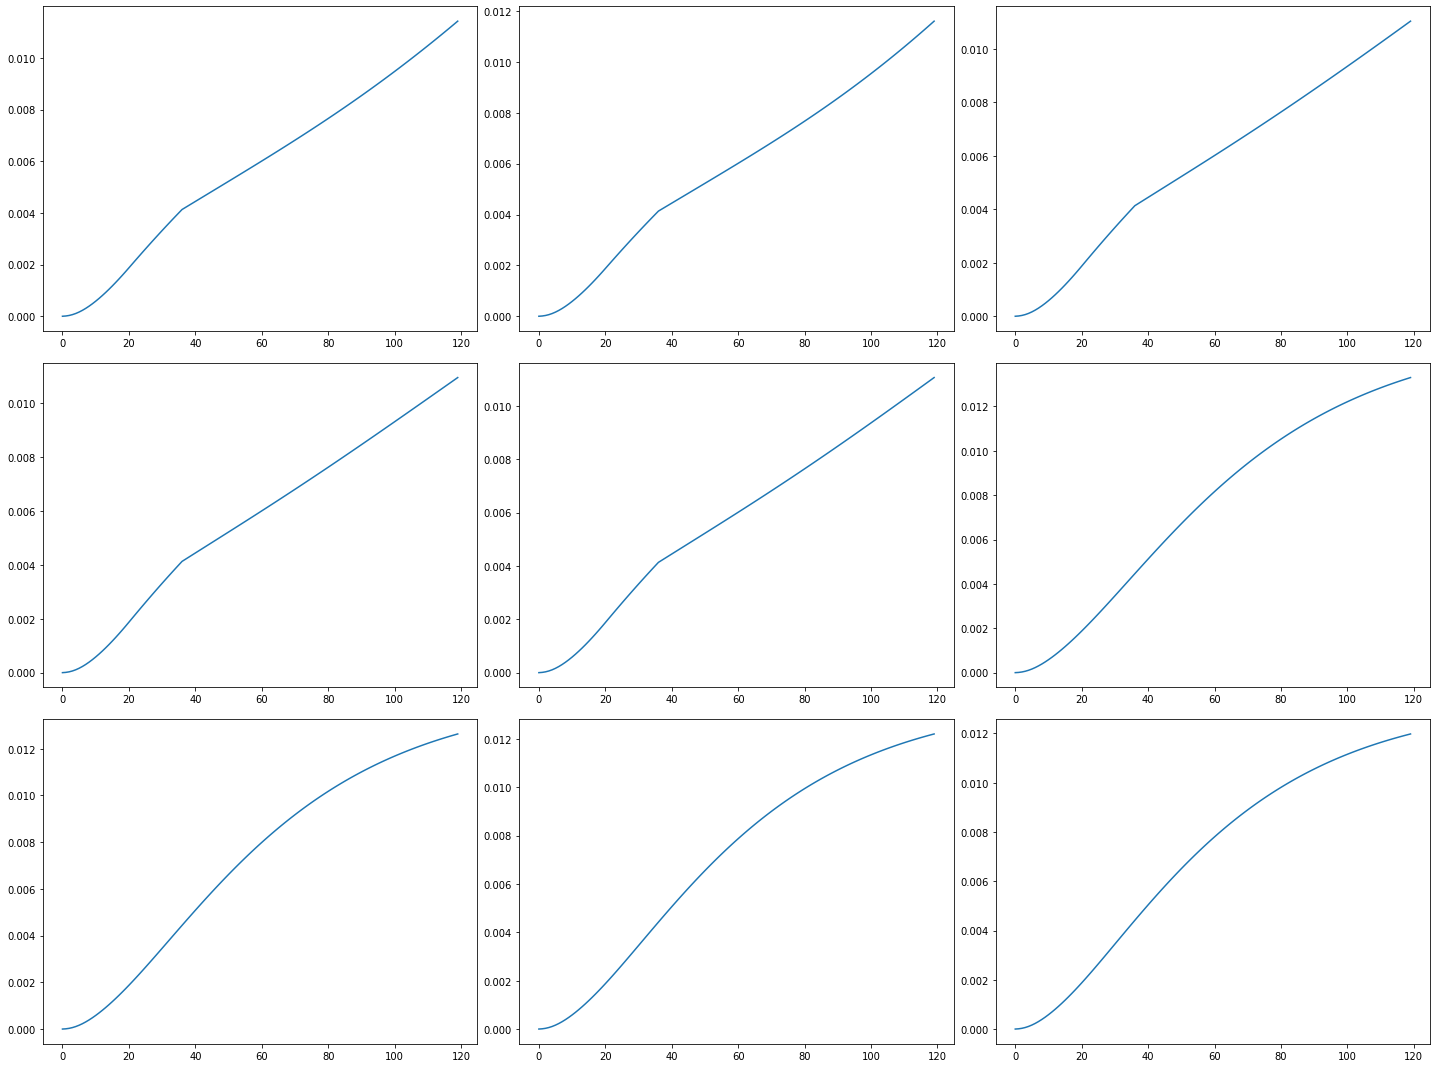

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(20,15))
# fig.suptitle('Series')
fig.tight_layout()
for i in range(3):
    for j in range(3):
        axs[i, j].plot(rawTimeseries[i*3+j])
plt.show()

### Show the result of noramlized vs non-normalized

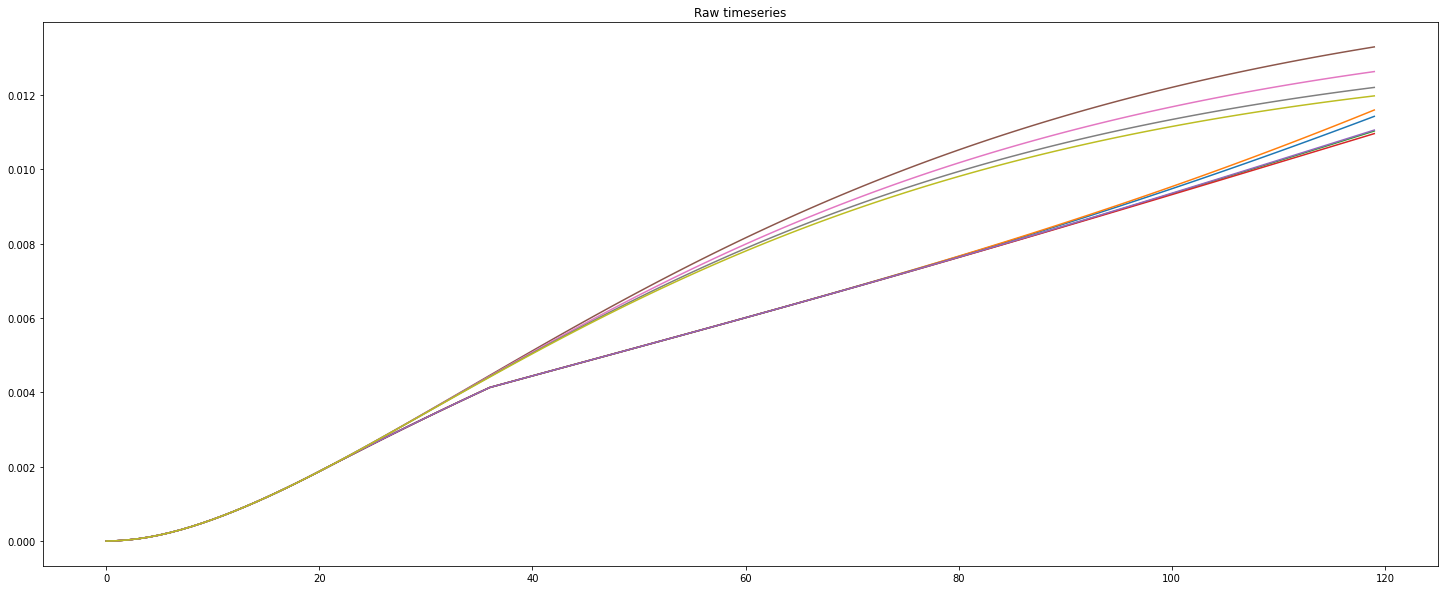

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(25,10))

# Raw timeseries
for i in range(len(rawTimeseries)):
    axs.plot(rawTimeseries[i])
axs.title.set_text("Raw timeseries")

### Using self-organizin maps (SoM) to cluster time series
https://en.wikipedia.org/wiki/Self-organizing_map

In [31]:
### Calculate for noramlized timeseries
# som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(rawTimeseries))))

# som = MiniSom(som_x, som_y, len(rawTimeseries[0]), sigma=0.3, learning_rate = 0.1)
# som.random_weights_init(rawTimeseries)
# som.train(rawTimeseries, 500)


def train_and_fit_som(data):
    som_x = som_y = 2 # Just playing around
    som = MiniSom(som_x, som_y, len(data[0]), sigma=0.3, learning_rate = 0.1)
    som.random_weights_init(data)
    som.train(data, 800)
    return som

In [65]:
som_raw = train_and_fit_som(rawTimeseries)
map_raw = som_raw.win_map(rawTimeseries)

print("=== Raw ===")
for c in map_raw.keys():
    print(f"Cluster {c} - {len(map_raw[c])}")     

=== Raw ===
Cluster (0, 0) - 5
Cluster (0, 1) - 2
Cluster (1, 1) - 1
Cluster (1, 0) - 1


In [70]:
def plot_win_map(cluster, m1):
    fig, axs = plt.subplots(1, 1, figsize=(25, 10))
    if cluster in m1.keys():
         title = f"{len(m1[cluster])} time series"
         axs.title.set_text(title)
         for series in m1[cluster]:
                axs.plot(series, c="#336699", alpha=0.5)

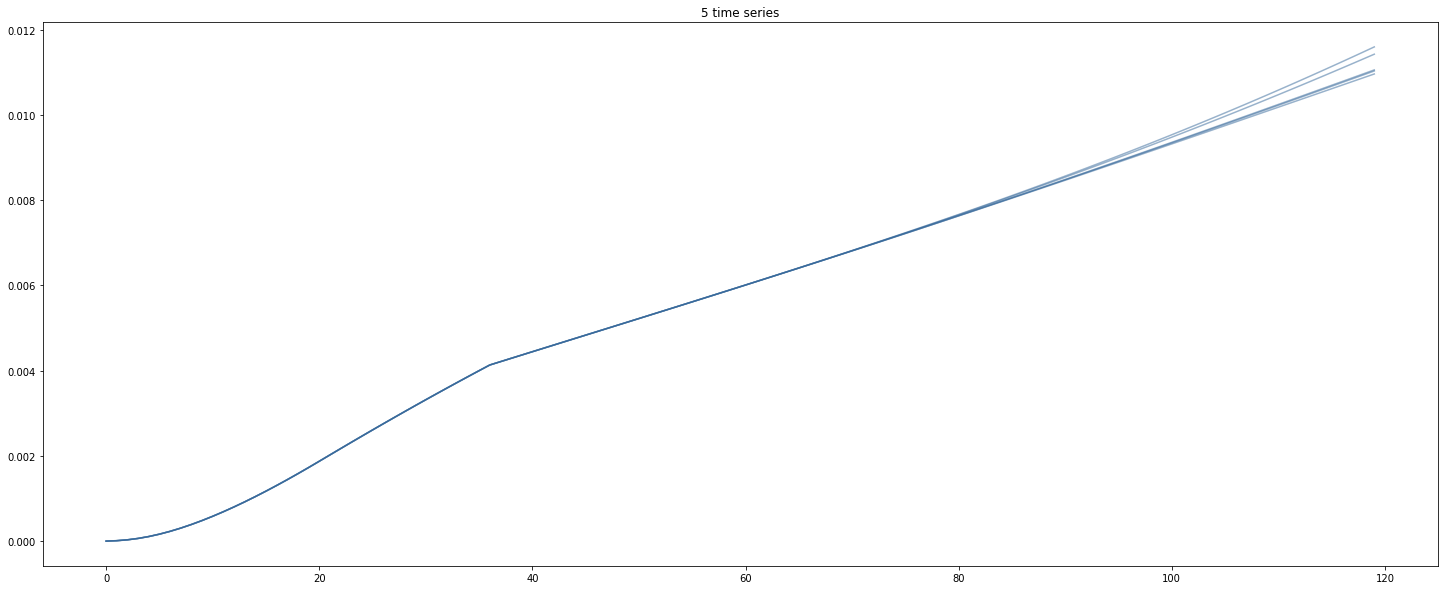

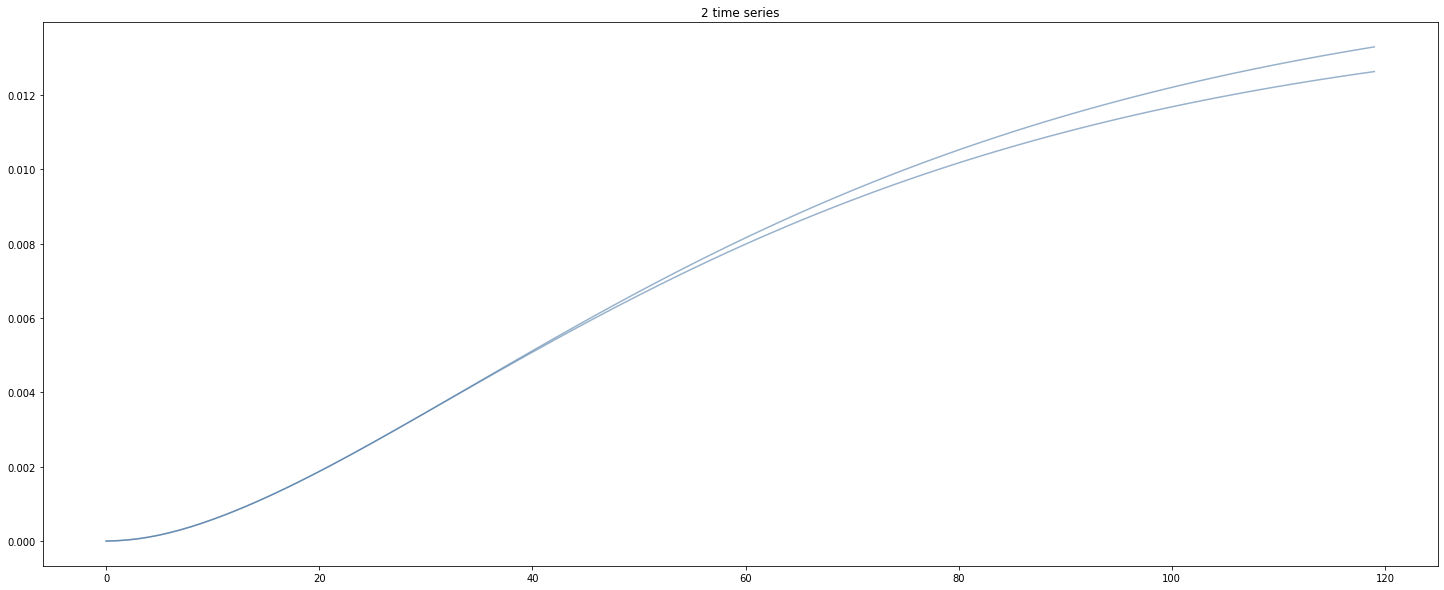

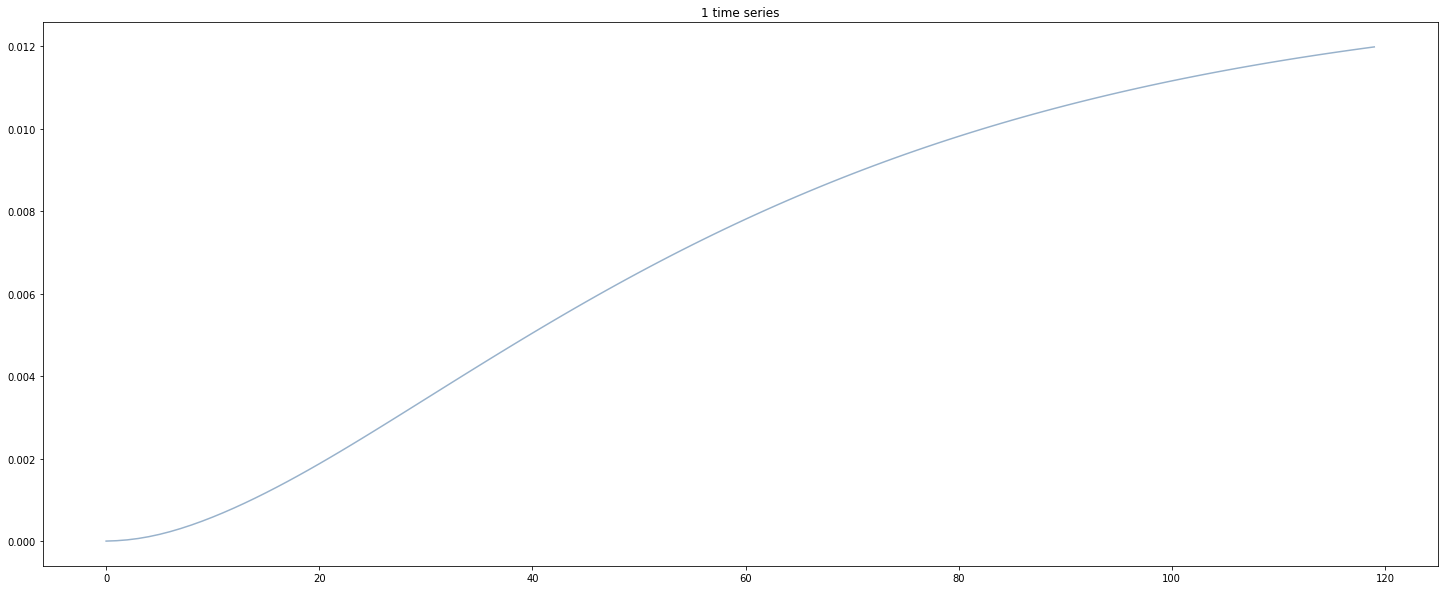

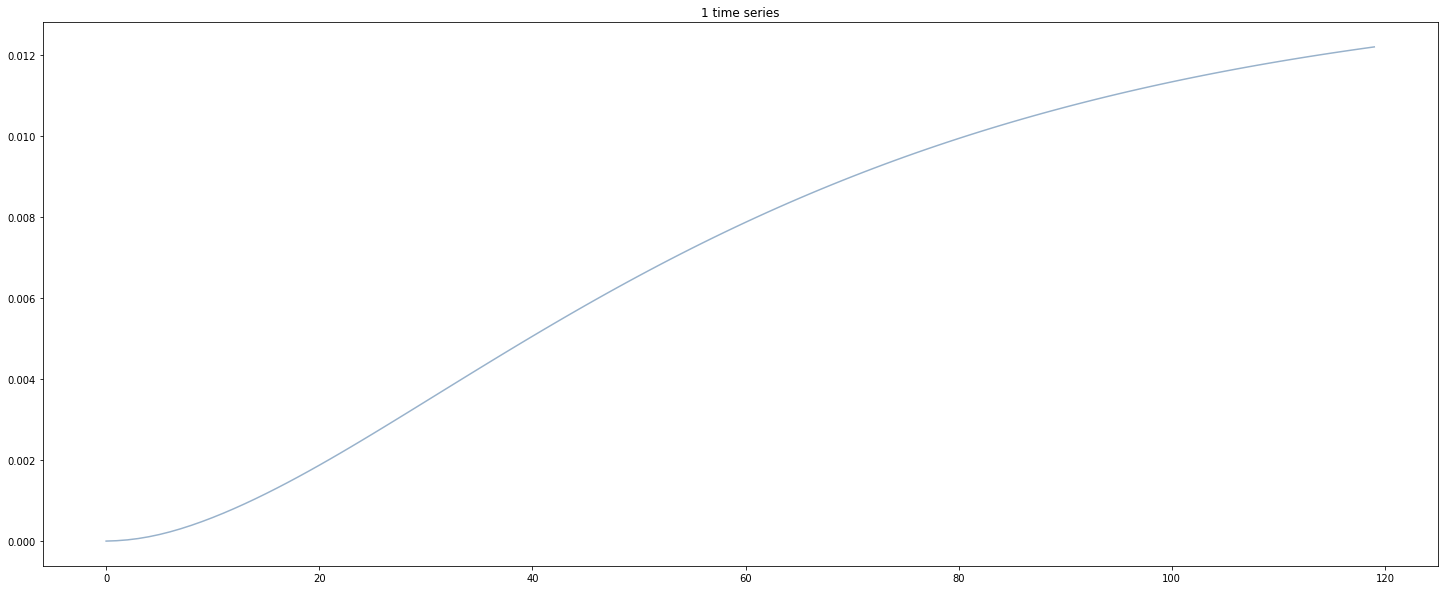

In [71]:
for x in range(2):
    for y in range(2):
        cluster = (x, y)
        plot_win_map(cluster, map_raw)

### K-Means clustering

In [62]:
# km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km = TimeSeriesKMeans(n_clusters=3)

In [63]:
labels = km.fit_predict(rawTimeseries)
labels

array([0, 0, 0, 0, 0, 1, 1, 2, 2])

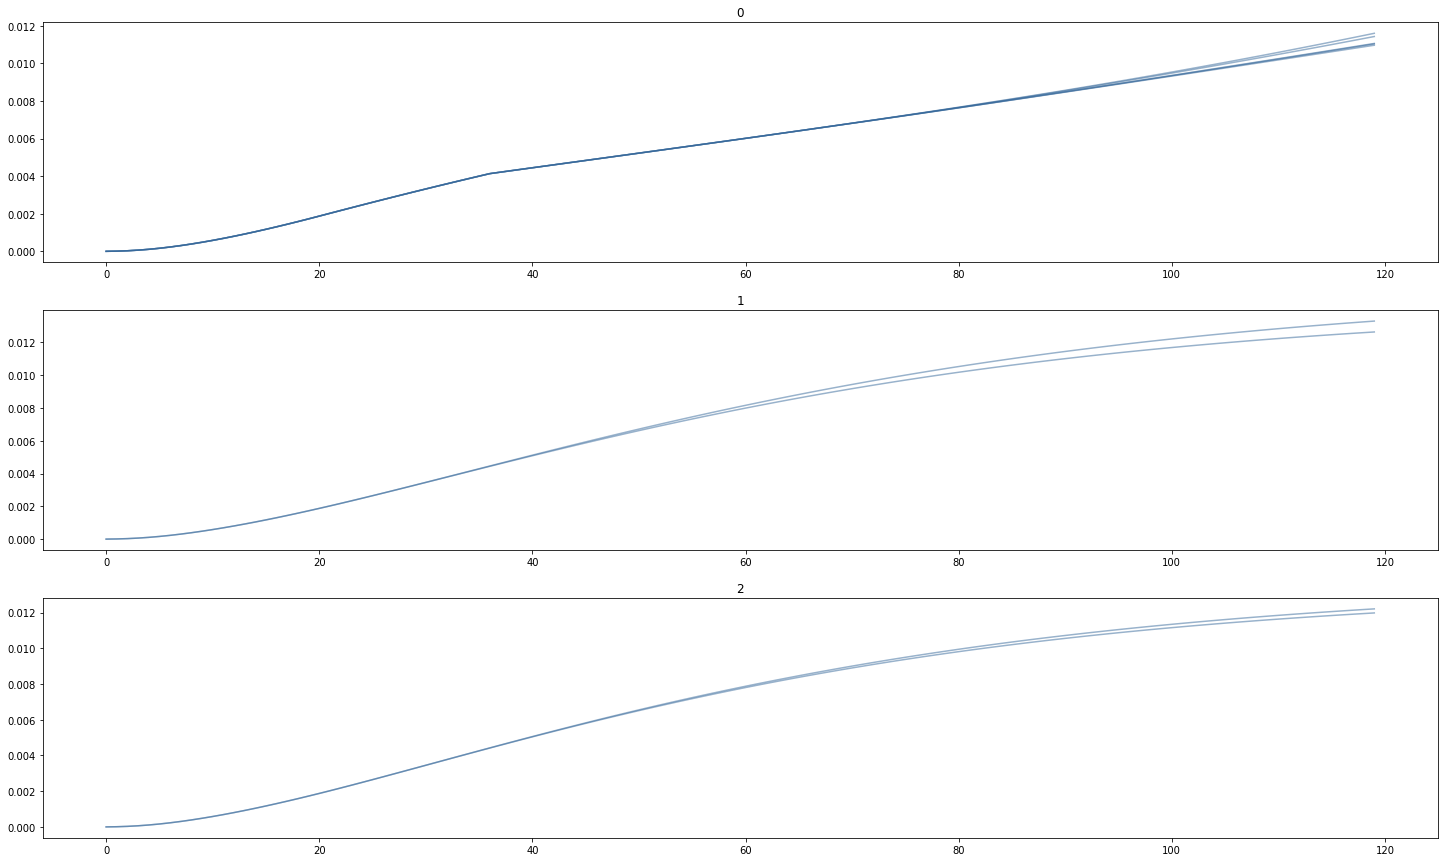

In [67]:
unique_labels = list(set(list(labels)))
fig, axs = plt.subplots(len(unique_labels), 1, figsize=(25, 15))

for i in range(len(labels)):
    cluster = labels[i]
    axs[cluster].title.set_text(cluster)
    axs[cluster].plot(rawTimeseries[i], c="#336699", alpha=0.5)

In [ ]:
list